In [64]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
from sklearn.manifold import MDS

In [65]:
# Definition of paths
data_dir = os.path.join(os.getcwd(), '../Dataset')

raw_data_dir = os.path.join(data_dir, 'raw')
ids_mapping = os.path.join(raw_data_dir, 'IDS_mapping.csv')
diabetes_data = os.path.join(raw_data_dir, 'diabetic_data.csv')

mapping_data_dir = os.path.join(data_dir, 'Mapping')
os.makedirs(mapping_data_dir, exist_ok=True)

preprocessed_out_dir = os.path.join(data_dir, 'Preprocessed')
os.makedirs(preprocessed_out_dir, exist_ok=True)

admission_type_mapping_data = os.path.join(mapping_data_dir, 'admission_type_mapping.csv')
discharge_disposition_data = os.path.join(mapping_data_dir, 'discharge_disposition_mapping.csv')
admission_source_mapping_data = os.path.join(mapping_data_dir, 'admission_source_mapping.csv')

preprocessed_saved_filepath = os.path.join(preprocessed_out_dir, 'preprocessed.pkl')

In [66]:
df = pd.read_pickle(preprocessed_saved_filepath)

In [67]:
print(df.shape)
print()
df.info()

(69987, 44)

<class 'pandas.core.frame.DataFrame'>
Index: 69987 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              69987 non-null  int64   
 1   patient_nbr               69987 non-null  int64   
 2   race                      69987 non-null  category
 3   gender                    69987 non-null  object  
 4   age                       69987 non-null  object  
 5   admission_type_id         69987 non-null  category
 6   discharge_disposition_id  69987 non-null  category
 7   admission_source_id       69987 non-null  category
 8   time_in_hospital          69987 non-null  int64   
 9   medical_specialty         69987 non-null  category
 10  num_lab_procedures        69987 non-null  int64   
 11  num_procedures            69987 non-null  int64   
 12  num_medications           69987 non-null  int64   
 13  number_outpatient         69987 non-n

### Numerical Column Analysis ###

In [68]:
numerical_cols = [
  'num_lab_procedures', 'num_medications', 'num_procedures', 'number_diagnoses', 'number_inpatient', 'number_outpatient', 'time_in_hospital'
]

In [69]:
df[numerical_cols].describe().T

count       mean        std  min   25%   50%   75%  \
num_lab_procedures  69987.0  42.875863  19.894291  1.0  31.0  44.0  57.0   
num_medications     69987.0  15.665281   8.287321  1.0  10.0  14.0  20.0   
num_procedures      69987.0   1.425379   1.757003  0.0   0.0   1.0   2.0   
number_diagnoses    69987.0   7.224170   2.001257  1.0   6.0   8.0   9.0   
number_inpatient    69987.0   0.176276   0.601633  0.0   0.0   0.0   0.0   
number_outpatient   69987.0   0.279595   1.064108  0.0   0.0   0.0   0.0   
time_in_hospital    69987.0   4.273336   2.933987  1.0   2.0   3.0   6.0   

                      max  
num_lab_procedures  132.0  
num_medications      81.0  
num_procedures        6.0  
number_diagnoses     16.0  
number_inpatient     12.0  
number_outpatient    42.0  
time_in_hospital     14.0

In [70]:
# Filter numerical columns to only include columns with numeric data types
#numerical_cols = df.select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101754     443842016    183087545        Caucasian  Female  [70-80)   
101755     443842022    188574944            Other  Female  [40-50)   
101756     443842070    140199494            Other  Female  [60-70)   
101758     443842340    120975314        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

       admission_type_id discharge_disposition_id admission_source_id  \
0                      6                       25                   1   
1                      1                        1                   7   
2                      1                        1                   7   
3                      1                        1                   7   
4                      1                        1                   7   
...                  ...                      ...                 ...   
101754                 1                        1                   7   
101755                 1                        1                   7   
101756                 1                        1                   7   
101758                 1                        1                   7   
101765                 1                        1                   7   

        time_in_hospital         medical_specialty  ...  \
0               0.000000  Pediatrics-Endocrinology  ...   
1               0.153846                   Unknown  ...   
2               0.076923                   Unknown  ...   
3               0.076923                   Unknown  ...   
4               0.000000                   Unknown  ...   
...                  ...                       ...  ...   
101754          0.615385                   Unknown  ...   
101755          1.000000                   Unknown  ...   
101756          0.076923                   Unknown  ...   
101758          0.307692                   Unknown  ...   
101765          0.384615                   Unknown  ...   

        max_glu_serum_measured  A1Cresult_measured  repaglinide_measured  \
0                           No                  No                    No   
1                           No                  No                    No   
2                           No                  No                    No   
3                           No                  No                    No   
4                           No                  No                    No   
...                        ...                 ...                   ...   
101754                      No                 Yes                    No   
101755                      No                 Yes                    No   
101756                      No                  No                    No   
101758                      No                  No                    No   
101765                      No                  No                    No   

        glimepiride_measured  rosiglitazone_measured  pioglitazone_measured  \
0                         No                      No                     No   
1                         No                      No                     No   
2                         No                      No                     No   
3                         No                      No                     No   
4                         No                      No                     No   
...                      ...                     ...                    ...   
101754                    No                      No                     No   
101755                  

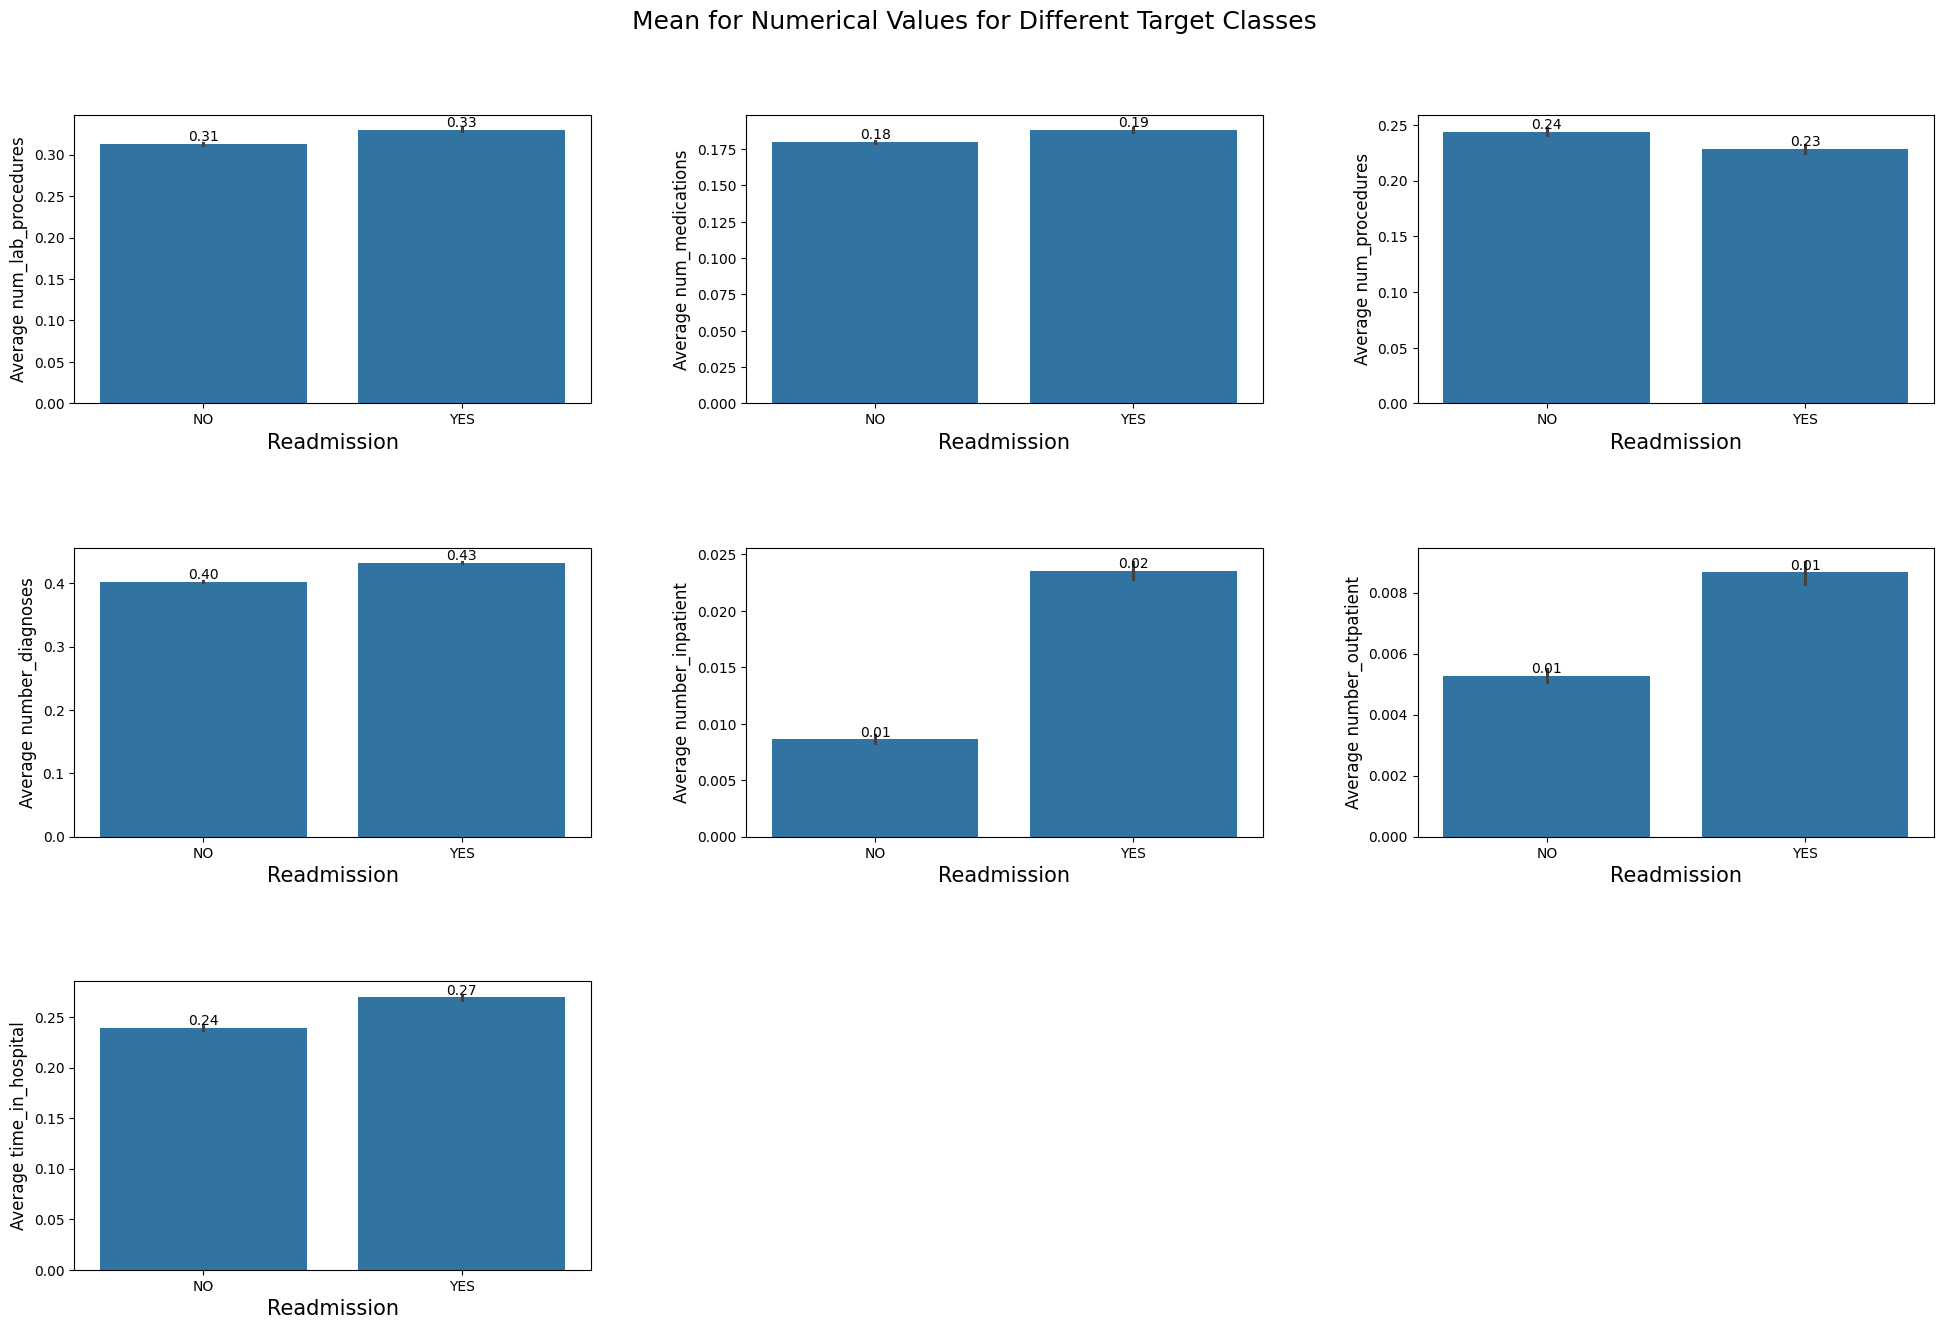

In [71]:
# Adjust to 3 columns and enough rows to fit all numerical columns
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(24, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust space between plots
fig.suptitle("Mean for Numerical Values for Different Target Classes",
             fontsize=18,
             y=0.95)

# Plot each numerical column as a bar plot
for column, ax in zip(numerical_cols, axs.ravel()):
    sns.barplot(x=df['readmitted'], y=df[column], ax=ax)
    ax.set_xlabel("Readmission", fontsize=15)
    ax.set_ylabel(f"Average {column}", fontsize=12)
    for container in ax.containers:
        ax.bar_label(container, fontsize=10, fmt='%.2f')

# Hide any unused subplots if the grid has extra slots
for i in range(len(numerical_cols), len(axs.ravel())):
    axs.ravel()[i].axis('off')

plt.show()

<div style="color: blue; font-size: 12px;">
    <ul>
        <li><b>Number of Lab Procedures:</b> Readmitted patients have a slightly higher average number of lab procedures (0.33) compared to non-readmitted patients (0.31). This suggests that patients who undergo more lab procedures may have more complex health needs, potentially increasing their readmission risk.</li>
        <li><b>Number of Medications:</b> Readmitted patients have a slightly higher average number of medications (0.19) than non-readmitted patients (0.18). This indicates that patients with a higher medication burden may be at a greater risk of readmission, possibly due to the challenges of managing complex medication regimens.</li>
        <li><b>Number of Procedures:</b> The average number of procedures is slightly lower for readmitted patients (0.23) than non-readmitted ones (0.24). This small difference suggests that the number of procedures alone may not be a significant predictor of readmission.</li>
        <li><b>Number of Diagnoses:</b> Readmitted patients have a higher average number of diagnoses (0.43) compared to non-readmitted patients (0.40). This points to patients with multiple diagnoses being at a higher risk of readmission, likely due to the complexity of managing multiple health conditions.</li>
        <li><b>Number of Inpatient Visits:</b> The mean number of previous inpatient visits is notably higher for readmitted patients (0.02) than for non-readmitted ones (0.01). A history of prior hospitalizations may indicate unresolved or chronic health issues, making readmission more likely.</li>
        <li><b>Number of Outpatient Visits:</b> Readmitted patients have a slightly higher mean number of outpatient visits (0.01) compared to non-readmitted patients. This difference suggests that more outpatient visits could reflect more active health monitoring, which might relate to higher readmission rates due to ongoing issues.</li>
        <li><b>Time in Hospital:</b> Readmitted patients tend to have a longer average hospital stay (0.27) than non-readmitted patients (0.24). This could indicate that patients with longer hospital stays, possibly due to more severe or complex conditions, have a greater likelihood of readmission.</li>
    </ul>
    <!-- Separator -->
    <hr style="border: 1px solid blue;">
    <p><b>Summary:</b> The plot highlights that factors such as the number of lab procedures, medications, diagnoses, inpatient visits, and time spent in the hospital have slightly higher averages for readmitted patients. These features may play a role in predicting readmission risk, with patients who have complex treatment needs, multiple diagnoses, and previous inpatient care being at greater risk of returning to the hospital. These insights support focusing on these features in further predictive analytics for readmission.</p>
</div>

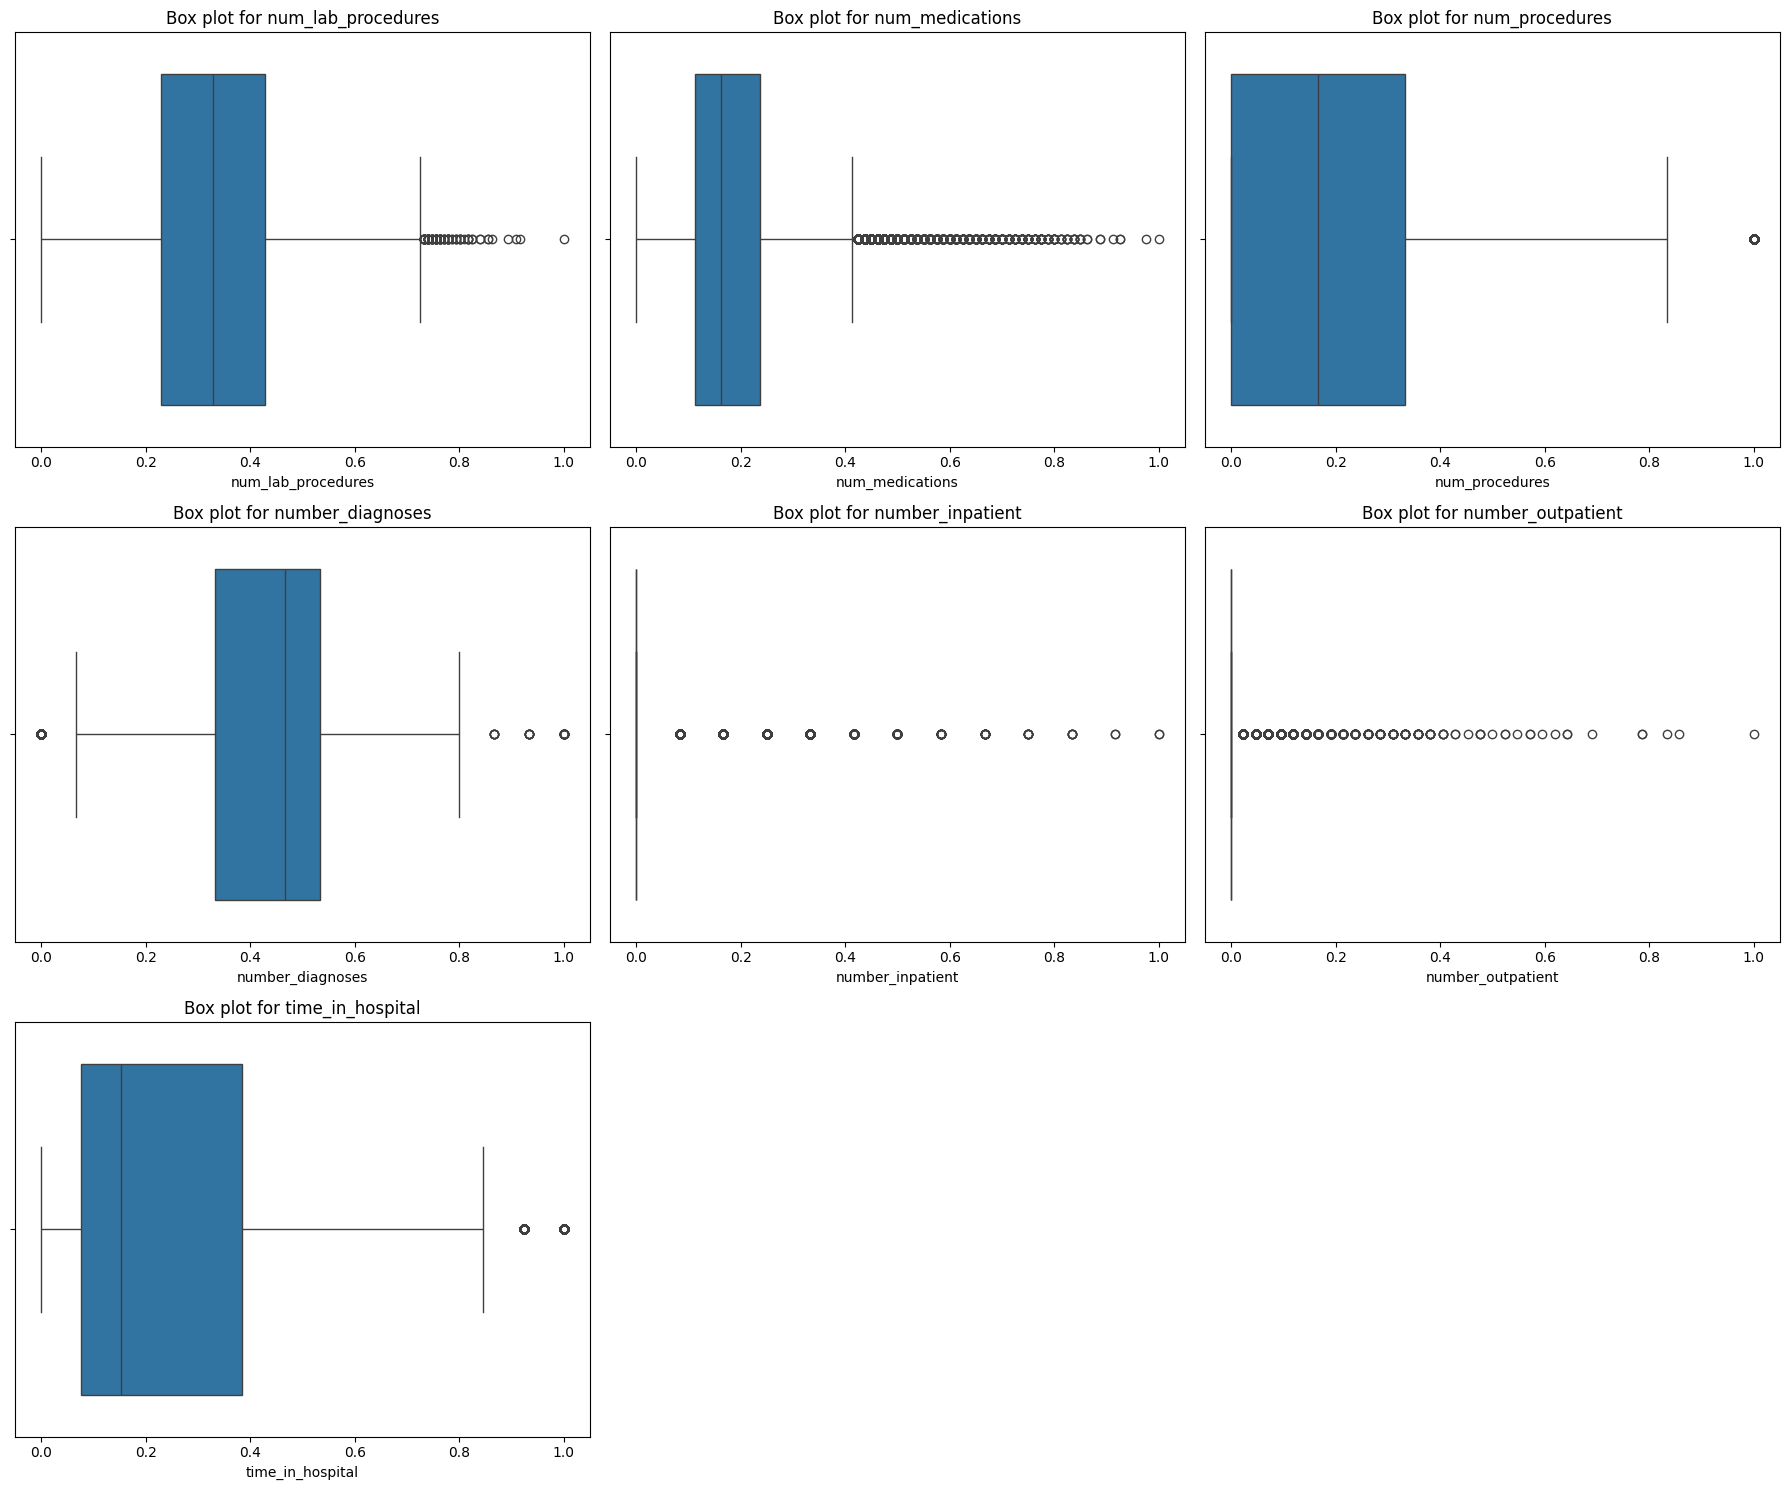

In [72]:
# Set grid dimensions
num_cols = 3  # Number of columns in the grid
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(18, num_rows * 5))

# Create a grid of box plots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot for {col}')

plt.tight_layout()
plt.show()

<div style="color: blue; font-size: 12px;">
    <ul>
        <li><b>Number of Lab Procedures:</b> The distribution for the number of lab procedures shows some high-value outliers. This suggests that while most patients have a relatively consistent number of lab procedures, a few patients require significantly more. These outliers could represent more complex cases that may be at higher risk of readmission.</li>
        <li><b>Number of Medications:</b> There are numerous high-value outliers in the number of medications. Patients with many medications likely have complex medical regimens, which could contribute to their readmission risk. These outliers may indicate patients with multiple comorbidities or severe conditions.</li>
        <li><b>Number of Procedures:</b> The distribution of the number of procedures is fairly compact, with minimal outliers. This suggests that most patients undergo a similar number of procedures, and there are few extreme cases in this category.</li>
        <li><b>Number of Diagnoses:</b> There are some high-value outliers in the number of diagnoses. Patients with more diagnoses might have complex health profiles, making them more susceptible to complications and thus at higher risk for readmission.</li>
        <li><b>Number of Inpatient Visits:</b> The box plot shows outliers with higher numbers of inpatient visits. Patients with frequent prior inpatient visits may have chronic or severe health issues, which could increase their likelihood of readmission.</li>
        <li><b>Number of Outpatient Visits:</b> Similar to inpatient visits, there are several high-value outliers for outpatient visits. Patients with frequent outpatient visits might be under closer monitoring or have ongoing health issues that require frequent check-ups, which might be associated with readmission risk.</li>
        <li><b>Time in Hospital:</b> There are a few high-value outliers for time spent in the hospital, indicating that while most patients have shorter stays, some require significantly longer hospitalizations. Longer hospital stays may reflect more serious conditions or complications, which could correlate with a higher likelihood of readmission.</li>
    </ul>
    <!-- Separator -->
    <hr style="border: 1px solid blue;">
    <p><b>Summary:</b> The presence of outliers in features such as the number of lab procedures, medications, diagnoses, and both inpatient and outpatient visits suggests that patients with extreme values in these categories may have more complex health conditions. These patients are likely at a higher risk of readmission. Managing these outliers is essential in predictive modeling, as they could represent high-risk patient groups that require targeted interventions to reduce readmission rates. The analysis emphasizes that patients with complex treatment requirements, frequent hospital visits, and longer stays are critical for readmission prediction.</p>
</div>

In [73]:
# Identify outliers using IQR and calculate the percentage of outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percentage_outliers = (len(outliers) / len(df)) * 100
    
    print(f'Percentage of outliers in {col}: {percentage_outliers:.2f}%')

Percentage of outliers in num_lab_procedures: 0.14%
Percentage of outliers in num_medications: 3.03%
Percentage of outliers in num_procedures: 5.49%
Percentage of outliers in number_diagnoses: 0.34%
Percentage of outliers in number_inpatient: 11.71%
Percentage of outliers in number_outpatient: 13.03%
Percentage of outliers in time_in_hospital: 2.00%


<div style="color: blue; font-size: 12px;">
    <p>The output you received shows the percentage of outliers for each numerical column based on the Interquartile Range (IQR) method, where outliers are defined as data points below the lower bound (<i>Q1 - 1.5 &times; IQR</i>) or above the upper bound (<i>Q3 + 1.5 &times; IQR</i>).</p>
    <p><b>Here’s a summary of the results:</b></p>
    <ul>
        <li><b><code>num_lab_procedures</code></b>: 0.14% outliers – minimal outliers</li>
        <li><b><code>num_medications</code></b>: 3.03% outliers – some outliers</li>
        <li><b><code>num_procedures</code></b>: 5.49% outliers – moderate outliers</li>
        <li><b><code>number_diagnoses</code></b>: 0.34% outliers – very few outliers</li>
        <li><b><code>number_inpatient</code></b>: 11.71% outliers – significant outliers</li>
        <li><b><code>number_outpatient</code></b>: 13.03% outliers – significant outliers</li>
        <li><b><code>time_in_hospital</code></b>: 3.31% outliers – some outliers</li>
    </ul>
    <hr style="border: 1px solid blue;">
    <p><b>Insights:</b></p>
    <ul>
        <li><b>Significant Outliers</b>: <code>number_inpatient</code> and <code>number_outpatient</code> have a notable percentage of outliers, suggesting that certain patients had an unusually high number of inpatient or outpatient visits compared to the general distribution.</li>
        <li><b>Minimal Outliers</b>: Columns like <code>num_lab_procedures</code> and <code>number_diagnoses</code> show very few outliers, meaning the data is relatively consistent within the IQR range for these features.</li>
        <li><b>Moderate Outliers</b>: <code>num_medications</code>, <code>num_procedures</code>, and <code>time_in_hospital</code> have moderate outliers, which could indicate variability in medication usage, procedures, and hospital stays.</li>
    </ul>
    <hr style="border: 1px solid blue;">
    <p><b>Next Steps:</b></p>
    <ul>
        <li><b>Handle Outliers</b>: You may choose to cap, remove, or transform these outliers based on your analysis goals.</li>
        <li><b>Further Analysis</b>: For features with significant outliers, further investigation could reveal insights into different patient groups or rare cases.</li>
    </ul>
    <p><i>Would you like to explore any specific approach to handling these outliers?</i></p>
</div>

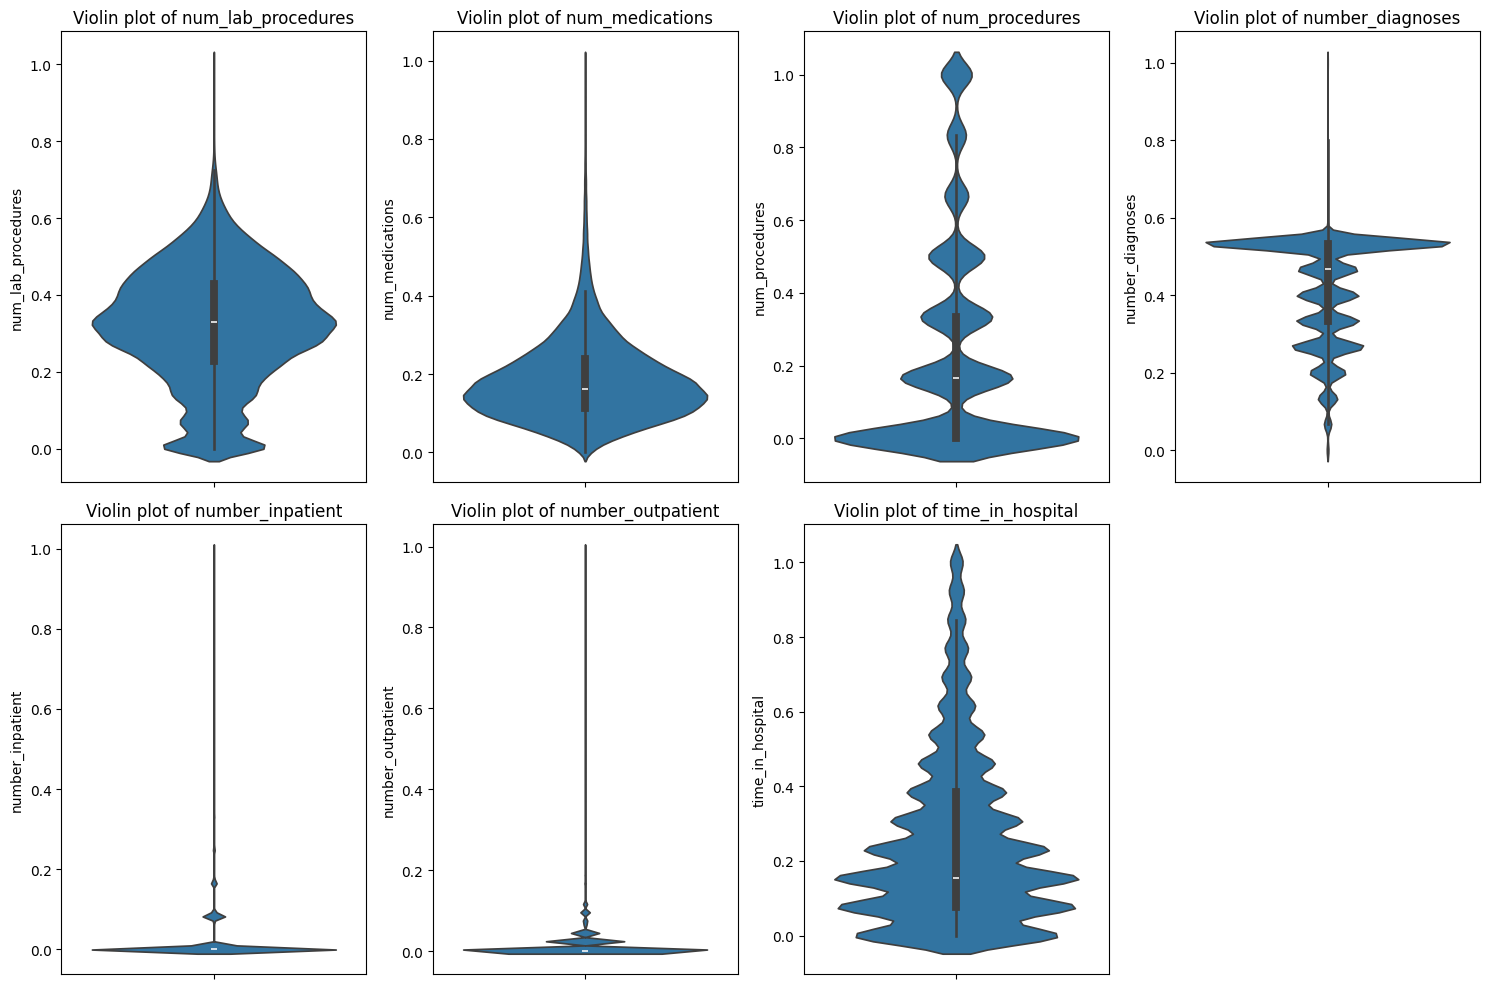

In [74]:
# Violin Plots: Add a layer of information by showing the data’s density (shape) along with the box plot, helping to visualize the distribution more effectively.
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.violinplot(data=df, y=col)
    plt.title(f'Violin plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

<div style="color: blue; font-size: 12px;">
    <p>These visualizations will help you see where outliers exist and how the data is distributed for each column, providing better insight into potential issues or unique data patterns. Based on the violin plots for various numerical features, here are the insights:</p>
    <ul>
        <li><b>Number of Lab Procedures:</b> The distribution is somewhat bimodal, with peaks at lower values, indicating that most patients have a moderate number of lab procedures. There are fewer patients at the extremes (low and high), suggesting that patients with an unusual number of lab procedures are less common. The wider spread at the top indicates variability in higher lab procedure counts, possibly representing patients with more complex cases.</li>
        <li><b>Number of Medications:</b> This distribution has a wider spread, with more patients concentrated at lower medication counts. However, the extended tails suggest that some patients are on significantly more medications, which could indicate a more severe health condition or complex treatment regimen.</li>
        <li><b>Number of Procedures:</b> This feature has a multimodal distribution, with most patients undergoing a small number of procedures. The distinct "steps" in the distribution may indicate different categories of procedures, with a few patients having high procedure counts, possibly indicating more intensive medical care.</li>
        <li><b>Number of Diagnoses:</b> The distribution of diagnoses is mostly centered around a few diagnoses, but there are patients with a higher number of diagnoses, which might indicate a more complicated health profile and potentially higher readmission risk.</li>
        <li><b>Number of Inpatient Visits:</b> This feature has a highly skewed distribution with a majority of patients having minimal inpatient visits, while a few patients have a history of multiple inpatient visits. Patients with frequent inpatient visits might represent high-risk cases with chronic conditions.</li>
        <li><b>Number of Outpatient Visits:</b> Similar to inpatient visits, the distribution is heavily skewed with a high concentration of patients with few outpatient visits. However, there are outliers with frequent outpatient visits, indicating patients under continuous medical supervision or treatment.</li>
        <li><b>Time in Hospital:</b> The distribution of hospital stay durations is multimodal, with peaks at shorter stays, suggesting most patients are hospitalized for shorter periods. The presence of longer stays among some patients might correlate with the severity of health conditions and a higher likelihood of readmission.</li>
    </ul>
    <hr style="border: 1px solid blue;">
    <p><b>Summary:</b> The violin plots indicate that features such as the <b>number of lab procedures, medications, inpatient and outpatient visits, and time in hospital</b> have skewed distributions with some outliers. These features likely capture important information about patients with complex medical needs. In particular, patients who have high counts in these areas might be at a higher risk of readmission. The insights suggest that understanding these distributions and handling outliers appropriately could be valuable for a readmission prediction model, as patients with extreme values in these features might require closer medical attention and monitoring.</p>
</div>

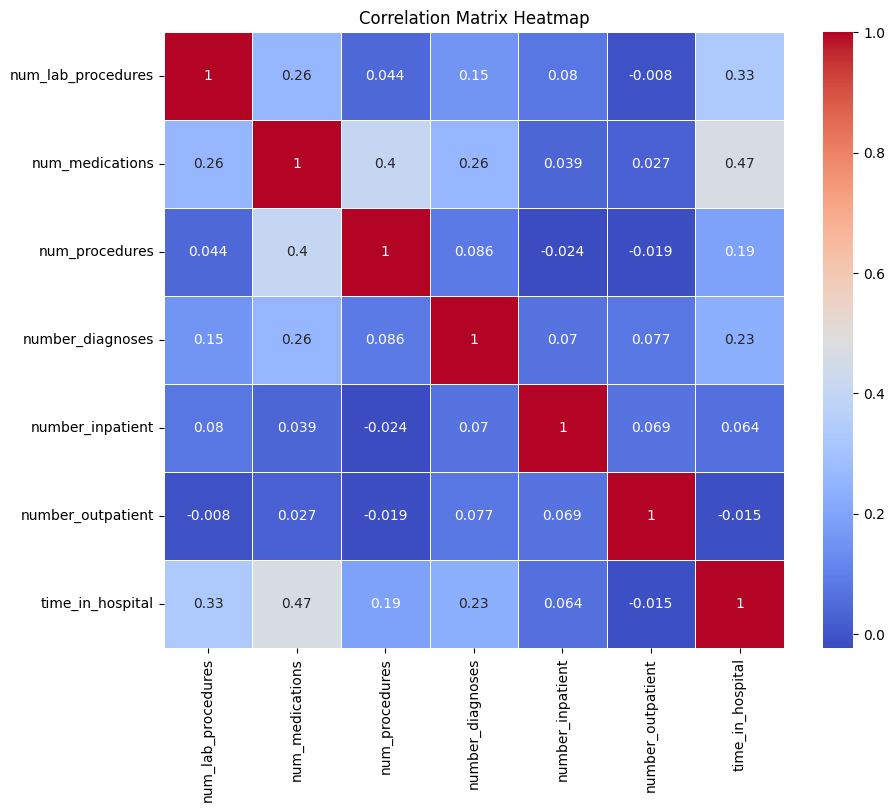

In [75]:
# Filter selected_columns to include only numeric columns
selected_columns = [col for col in selected_columns if pd.api.types.is_numeric_dtype(df[col])]

# Calculate the correlation matrix with numeric columns only
correlation_matrix = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<div style="color: blue; font-size: 12px;">
    <p><b>The correlation heatmap reveals the following insights among the numerical features related to hospitalizations and patient visits:</b></p>
    <ul>
        <li><b>High Correlation Pairs:</b>
            <ul>
                <li><b>Number of Medications and Time in Hospital:</b> There is a moderately high correlation (<code>0.47</code>), suggesting that patients who are hospitalized longer tend to be on more medications. This is logical, as extended stays often require additional treatments and prescriptions.</li>
                <li><b>Number of Medications and Number of Procedures:</b> A significant correlation (<code>0.4</code>) exists between these two features, indicating that patients undergoing more procedures often have a higher count of medications, possibly due to the need for pre- or post-procedural medications.</li>
            </ul>
        </li>
        <li><b>Moderate Correlations:</b>
            <ul>
                <li><b>Time in Hospital and Number of Lab Procedures:</b> A moderate positive correlation (<code>0.33</code>) is observed between these features, suggesting that patients with longer hospital stays tend to have more lab procedures conducted, reflecting a higher level of medical investigation and monitoring.</li>
                <li><b>Number of Diagnoses and Time in Hospital:</b> This moderate correlation (<code>0.23</code>) implies that patients with multiple diagnoses may require longer hospital stays, as complex conditions often need extended care.</li>
                <li><b>Number of Diagnoses and Number of Medications:</b> The correlation (<code>0.26</code>) between these features suggests that patients with more diagnoses typically need more medications, as they are likely managing multiple health conditions.</li>
            </ul>
        </li>
        <li><b>Low or Negligible Correlations:</b>
            <ul>
                <li><b>Number of Outpatient Visits:</b> This feature shows very low correlation with most other variables, indicating that outpatient visit frequency may be less associated with the intensity of hospital treatments or medications.</li>
                <li><b>Number of Inpatient Visits and Other Variables:</b> The correlation values involving inpatient visits are relatively low, suggesting that past inpatient visit history might not directly correlate with current hospitalization parameters like lab procedures or medications.</li>
            </ul>
        </li>
    </ul>
    <hr style="border: 1px solid blue;">
    <p><b>Key Takeaways:</b> The heatmap underscores that <b>time in hospital</b>, <b>number of medications</b>, <b>number of diagnoses</b>, and <b>number of procedures</b> are interrelated, and these features may collectively indicate the complexity and severity of a patient's condition. Patients with extended hospital stays, multiple diagnoses, and a higher medication burden likely require more intensive care, which could be a predictor for readmission risk. This insight suggests that these features are crucial for further analysis and modeling for predicting readmission. Additionally, outpatient and inpatient visit counts show limited correlation with other factors, indicating they may provide unique, less interdependent insights into patient readmission risk.</p>
</div>

### Categorical Column Analysis ###

In [76]:
# Get list of all columns in df
all_columns = df.columns.tolist()

# Get list of columns that are not in numerical_cols
categorical_cols = [col for col in all_columns if col not in numerical_cols]

print(categorical_cols)

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 'number_emergency', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted', 'age-binned', 'max_glu_serum_measured', 'A1Cresult_measured', 'repaglinide_measured', 'glimepiride_measured', 'rosiglitazone_measured', 'pioglitazone_measured', 'glyburide_measured', 'glipizide_measured', 'metformin_measured', 'insulin_measured']


<div style="color: blue; font-size: 12px;">
    <p>The output provides a list of columns in <code>df</code> that are not part of the <code>numerical_cols</code> list. This list, <code>categorical_cols</code>, likely contains categorical, identifier, or text-based columns that may need separate handling for data processing and analysis.</p>
    <p><b>Explanation of Key Columns:</b></p>
    <ul>
        <li><b>Identifiers:</b> Columns like <code>encounter_id</code> and <code>patient_nbr</code> are likely unique identifiers for records or patients.</li>
        <li><b>Categorical Data:</b> Columns such as <code>race</code>, <code>gender</code>, <code>admission_type_id</code>, and <code>discharge_disposition_id</code> contain categorical information that may need encoding for use in models.</li>
        <li><b>Diagnoses and Measurements:</b> Columns like <code>diag_1</code>, <code>diag_2</code>, and <code>diag_3</code> contain diagnostic information, while columns like <code>max_glu_serum</code> and <code>A1Cresult</code> are lab test measurements.</li>
        <li><b>Medication Columns:</b> Columns like <code>metformin</code>, <code>repaglinide</code>, <code>glimepiride</code>, and their respective <code>_measured</code> versions indicate medication use and possibly whether the medication measurement was recorded.</li>
    </ul>
    <hr style="border: 1px solid blue;">
    <p><b>Next Steps:</b></p>
    <ul>
        <li><b>Encoding Categorical Variables:</b> If needed for modeling, you can one-hot encode or label-encode columns in <code>categorical_cols</code>.</li>
        <li><b>Data Cleaning:</b> Columns related to medical records (e.g., <code>diag_1</code>, <code>diag_2</code>) and identifiers (e.g., <code>encounter_id</code>, <code>patient_nbr</code>) might need special handling based on your analysis goals.</li>
        <li><b>Feature Engineering:</b> The medication columns and measured values can be transformed into useful features, depending on the objective of the analysis.</li>
    </ul>
    <p><i>Let me know if you would like to perform any specific operations on these columns.</i></p>
</div>

In [77]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a ColumnTransformer with OneHotEncoder for categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Apply the transformer to the DataFrame and ensure dense output
df_transformed = column_transformer.fit_transform(df)

# Get the new column names after one-hot encoding
new_columns = column_transformer.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = list(new_columns) + [col for col in df.columns if col not in categorical_cols]

# Convert the result back to a DataFrame with proper column names
df_transformed = pd.DataFrame(df_transformed, columns=all_columns)
df_transformed

race_Asian  race_Caucasian  race_Hispanic  race_Other  race_Unknown  \
0             0.0             1.0            0.0         0.0           0.0   
1             0.0             1.0            0.0         0.0           0.0   
2             0.0             0.0            0.0         0.0           0.0   
3             0.0             1.0            0.0         0.0           0.0   
4             0.0             1.0            0.0         0.0           0.0   
...           ...             ...            ...         ...           ...   
69982         0.0             1.0            0.0         0.0           0.0   
69983         0.0             0.0            0.0         1.0           0.0   
69984         0.0             0.0            0.0         1.0           0.0   
69985         0.0             1.0            0.0         0.0           0.0   
69986         0.0             1.0            0.0         0.0           0.0   

       gender_Male  age_[10-20)  age_[20-30)  age_[30-40)  age_[40-50)  ...  \
0              0.0          0.0          0.0          0.0          0.0  ...   
1              0.0          1.0          0.0          0.0          0.0  ...   
2              0.0          0.0          1.0          0.0          0.0  ...   
3              1.0          0.0          0.0          1.0          0.0  ...   
4              1.0          0.0          0.0          0.0          1.0  ...   
...            ...          ...          ...          ...          ...  ...   
69982          0.0          0.0          0.0          0.0          0.0  ...   
69983          0.0          0.0          0.0          0.0          1.0  ...   
69984          0.0          0.0          0.0          0.0          0.0  ...   
69985          0.0          0.0          0.0          0.0          0.0  ...   
69986          1.0          0.0          0.0          0.0          0.0  ...   

       max_glu_serum  A1Cresult  metformin  repaglinide  glimepiride  \
0                0.0        0.0        0.0          0.0          0.0   
1                0.0        0.0        0.0          0.0          0.0   
2                0.0        0.0        0.0          0.0          0.0   
3                0.0        0.0        0.0          0.0          0.0   
4                0.0        0.0        0.0          0.0          0.0   
...              ...        ...        ...          ...          ...   
69982            0.0        2.0        0.0          0.0          0.0   
69983            0.0        3.0        0.0          0.0          0.0   
69984            0.0        0.0        0.0          0.0          0.0   
69985            0.0        0.0        0.0          0.0          0.0   
69986            0.0        0.0        0.0          0.0          0.0   

       glipizide  glyburide  pioglitazone  rosiglitazone  insulin  
0            0.0        0.0           0.0            0.0      0.0  
1            0.0        0.0           0.0            0.0      2.0  
2            1.0        0.0           0.0            0.0      0.0  
3            0.0        0.0           0.0            0.0      2.0  
4            1.0        0.0           0.0            0.0      1.0  
...          ...        ...           ...            ...      ...  
69982        0.0        2.0           0.0            0.0      1.0  
69983        1.0        0.0           0.0            0.0      2.0  
69984        0.0        0.0           0.0            0.0      1.0  
69985        0.0        0.0           0.0            0.0      2.0  
69986        0.0        0.0           0.0            0.0      0.0  

[69987 rows x 195 columns]

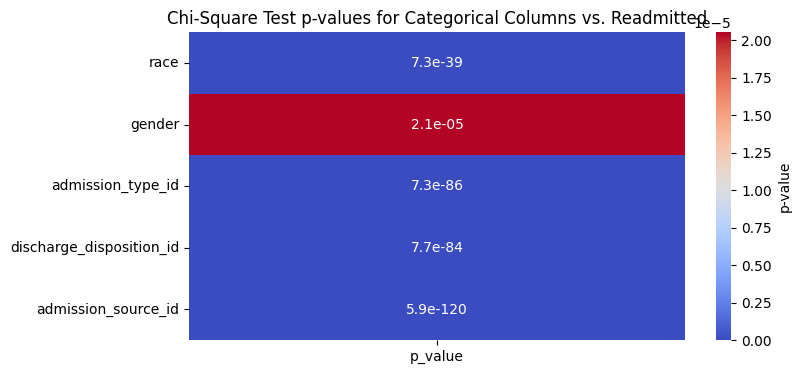

In [78]:
# List of specific categorical columns to analyze
categorical_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']

# Create a DataFrame to store chi-square p-values
chi_square_p_values = pd.DataFrame(index=categorical_cols, columns=['p_value'])

# Calculate Chi-Square p-value for each categorical column with 'readmitted'
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['readmitted'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_p_values.loc[col, 'p_value'] = p

# Plot a heatmap of the p-values
plt.figure(figsize=(8, 4))
sns.heatmap(chi_square_p_values.astype(float), annot=True, cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Chi-Square Test p-values for Categorical Columns vs. Readmitted')
plt.show()

<div style="color: blue; font-size: 12px;">
    <p>The Chi-Square Test p-values for categorical columns vs. readmission status indicate the following insights:</p>
    <ul>
        <li><b>Significant Associations:</b>
            <ul>
                <li><b>Admission Source ID, Admission Type ID, and Discharge Disposition ID</b> have extremely low p-values (<code>5.9e-120</code>, <code>7.3e-86</code>, and <code>7.7e-84</code>, respectively), suggesting a very strong association with readmission status. These features may capture critical aspects of a patient's hospitalization, such as the reason for admission and the discharge circumstances, which could affect the likelihood of readmission.</li>
                <li><b>Race</b> also has a low p-value (<code>7.3e-39</code>), indicating a significant association with readmission. This could reflect disparities in healthcare access, treatment outcomes, or health status across different racial groups.</li>
            </ul>
        </li>
        <li><b>Moderately Significant Association:</b>
            <ul>
                <li><b>Gender</b> has a p-value (<code>2.1e-05</code>) that is significantly lower than the typical threshold (0.05), but it is notably higher than other categorical variables in this test. This suggests that while gender has some association with readmission, it may not be as influential as factors like admission source or type.</li>
            </ul>
        </li>
    </ul>
    <hr style="border: 1px solid blue;">
    <p><b>Key Takeaways:</b> The results suggest that <b>admission source, admission type, discharge disposition, and race</b> are critical categorical features related to readmission risk. These variables should be prioritized for further analysis and in the predictive model for readmission. Although gender shows some association, its impact may be secondary compared to other categorical features. Overall, this analysis highlights that certain administrative and demographic factors significantly influence patient readmission likelihood, particularly how and why a patient is admitted and discharged.</p>
</div>

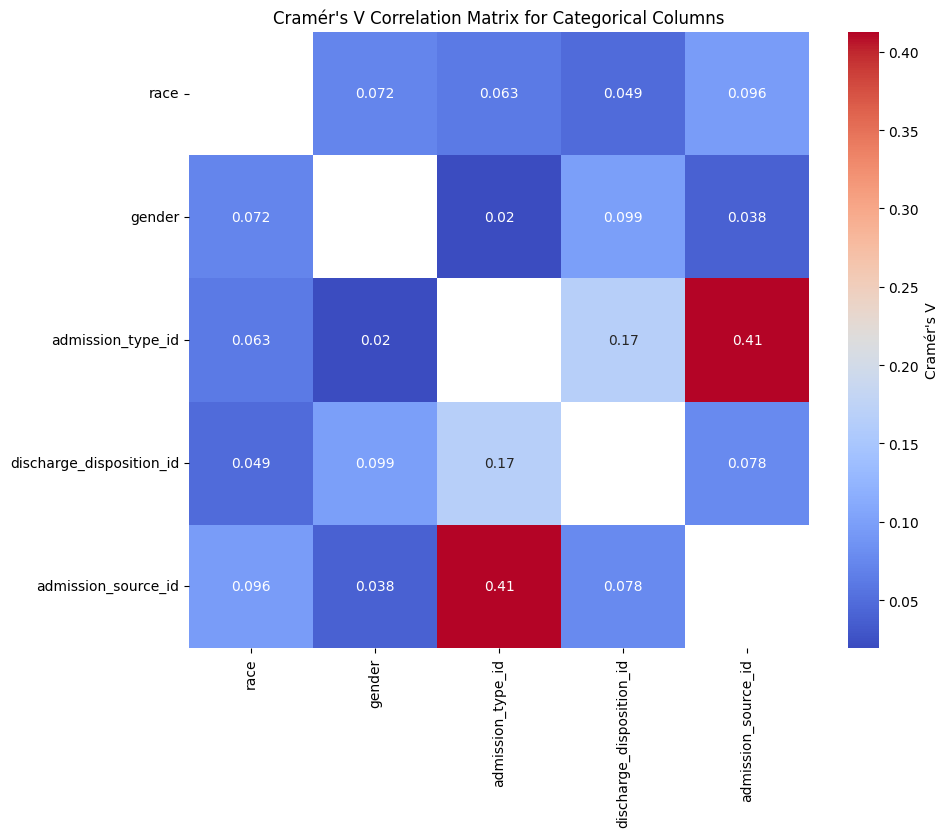

In [79]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Create a correlation matrix for categorical columns
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Calculate Cramér's V for each pair of selected categorical columns
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        else:
            cramers_v_matrix.loc[col1, col2] = np.nan

# Convert to float for plotting
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the Cramér's V heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': "Cramér's V"})
plt.title("Cramér's V Correlation Matrix for Categorical Columns")
plt.show()


<div style="color: blue; font-size: 12px;">
    <p>The Cramér's V correlation matrix for categorical columns reveals the following insights:</p>
    <ul>
        <li><b>Moderate Correlations:</b>
            <ul>
                <li><b>Admission Type ID and Admission Source ID</b> have a notable correlation (<code>0.41</code>). This suggests that the type of admission and source of admission are somewhat related, possibly indicating that certain admission types are more likely to come from specific sources.</li>
                <li><b>Discharge Disposition ID and Admission Type ID</b> show a moderate correlation (<code>0.17</code>), suggesting that the manner in which a patient is discharged may be linked to the type of admission they had. For instance, patients admitted as emergencies might have a different discharge pattern than elective admissions.</li>
            </ul>
        </li>
        <li><b>Low Correlations:</b>
            <ul>
                <li>The matrix shows generally low correlations among other pairs of features, with values around <code>0.1</code> or lower, indicating weak or no relationships between these variables. For example, <b>Race</b> and <b>Admission Type ID</b> (<code>0.063</code>) or <b>Gender</b> and <b>Admission Source ID</b> (<code>0.038</code>) have negligible associations, implying that these variables are largely independent of each other.</li>
            </ul>
        </li>
        <li><b>Key Variables with Weak Interactions:</b>
            <ul>
                <li><b>Race</b> and <b>Gender</b> show very low correlations with all other categorical features, indicating they are fairly independent variables in this dataset.</li>
                <li><b>Discharge Disposition ID</b> has mild associations with both <b>Admission Type ID</b> and <b>Admission Source ID</b>, reflecting some relationship between admission circumstances and discharge status, but the interactions are not particularly strong.</li>
            </ul>
        </li>
    </ul>
    <hr style="border: 1px solid blue;">
    <p><b>Key Takeaways:</b> The matrix highlights that <b>Admission Type ID</b>, <b>Admission Source ID</b>, and <b>Discharge Disposition ID</b> are the most interrelated categorical features. Their moderate correlations suggest that these features may together provide insights into patient admission and discharge patterns, potentially impacting readmission prediction. <b>Race</b> and <b>Gender</b> show minimal correlations with other variables, suggesting they may have a more isolated or direct effect on readmission, without interacting significantly with other categorical factors.</p>
    <p>These insights can guide feature selection in predictive modeling by focusing on admission and discharge characteristics while treating demographic factors as separate contributors.</p>
</div>

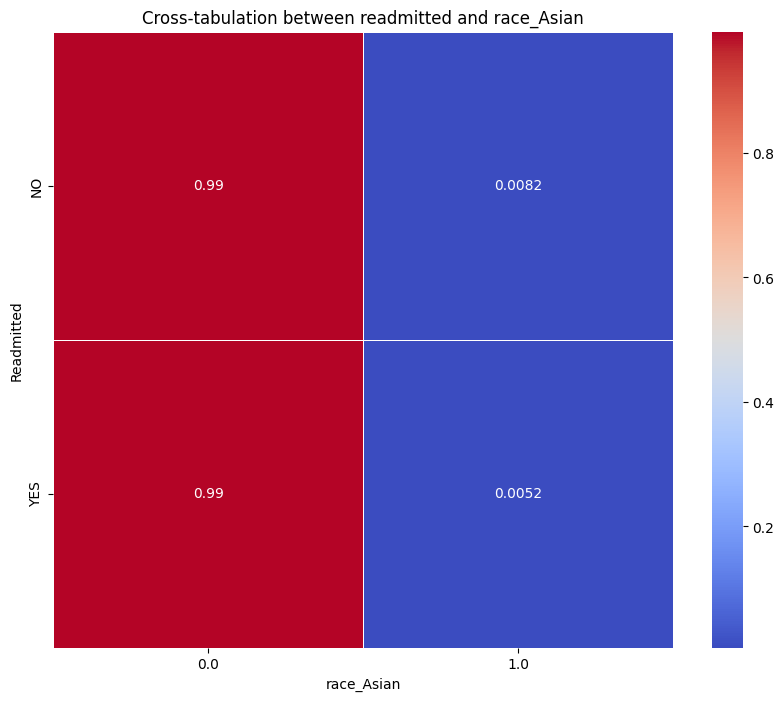

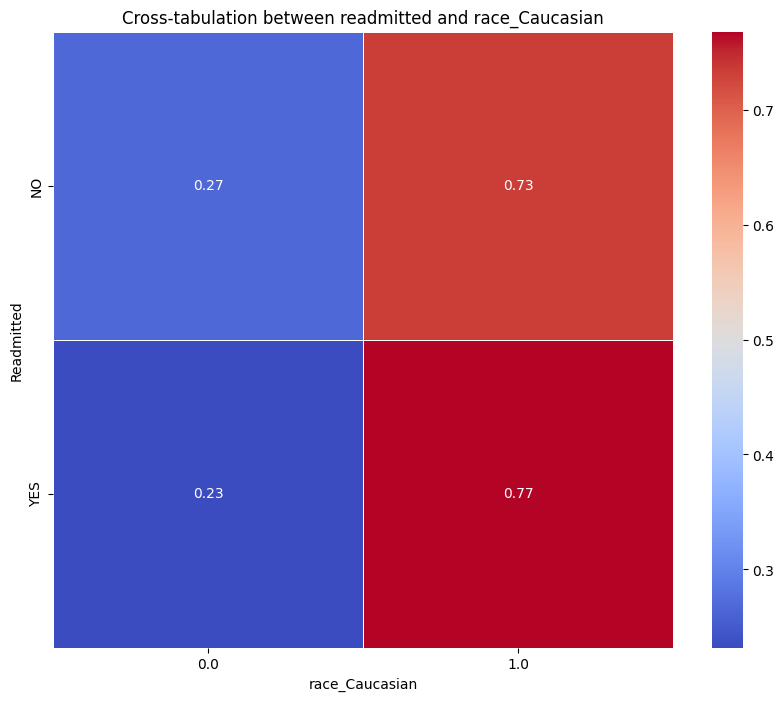

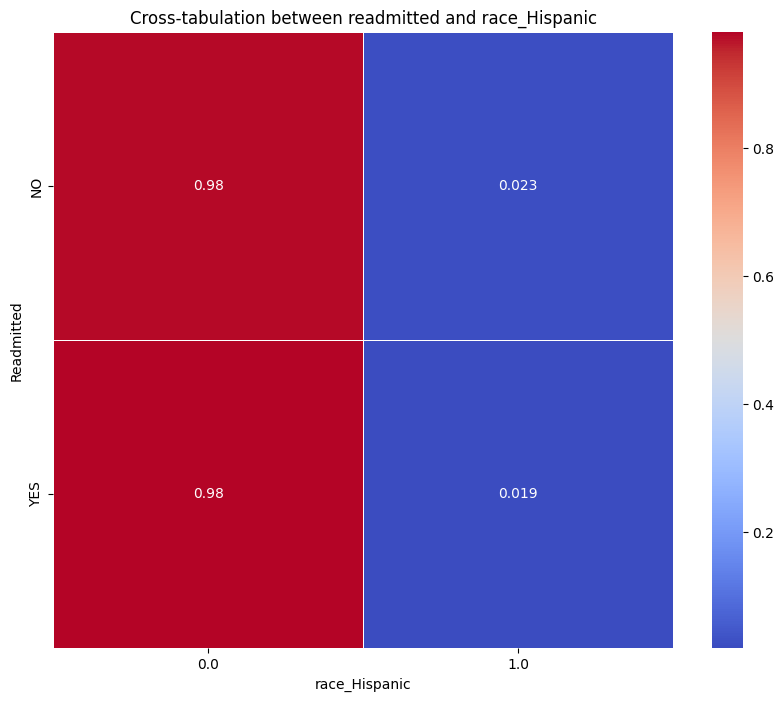

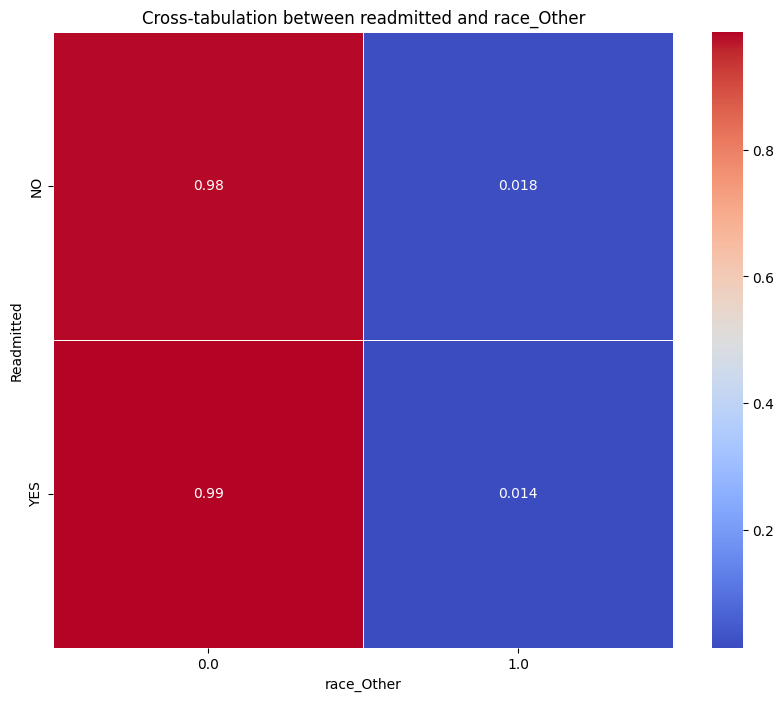

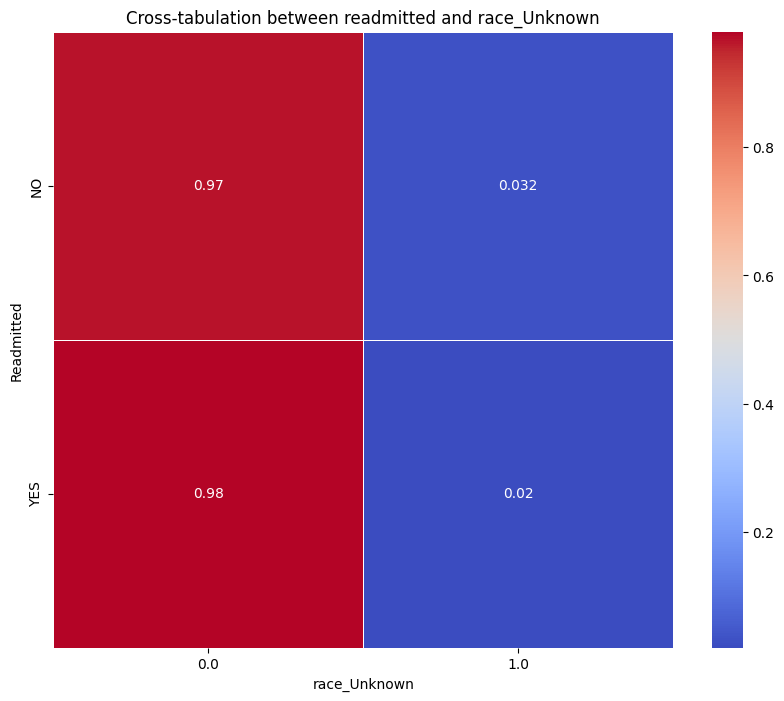

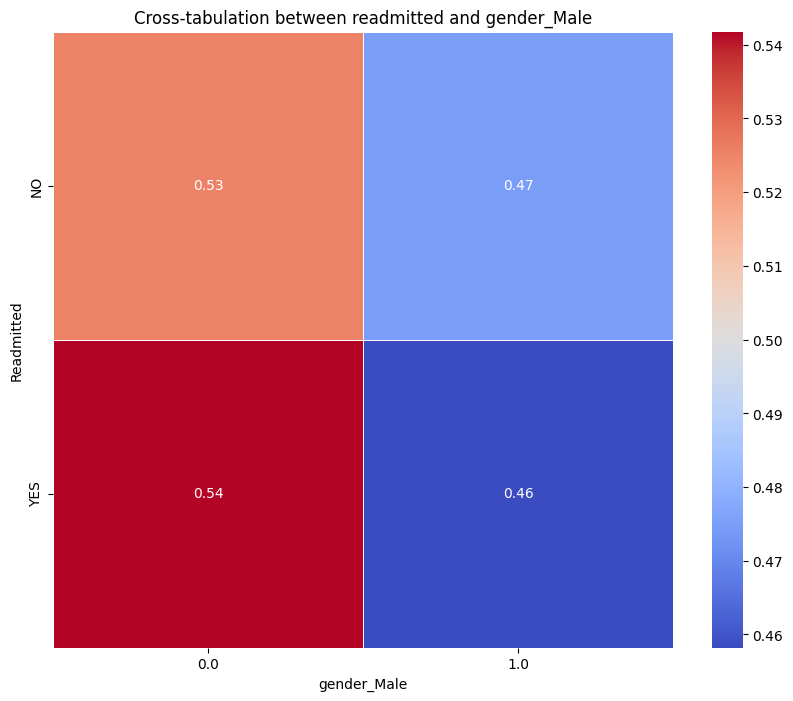

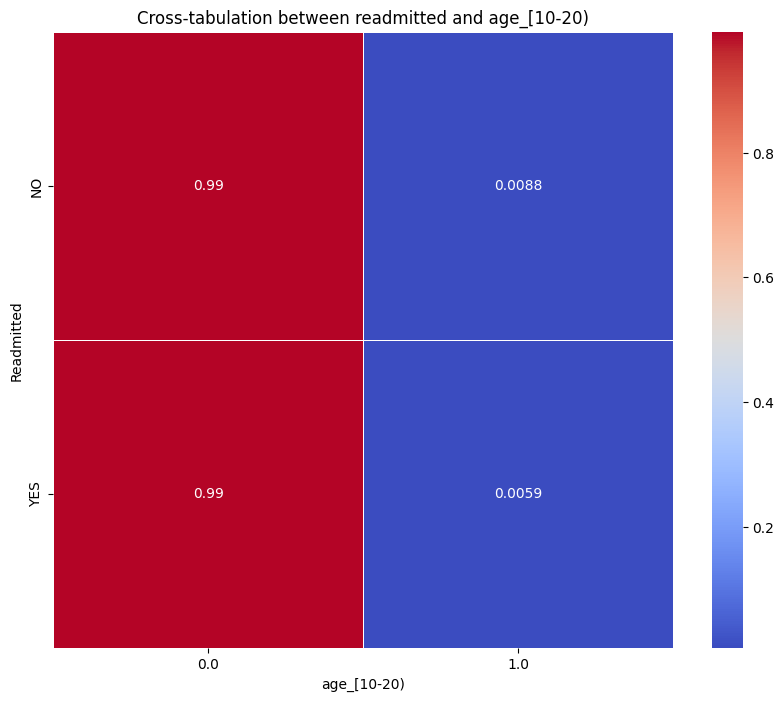

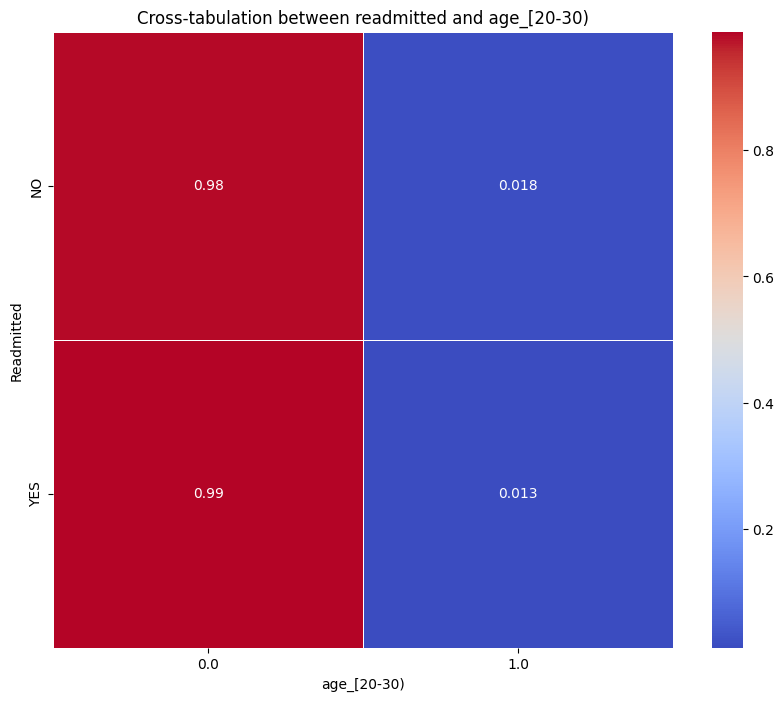

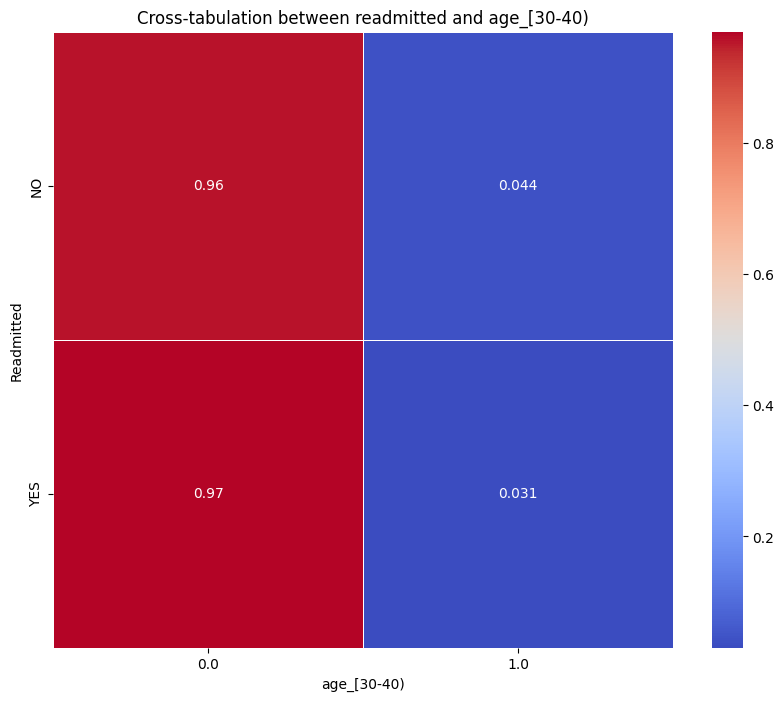

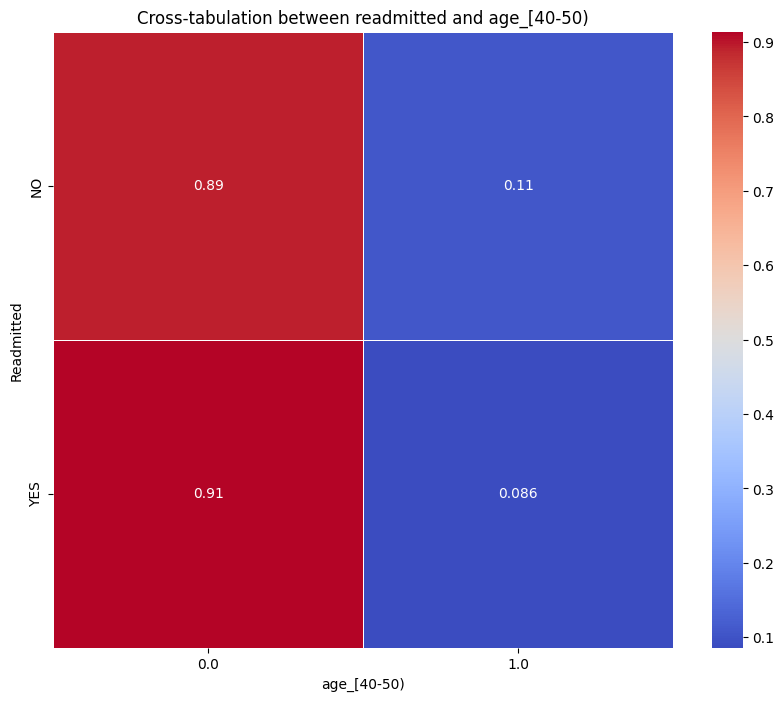

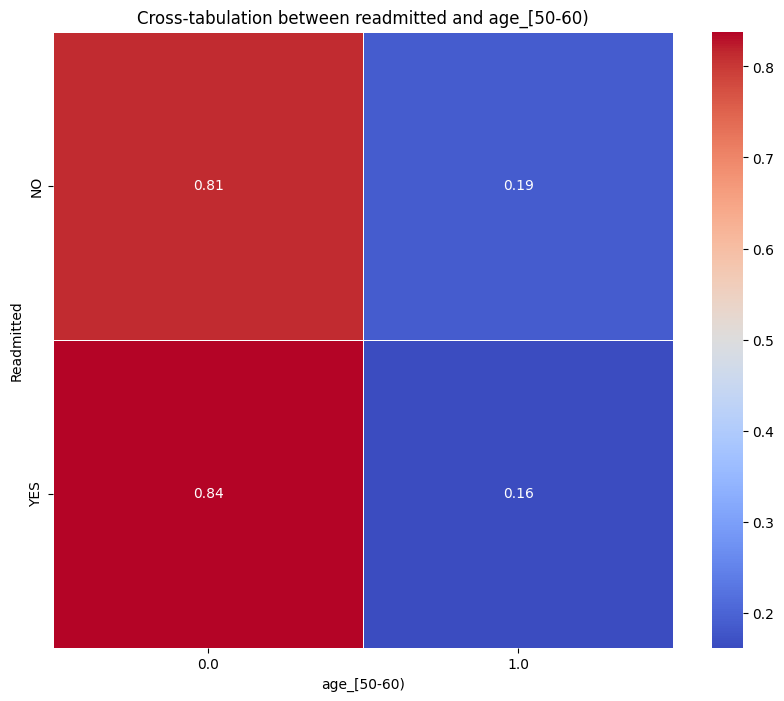

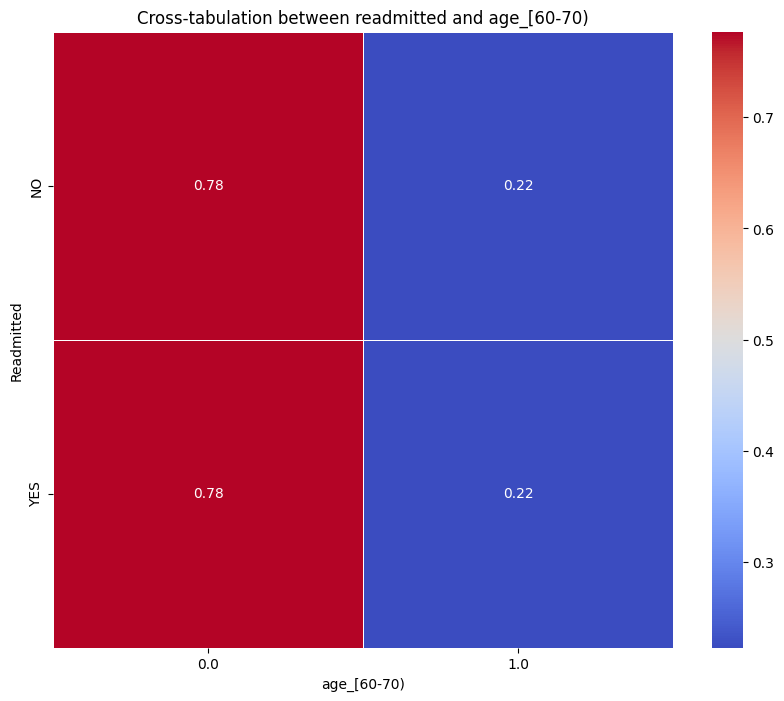

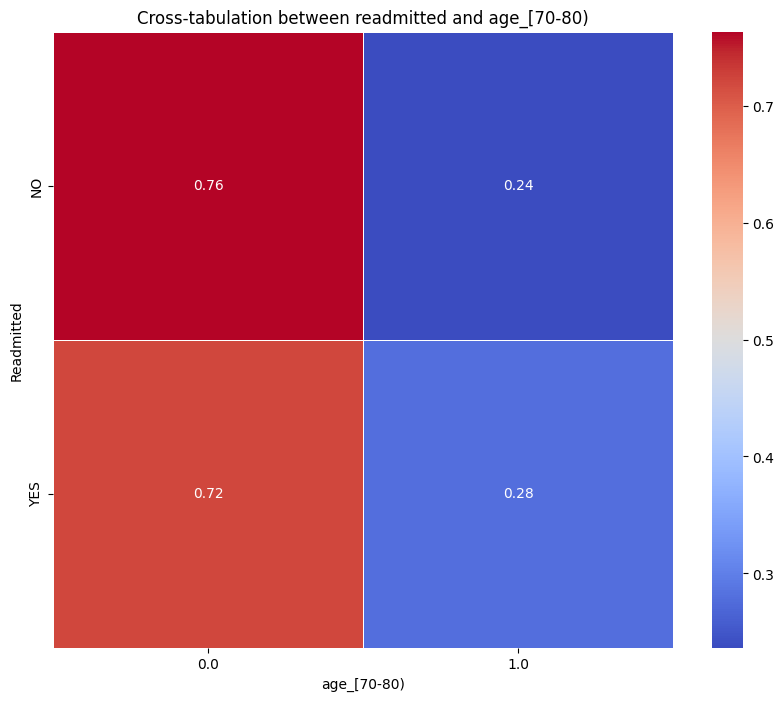

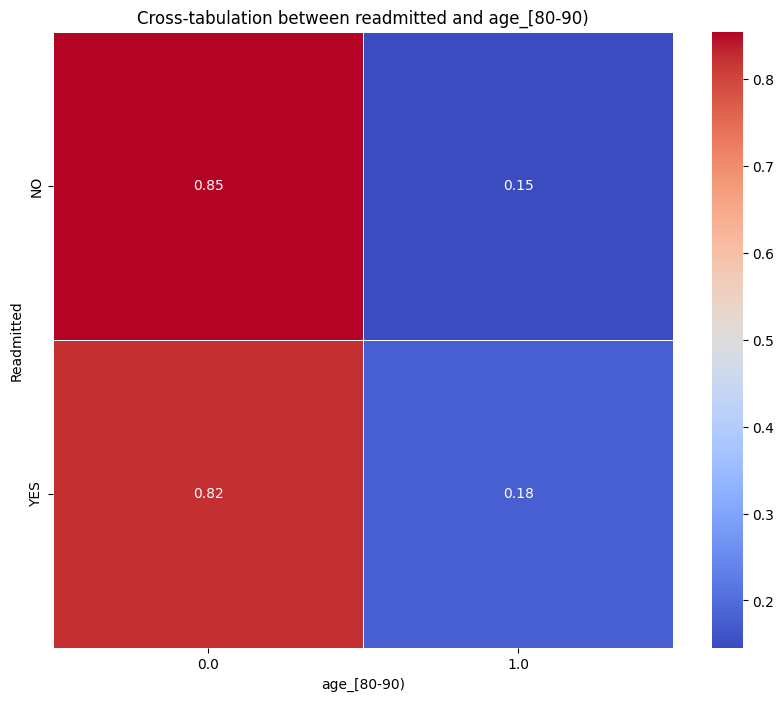

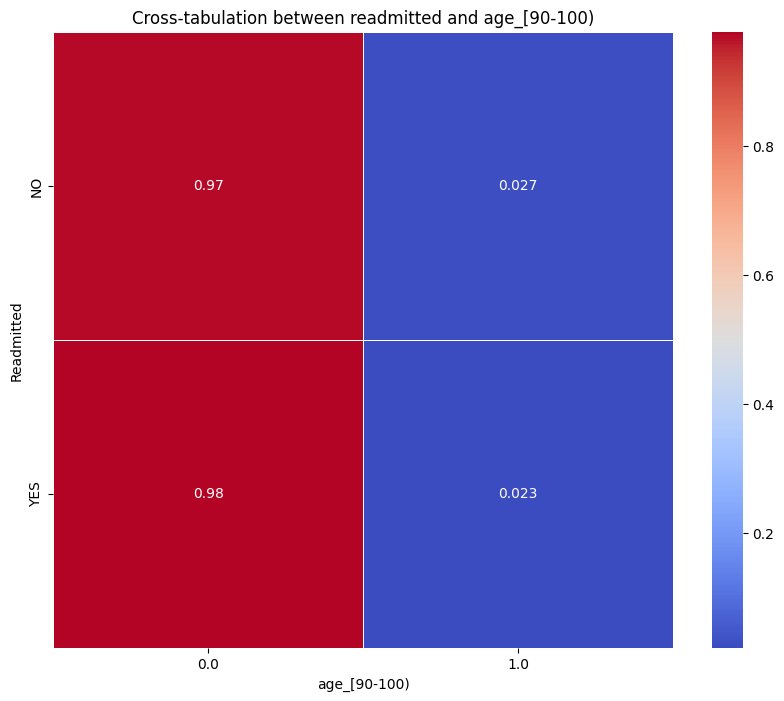

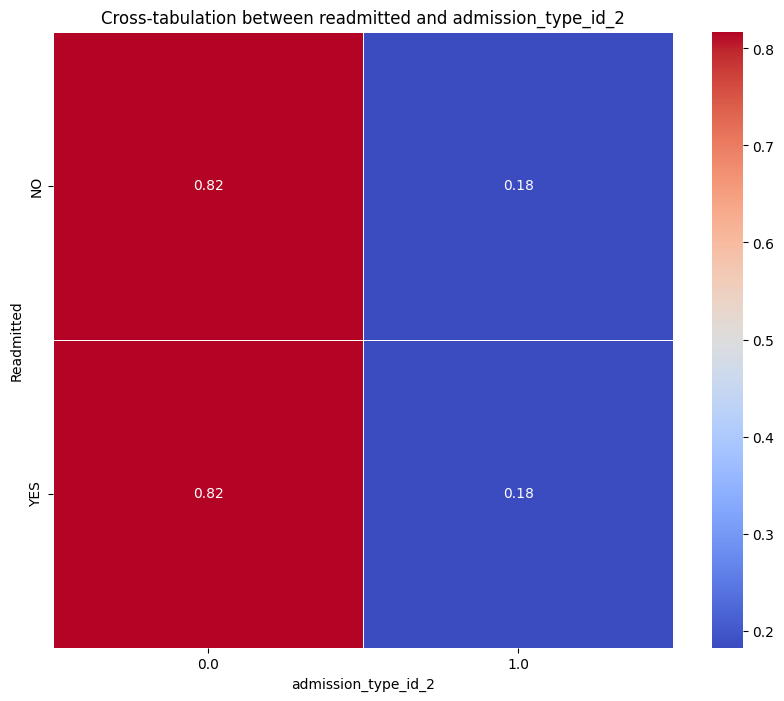

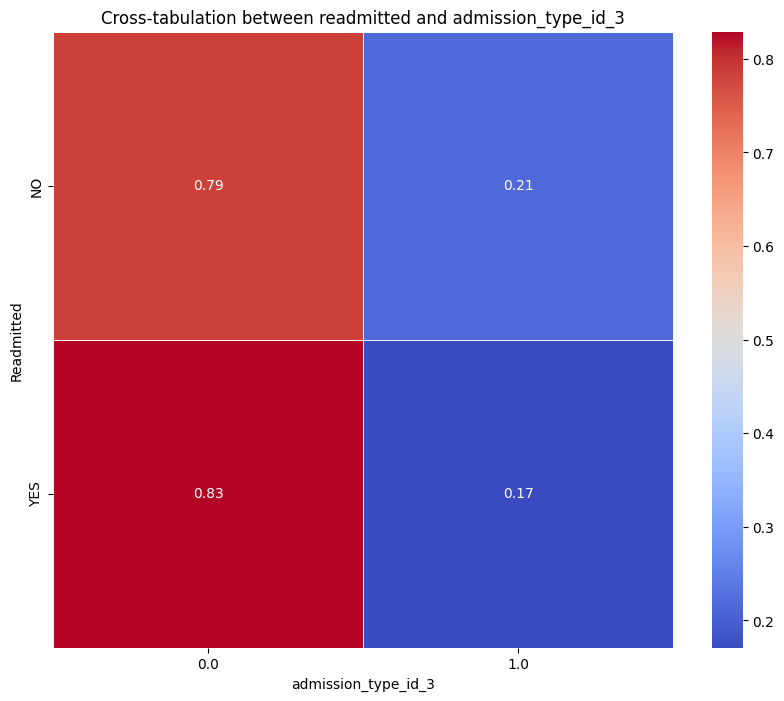

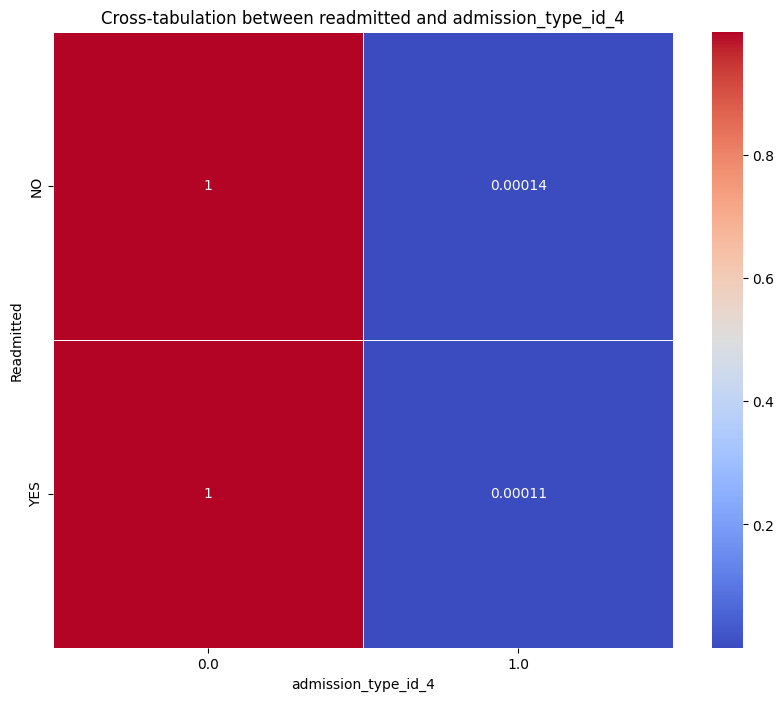

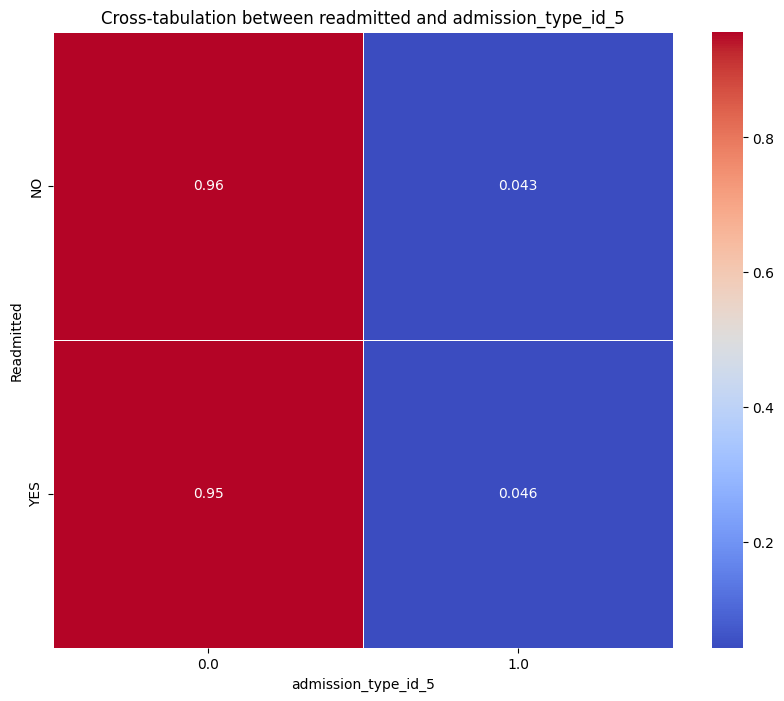

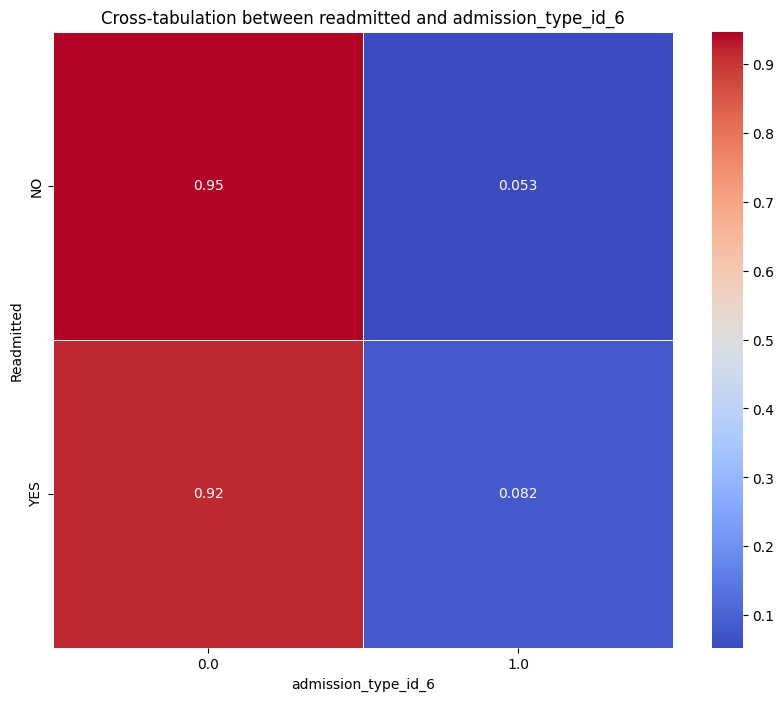

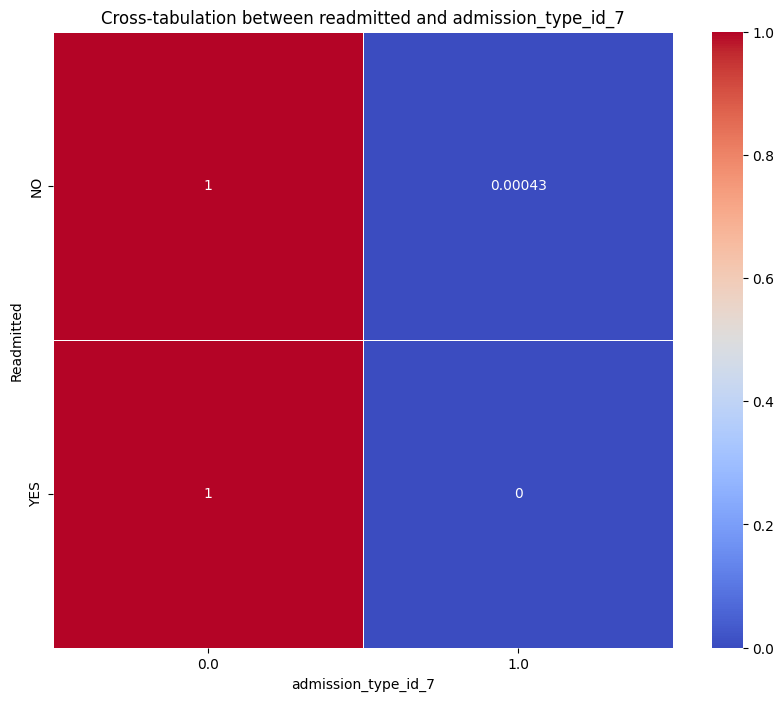

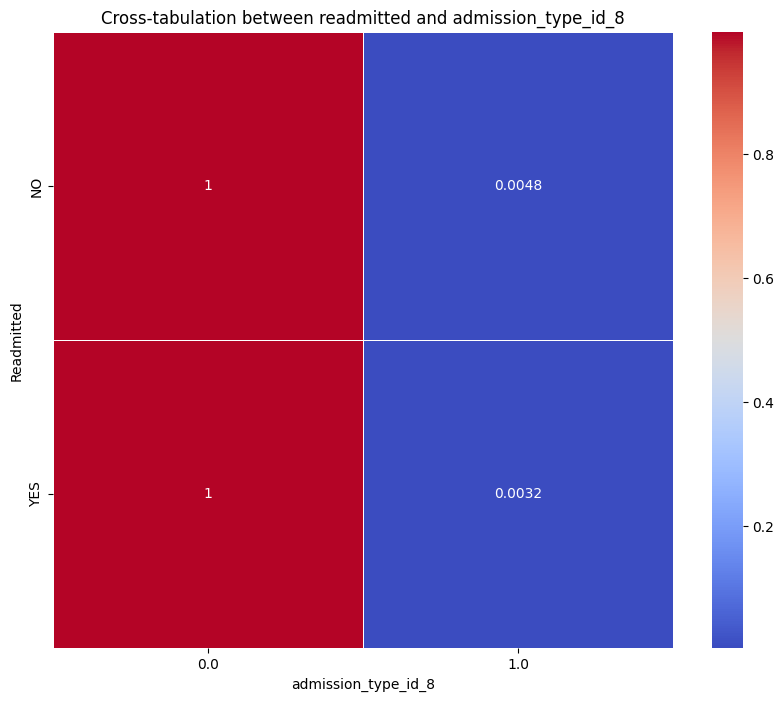

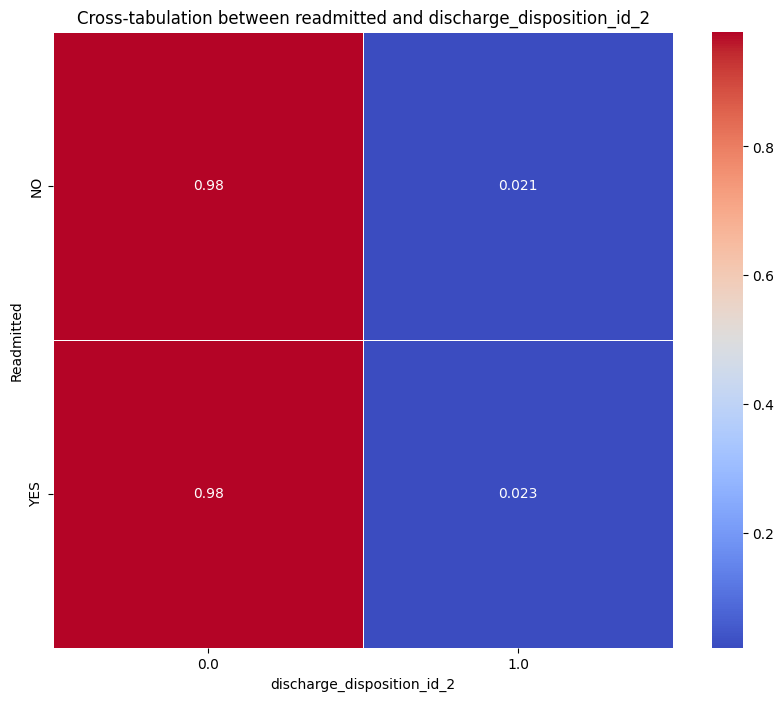

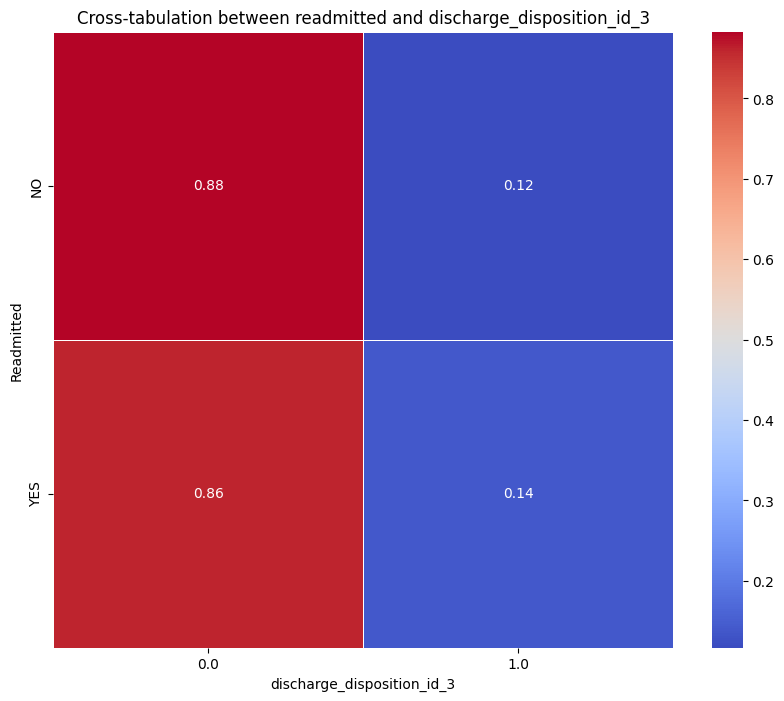

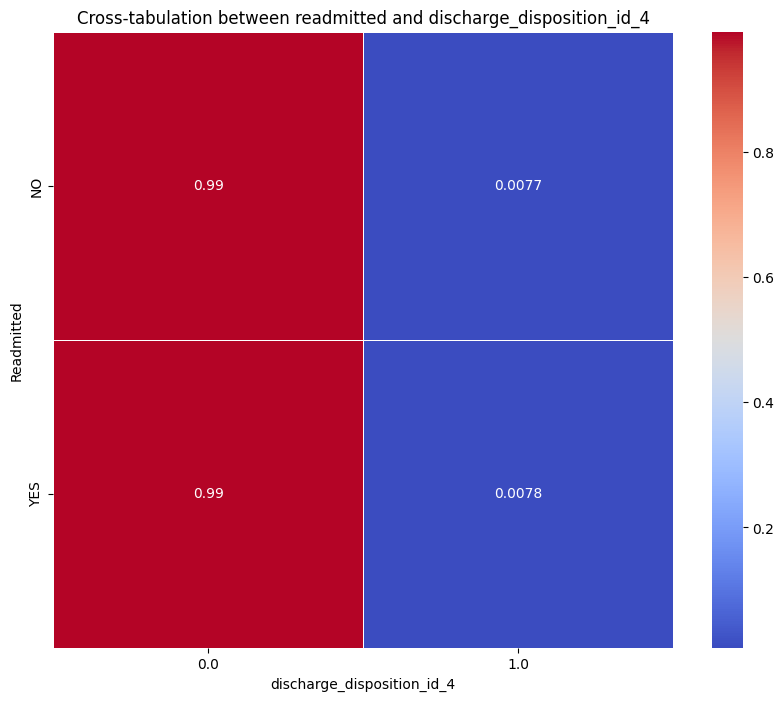

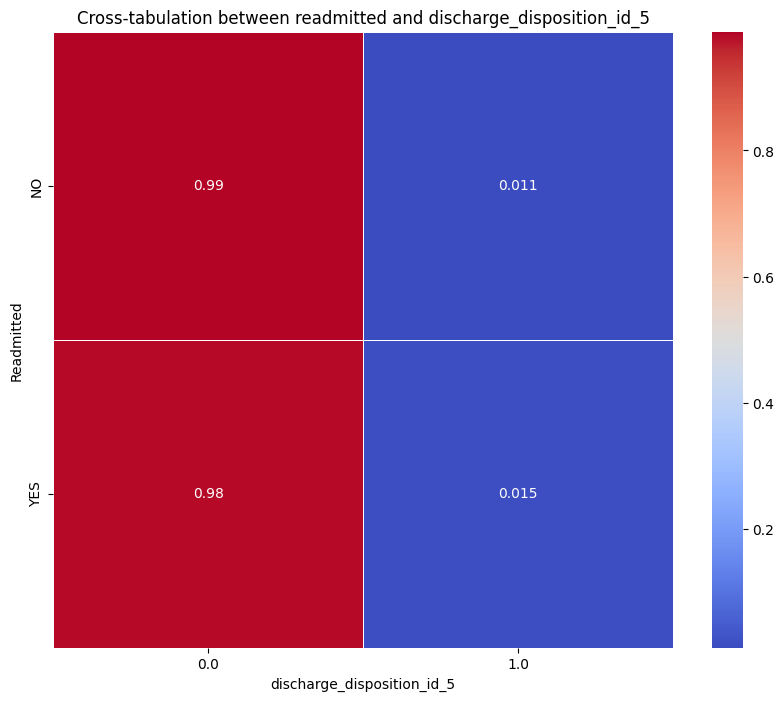

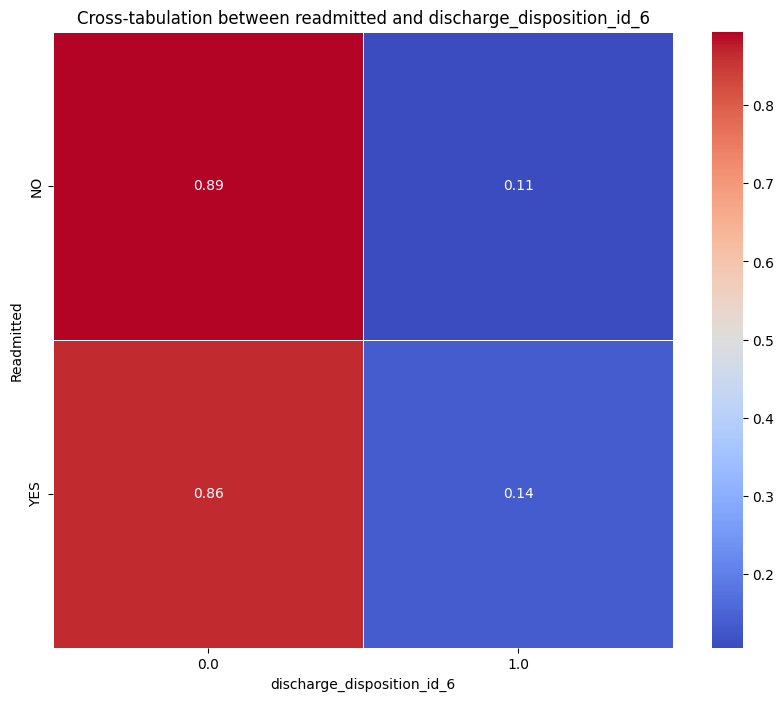

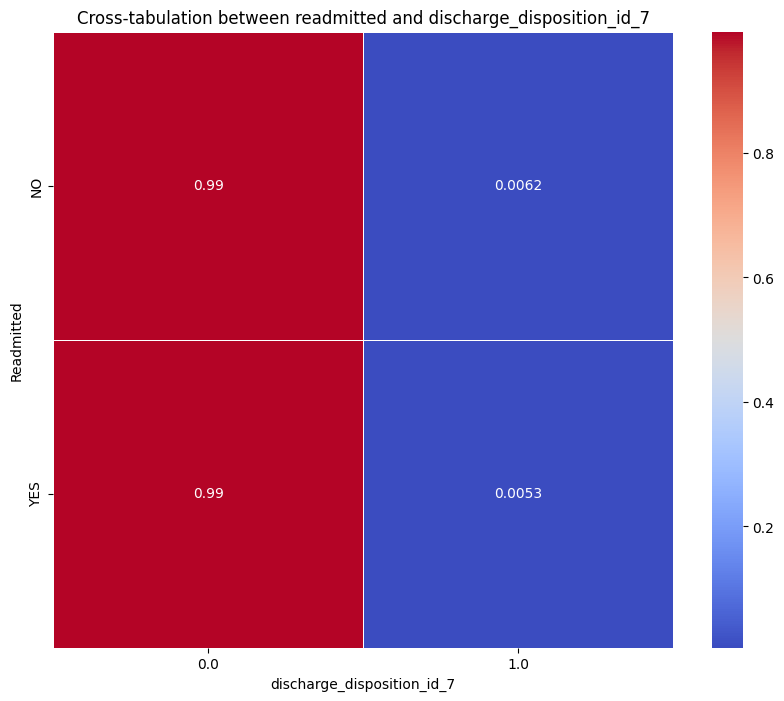

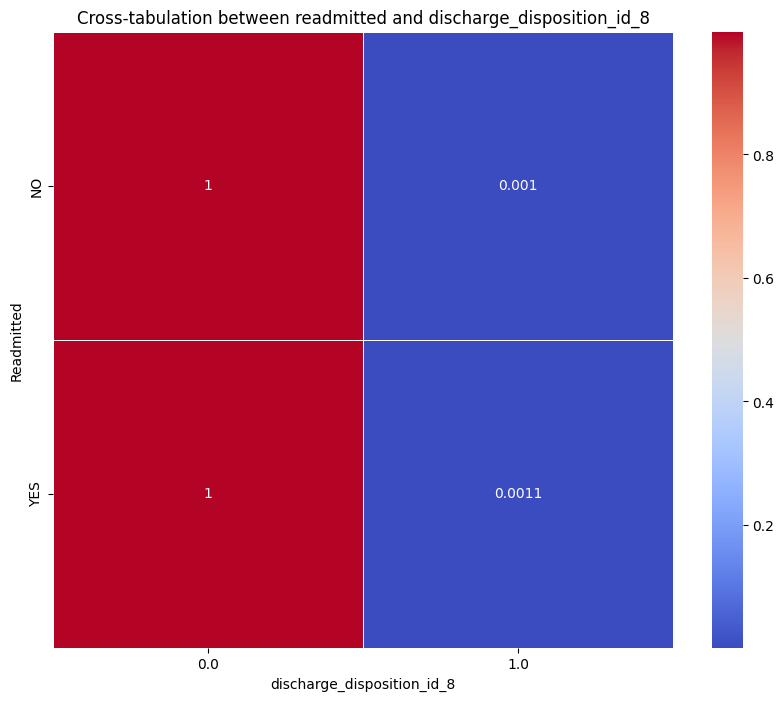

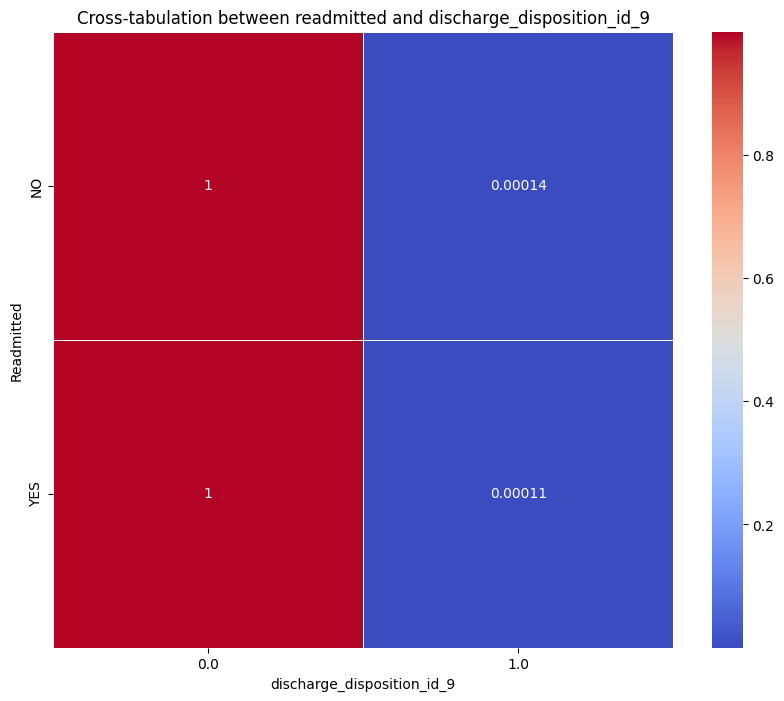

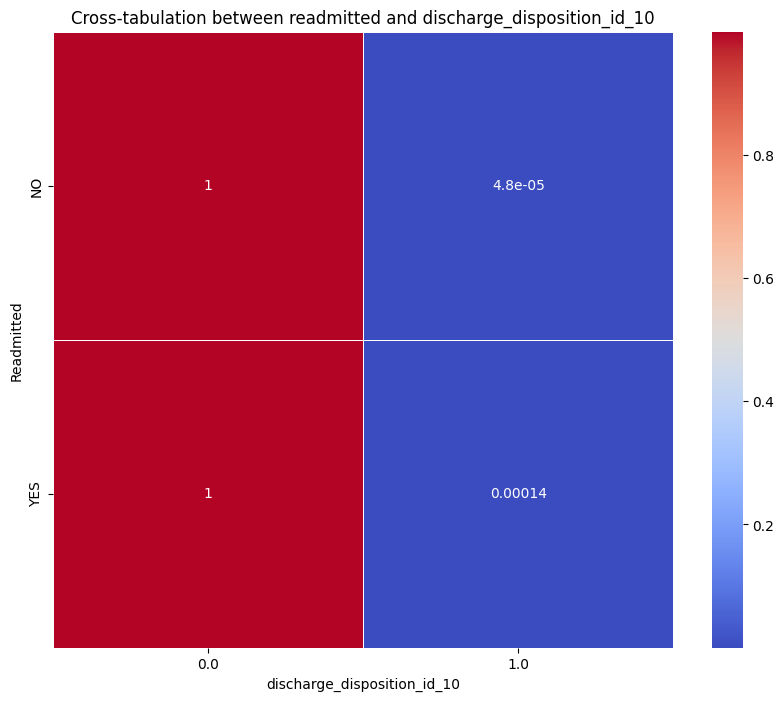

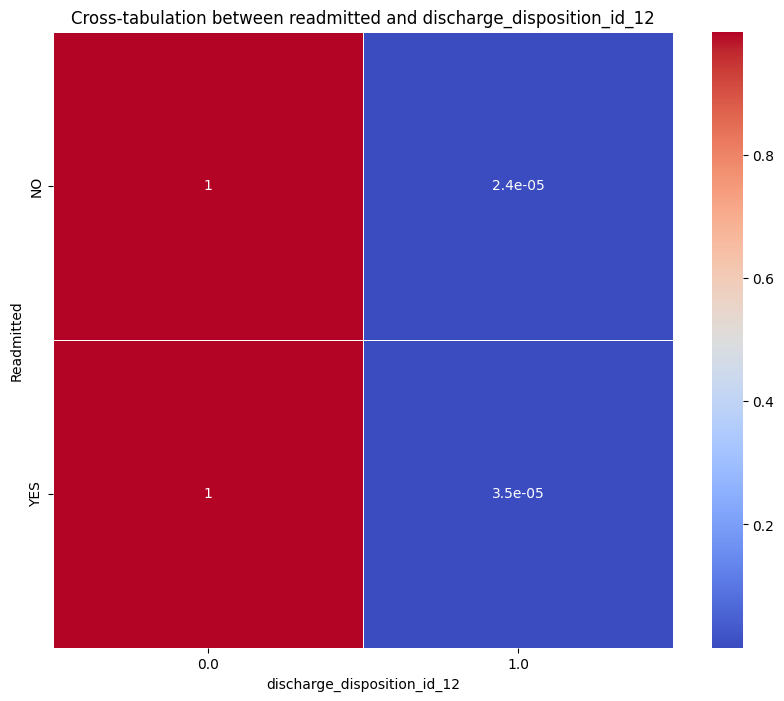

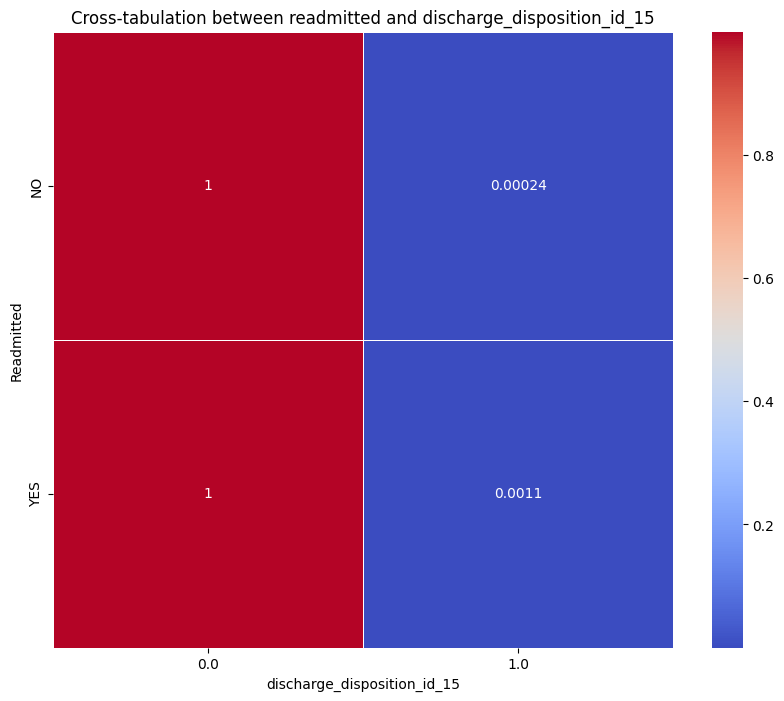

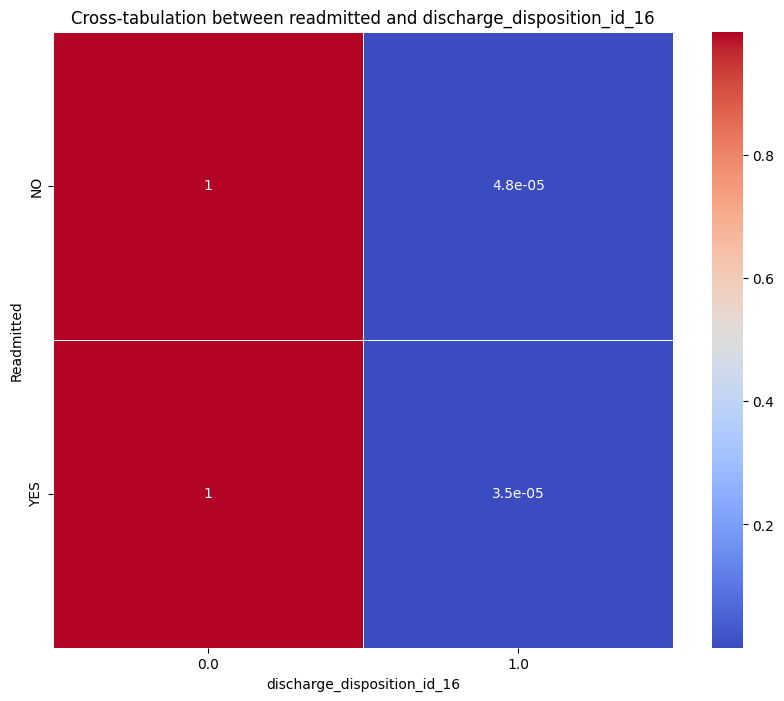

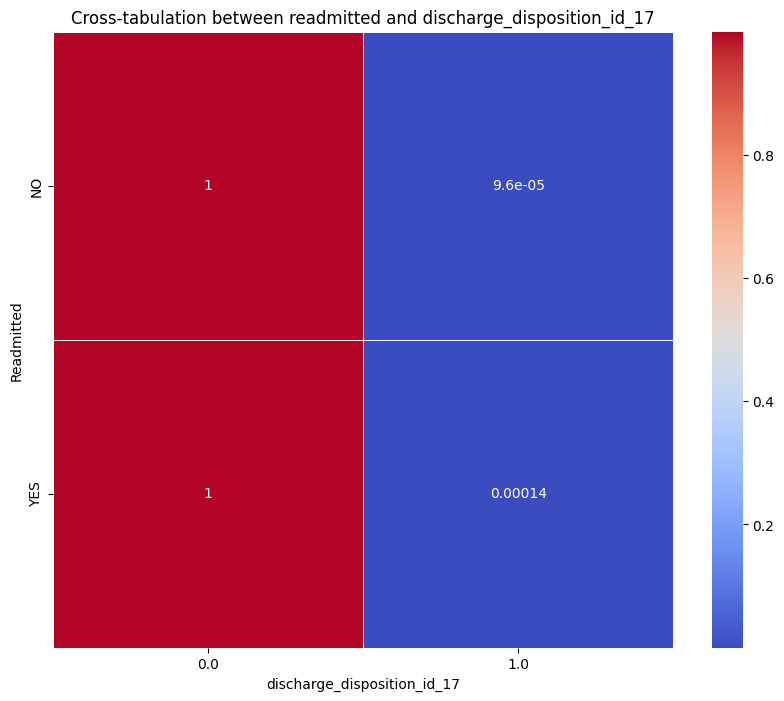

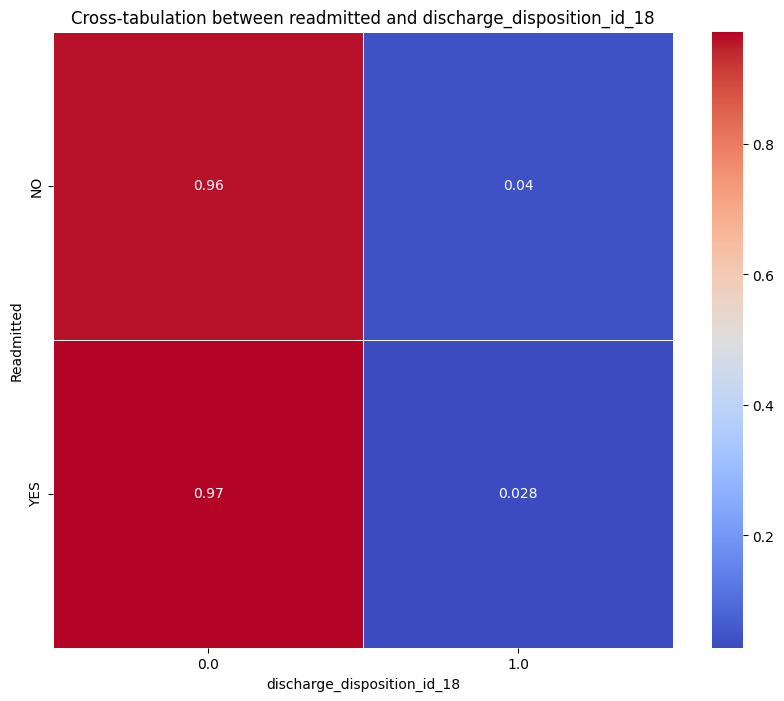

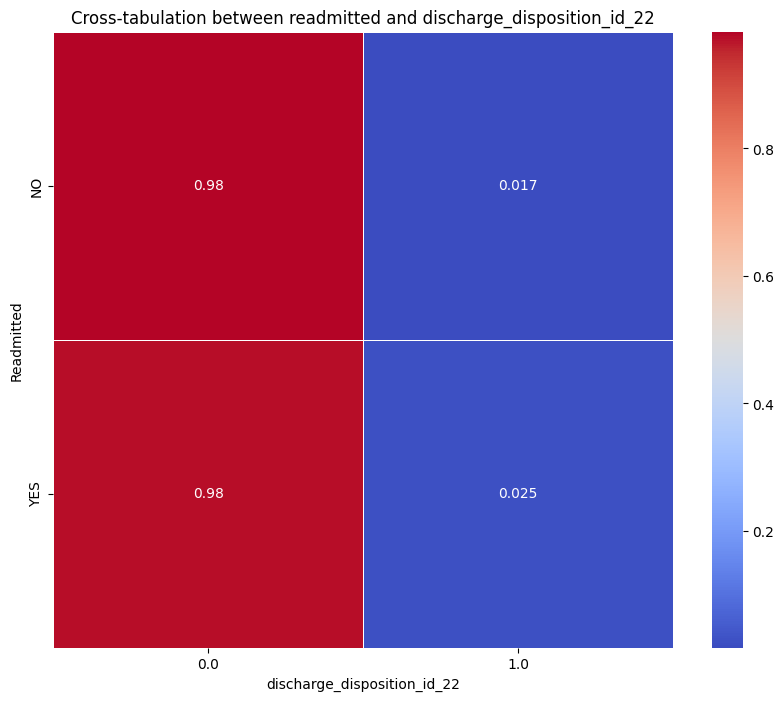

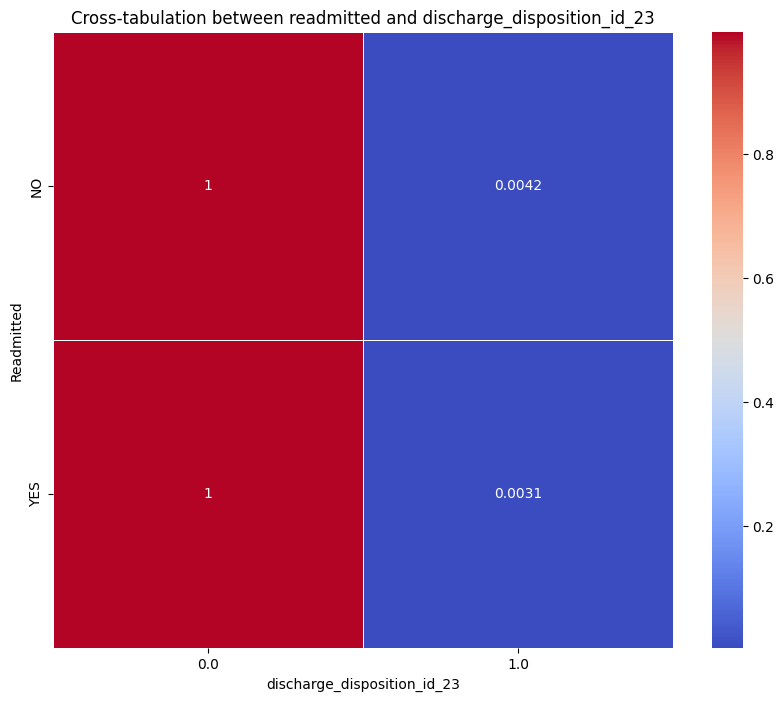

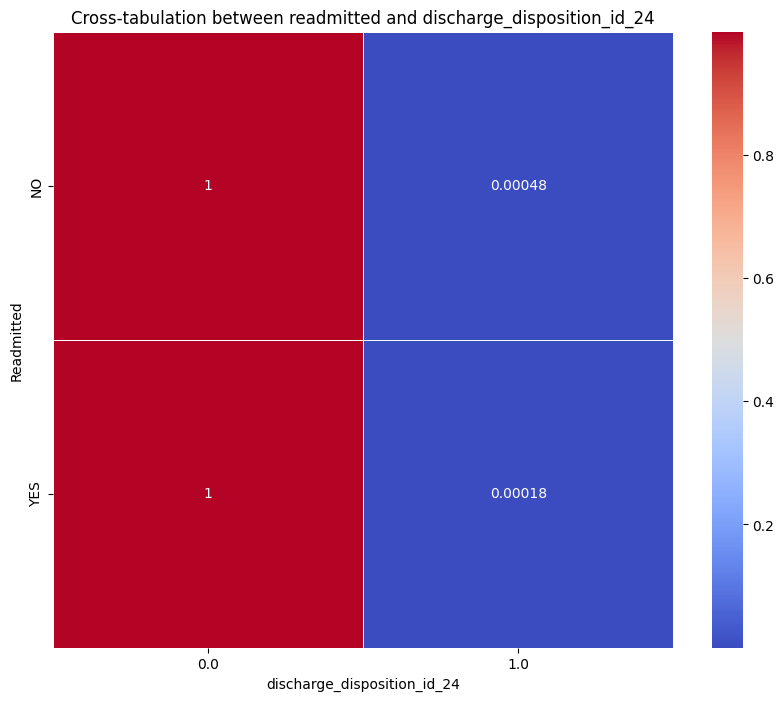

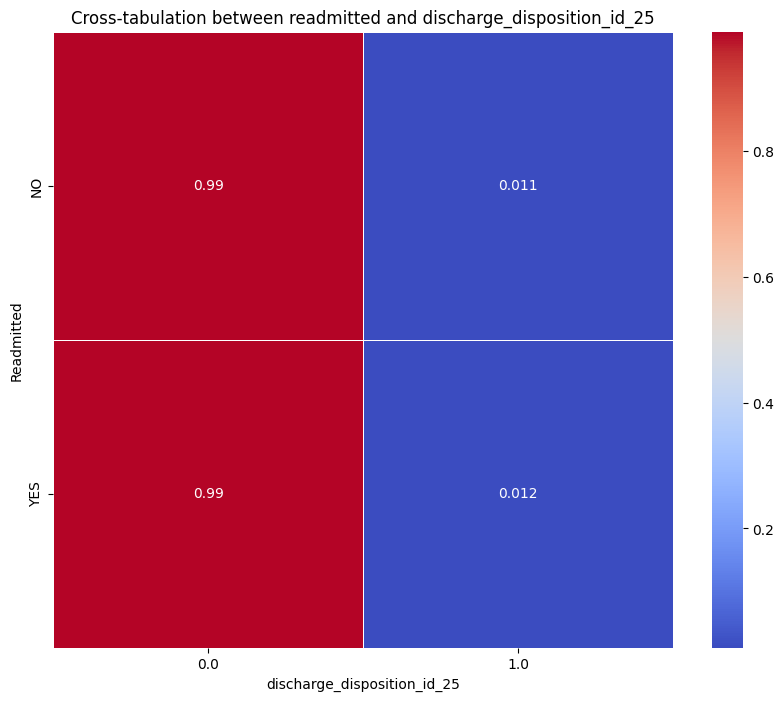

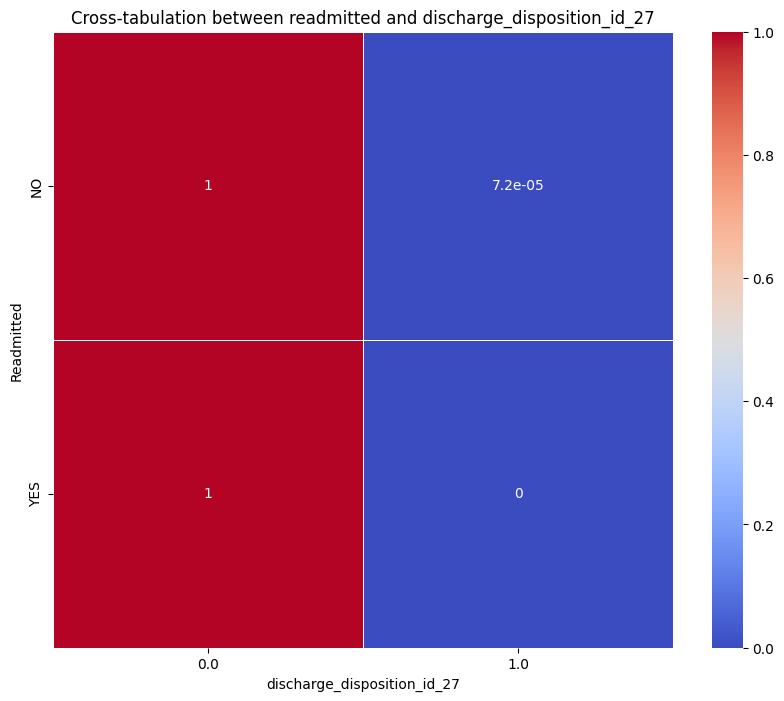

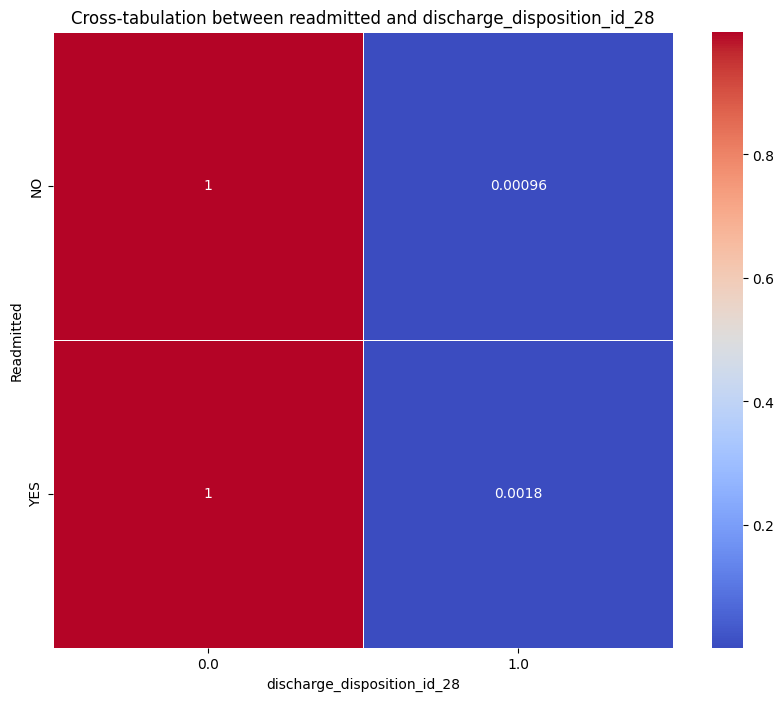

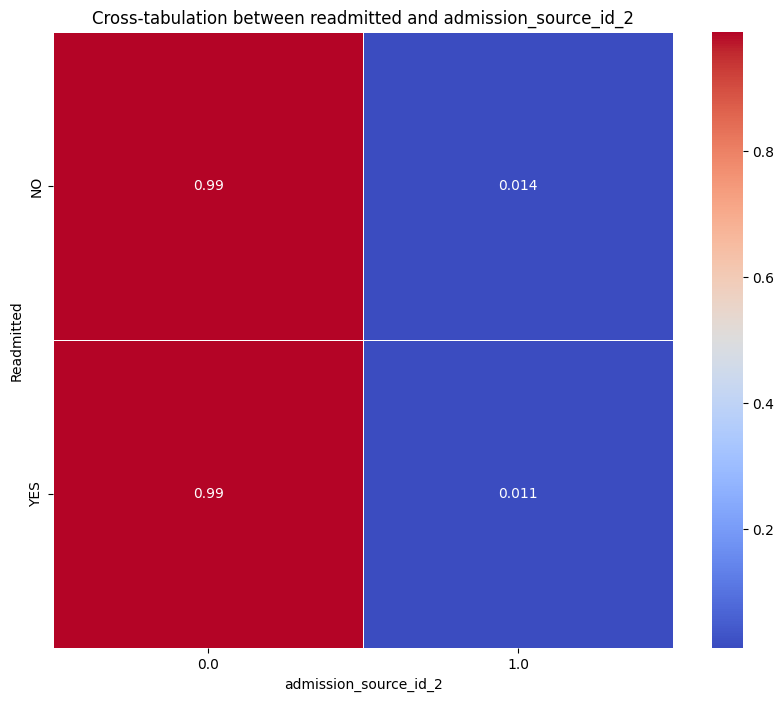

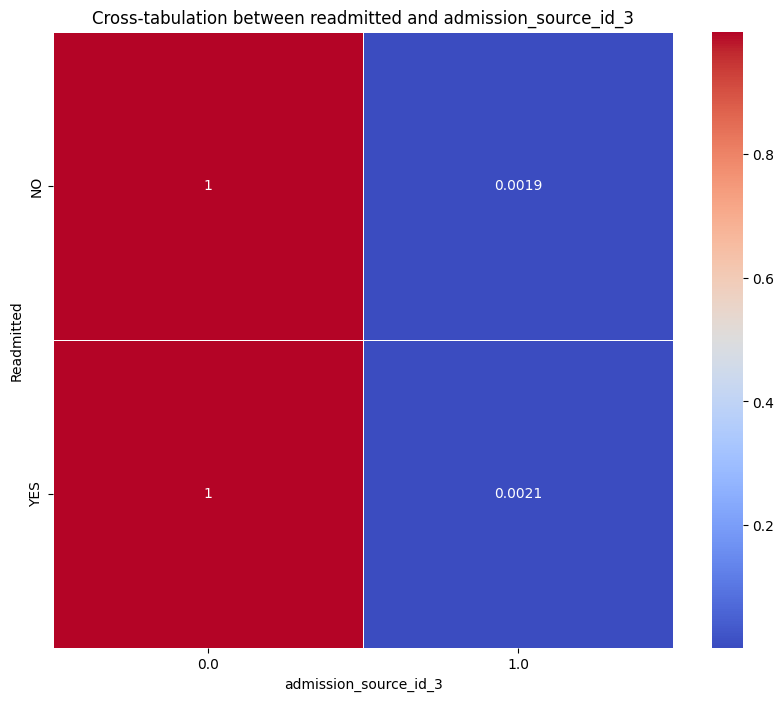

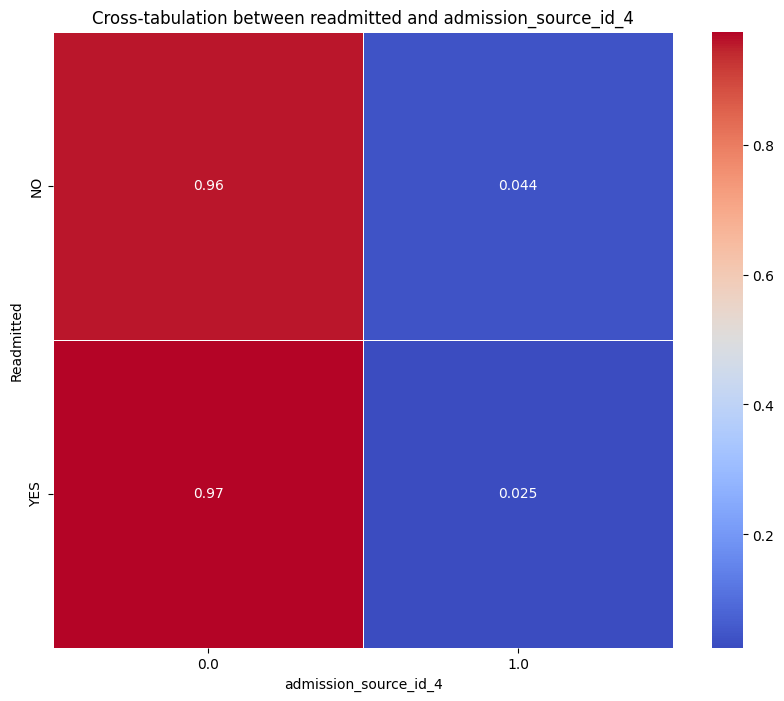

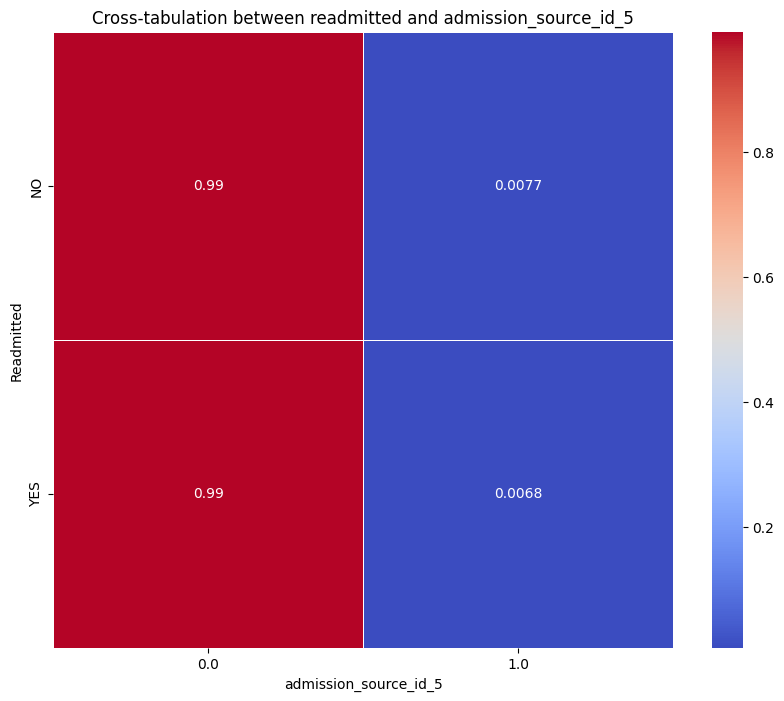

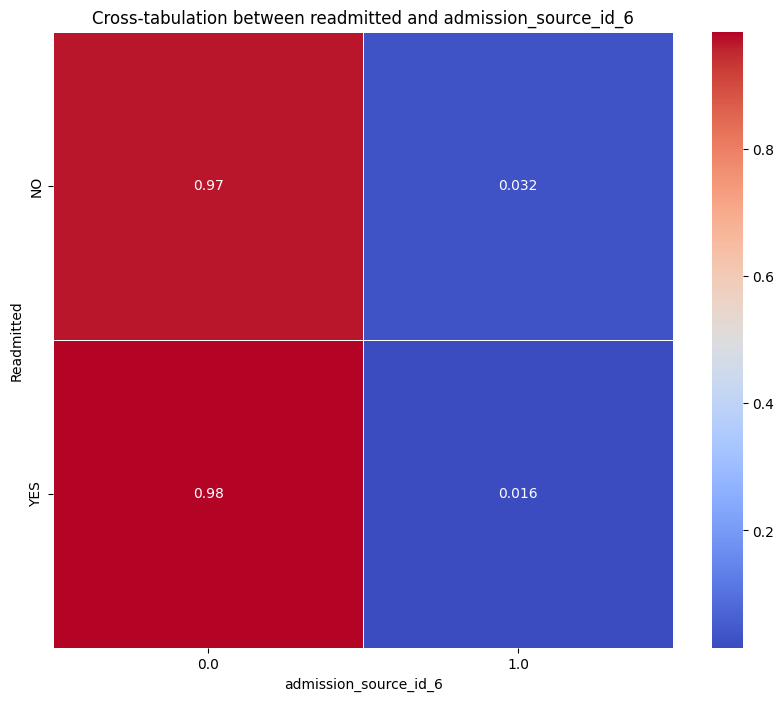

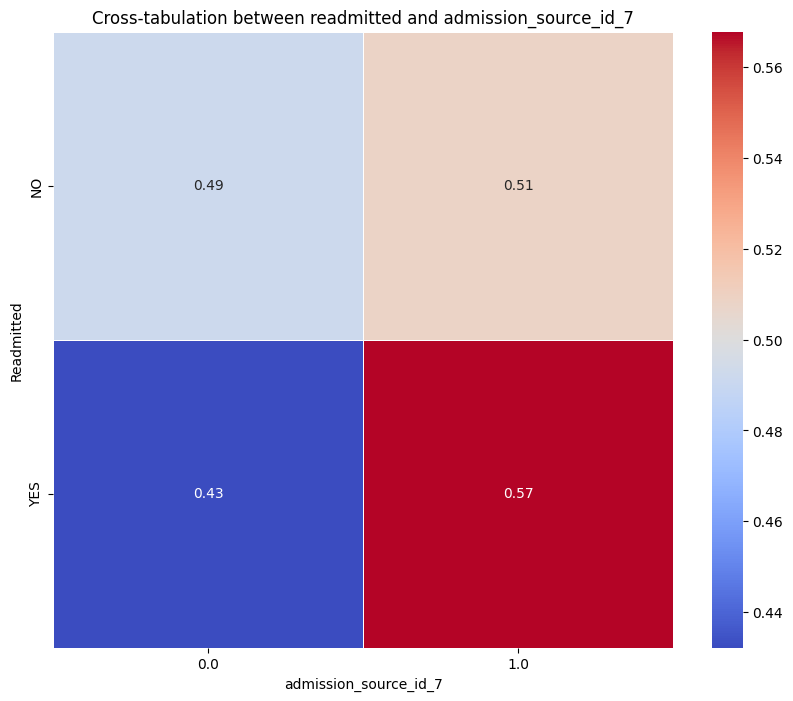

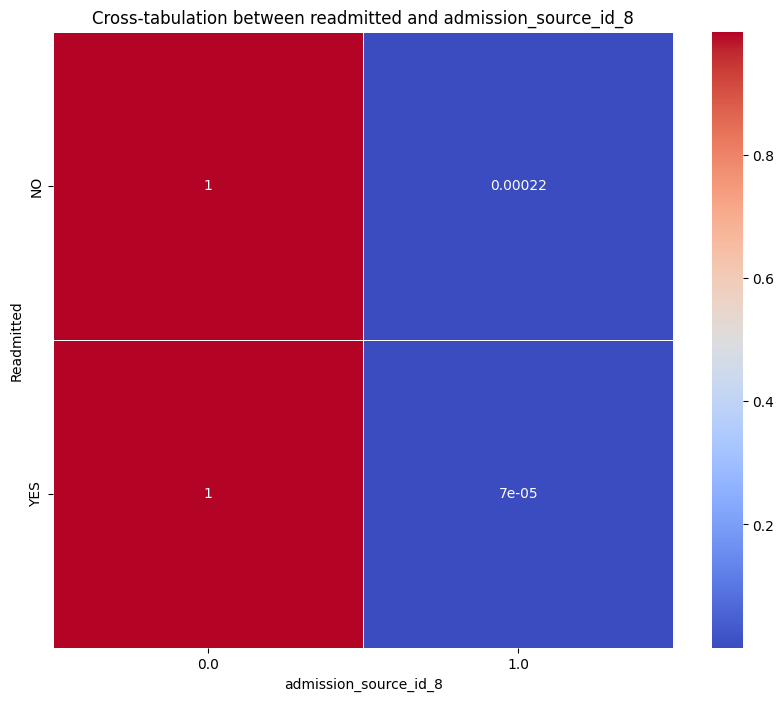

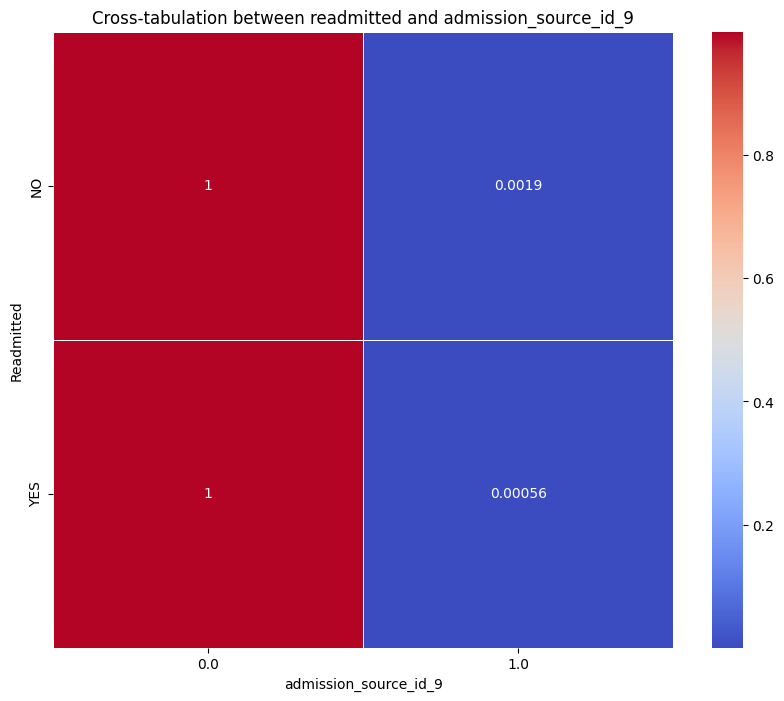

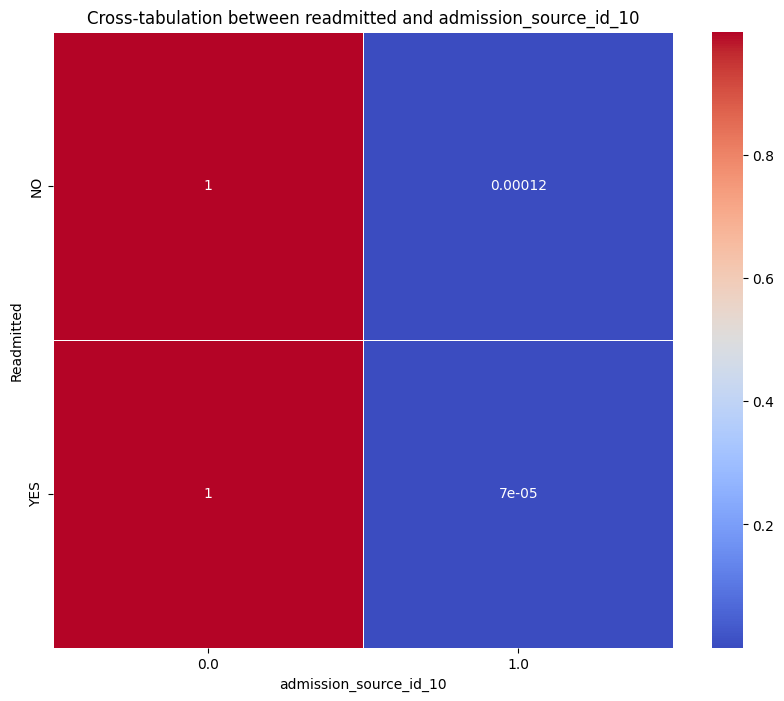

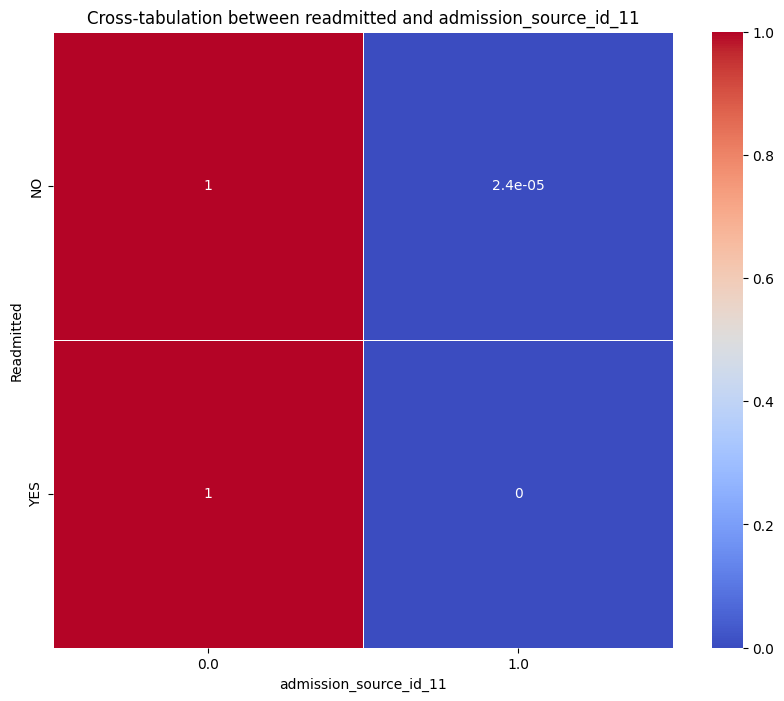

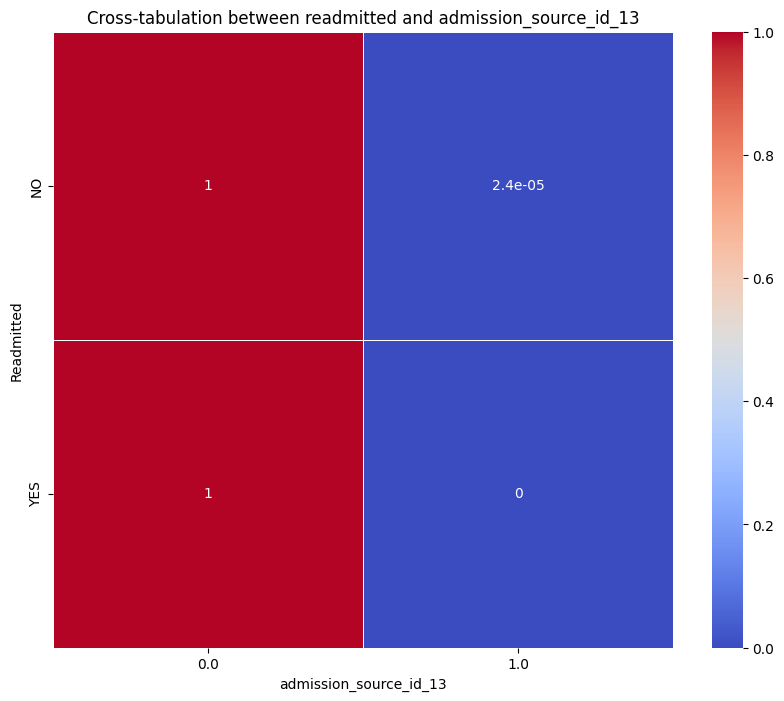

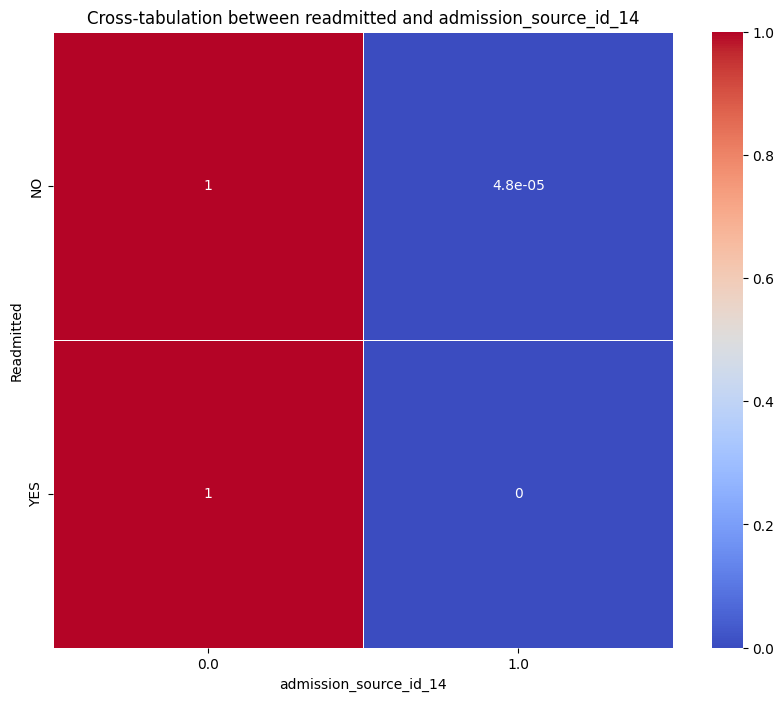

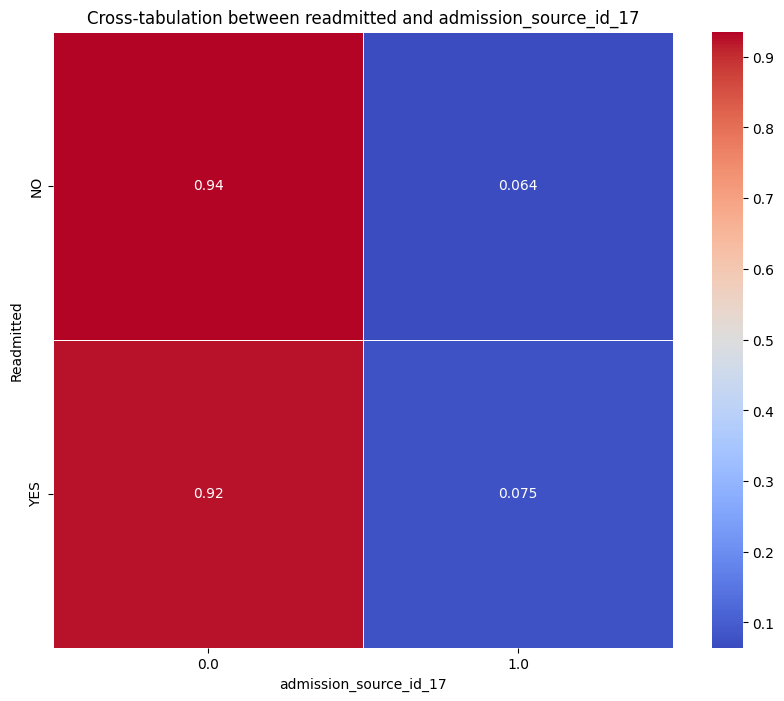

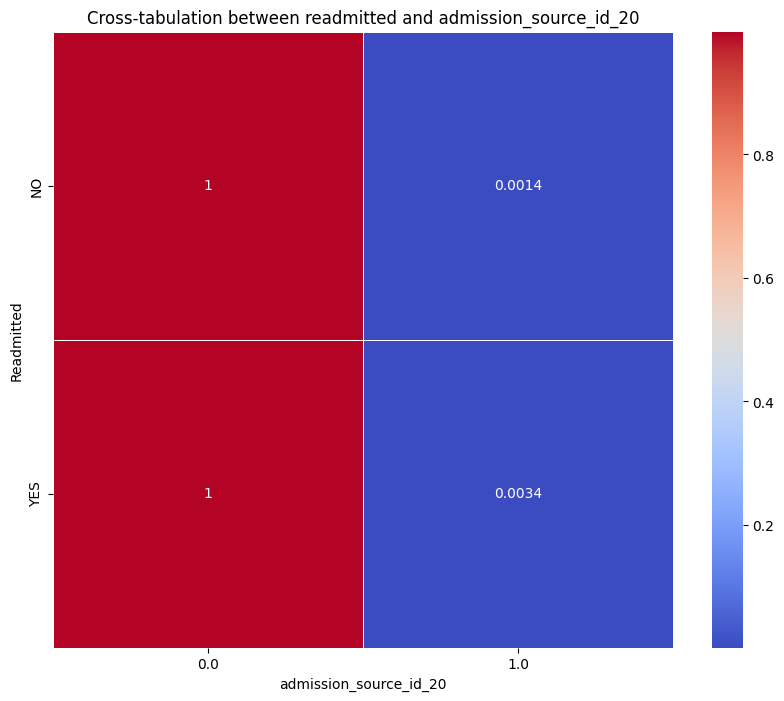

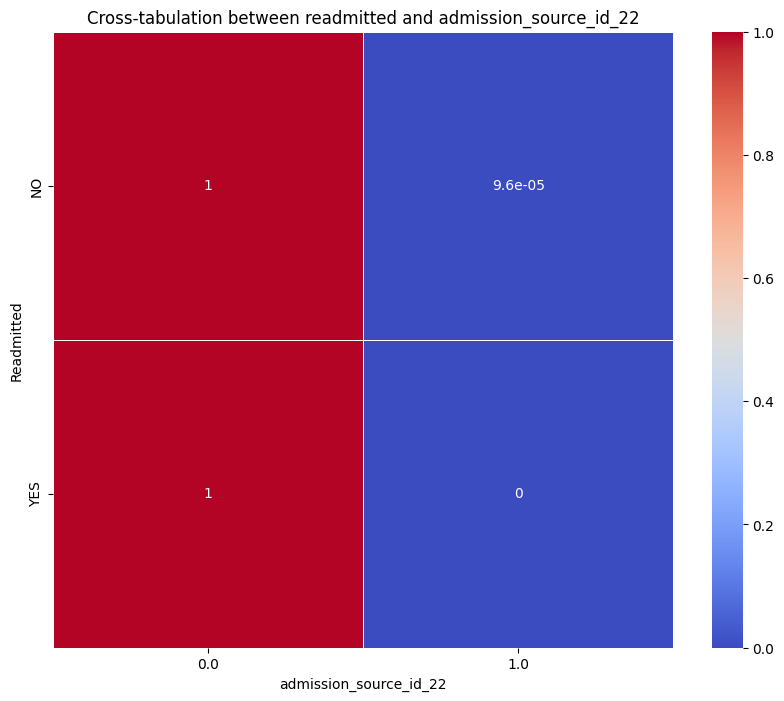

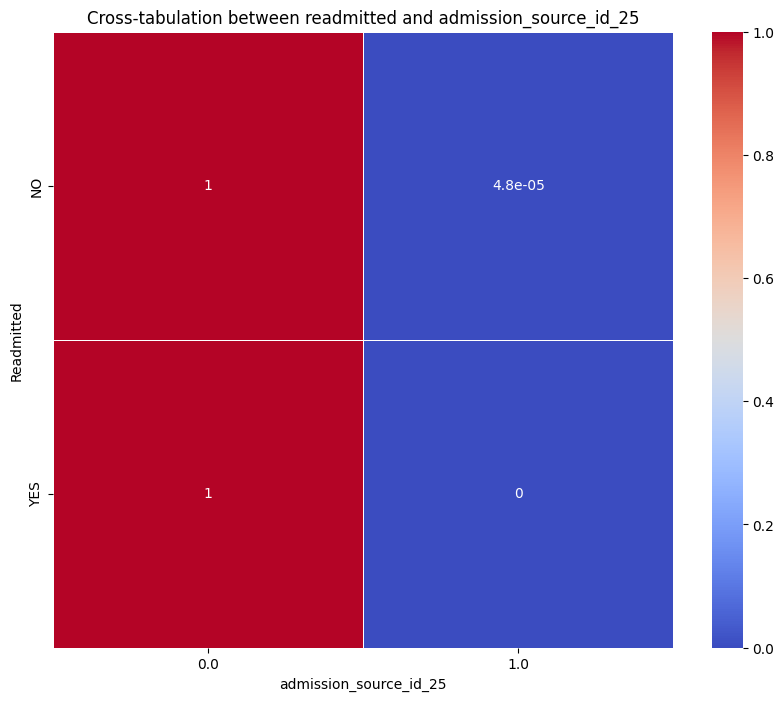

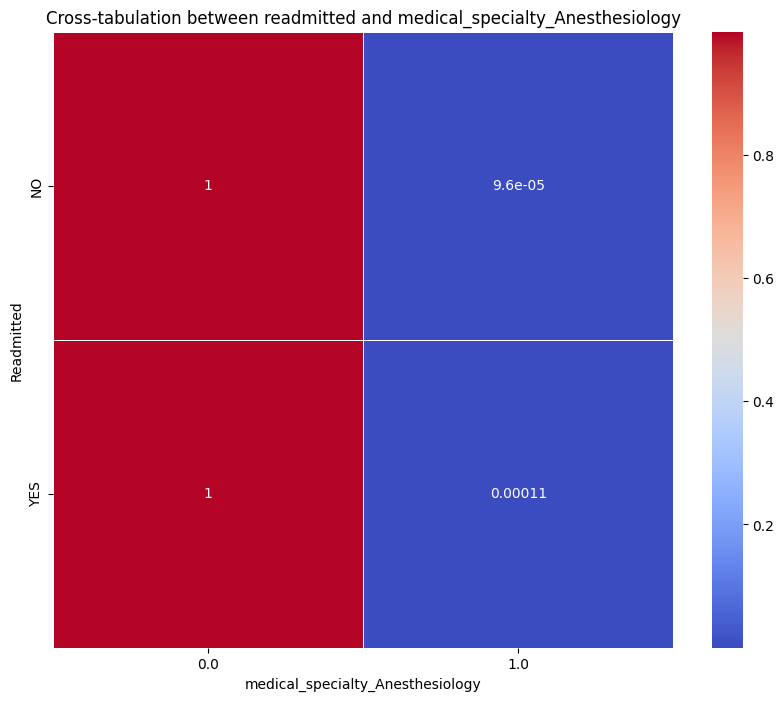

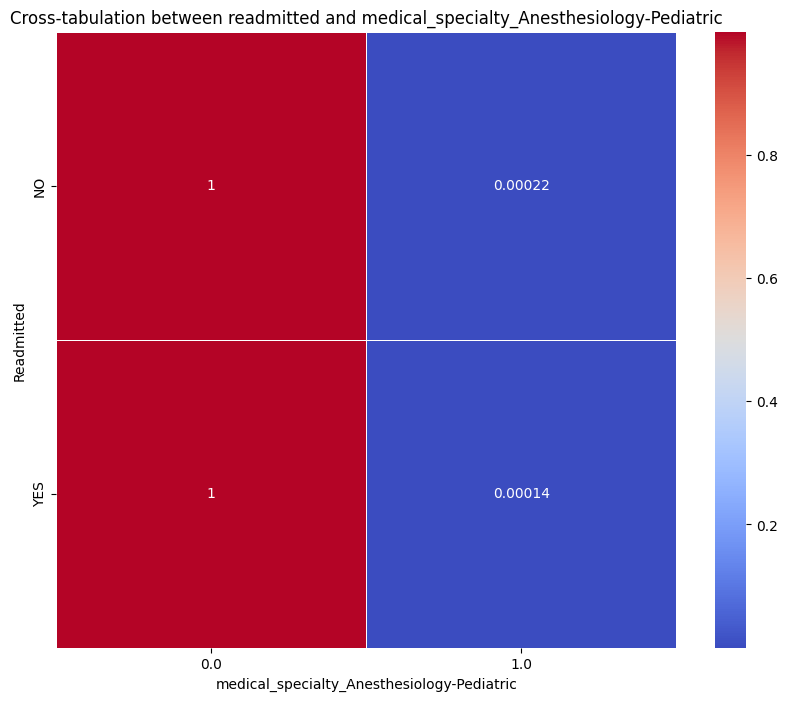

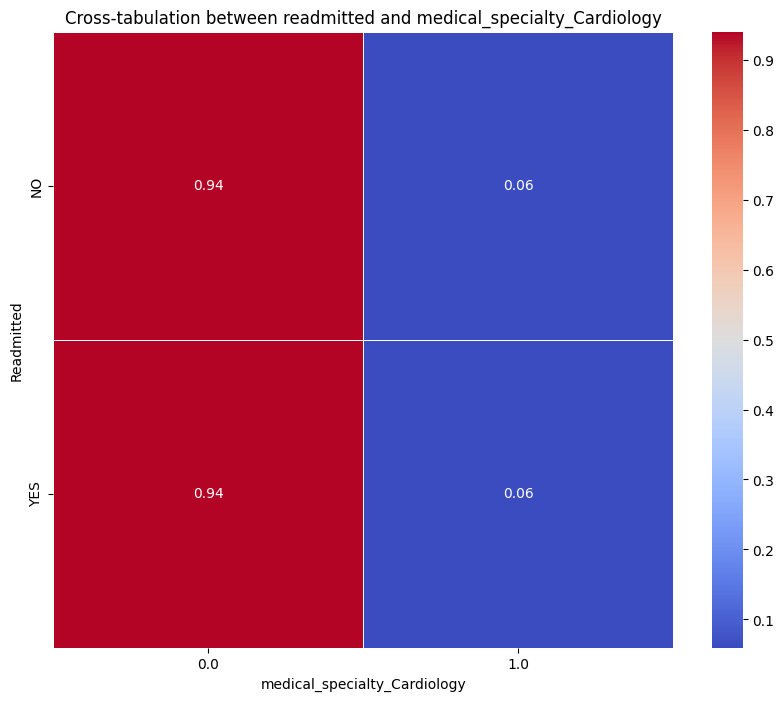

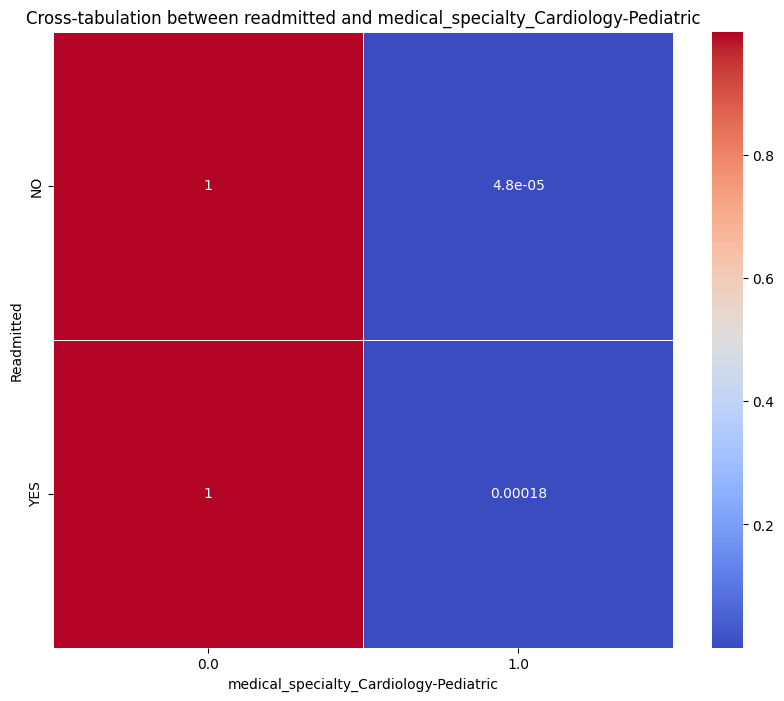

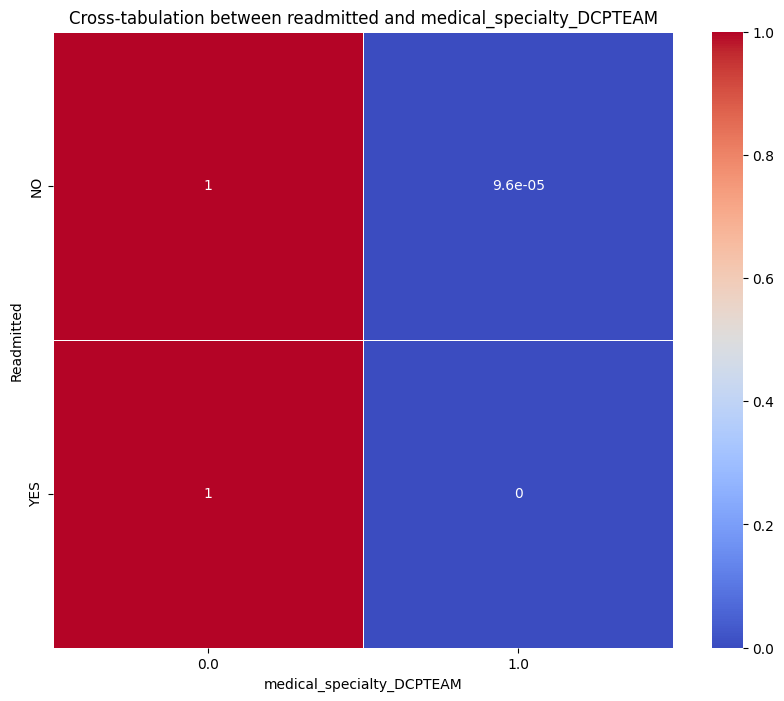

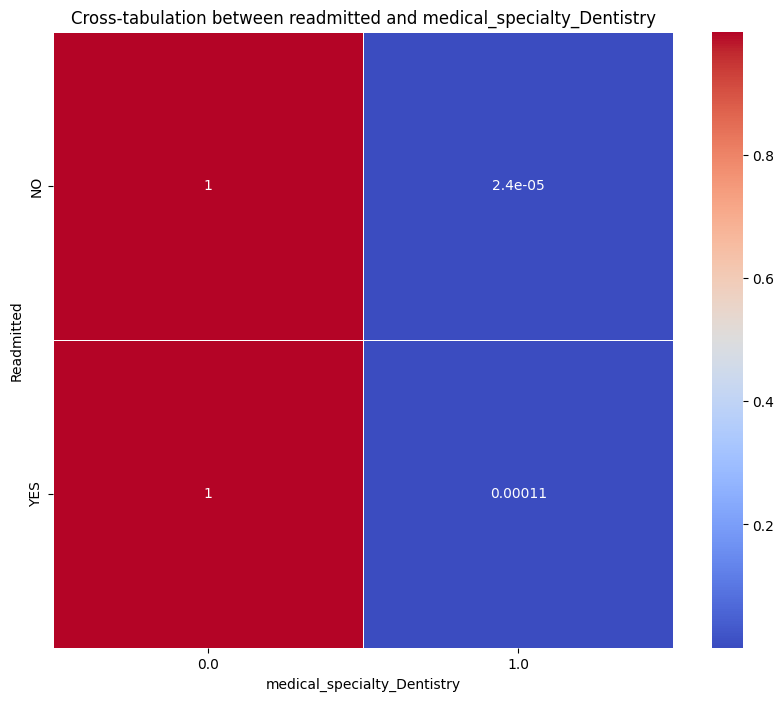

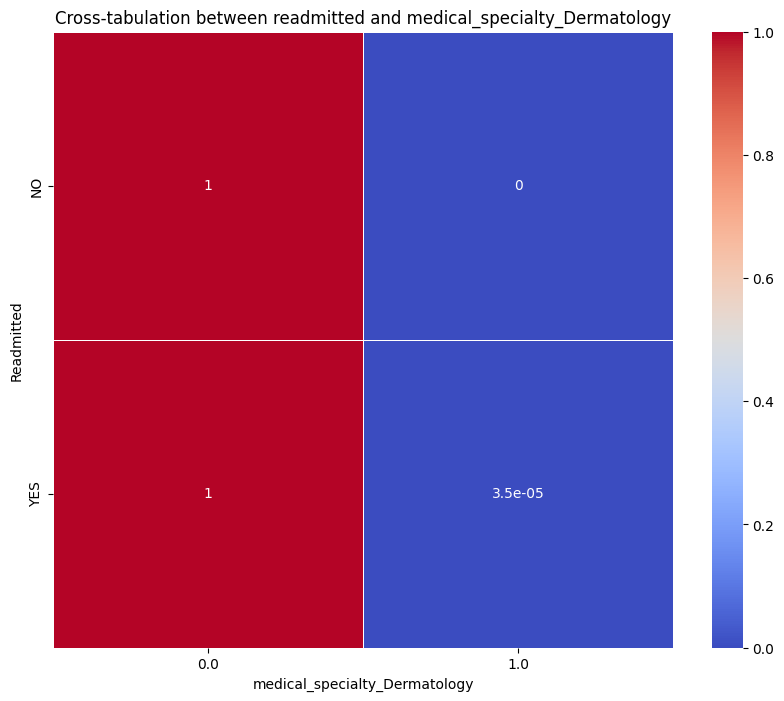

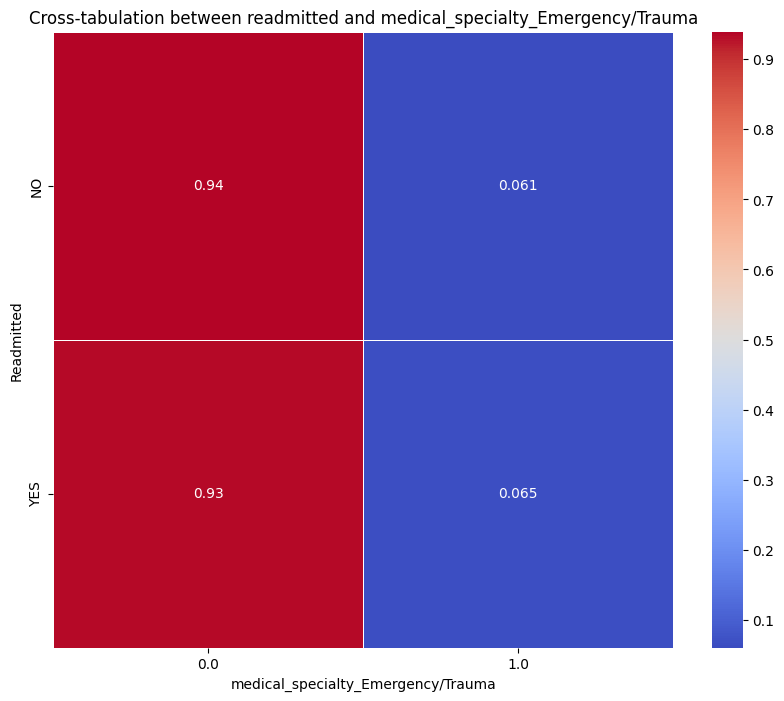

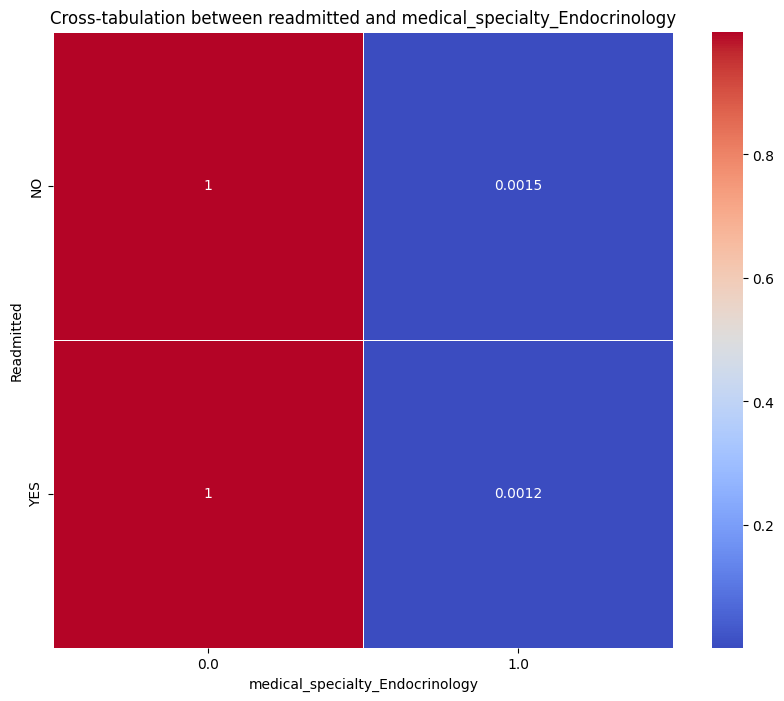

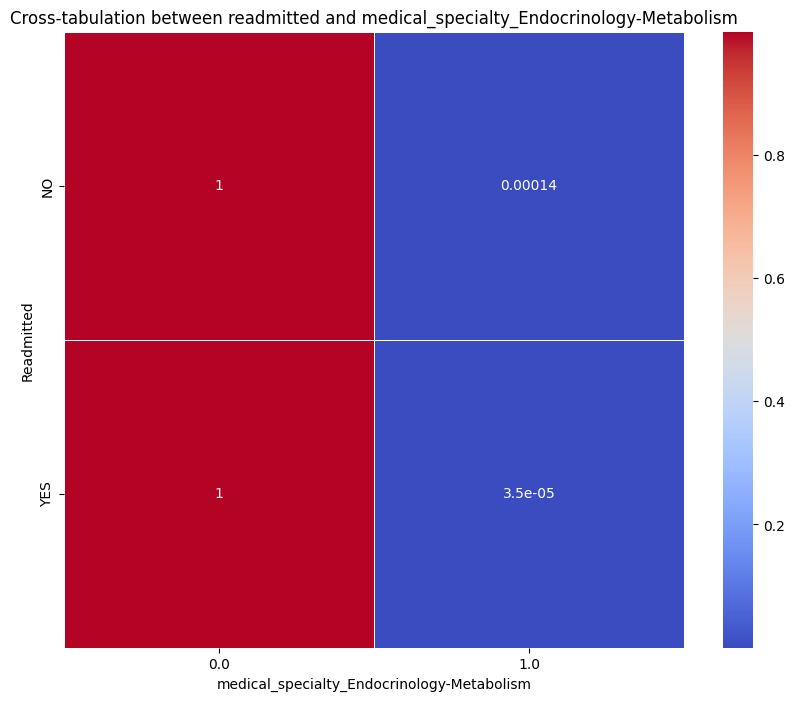

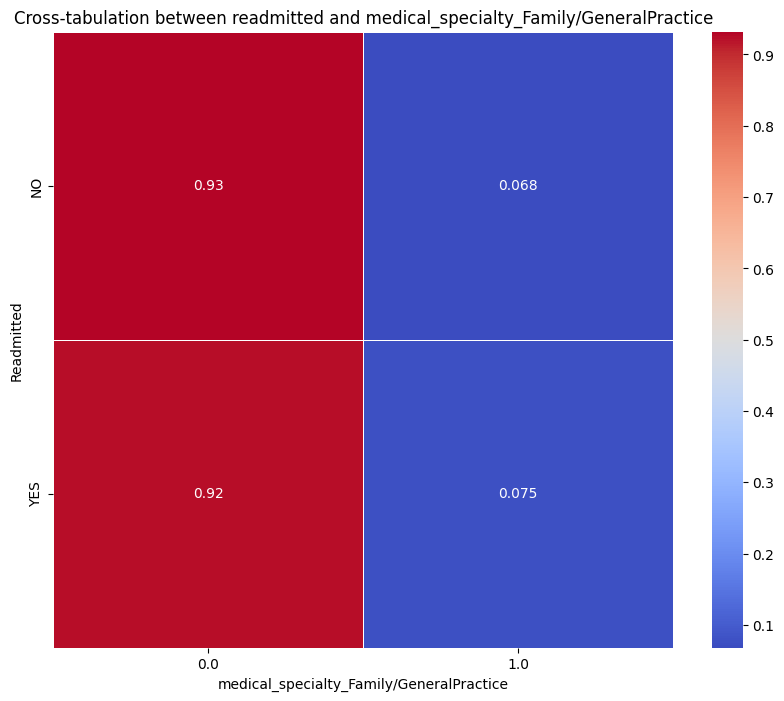

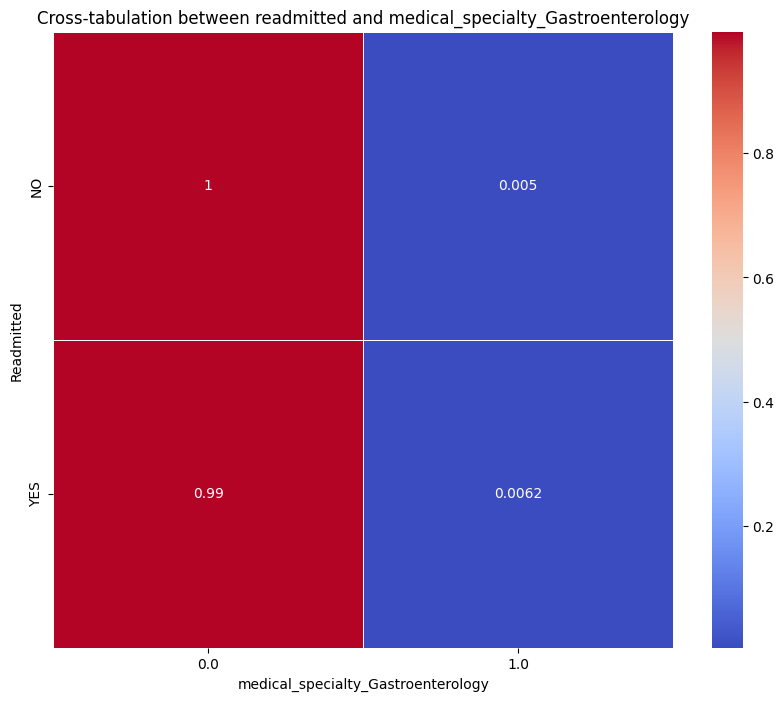

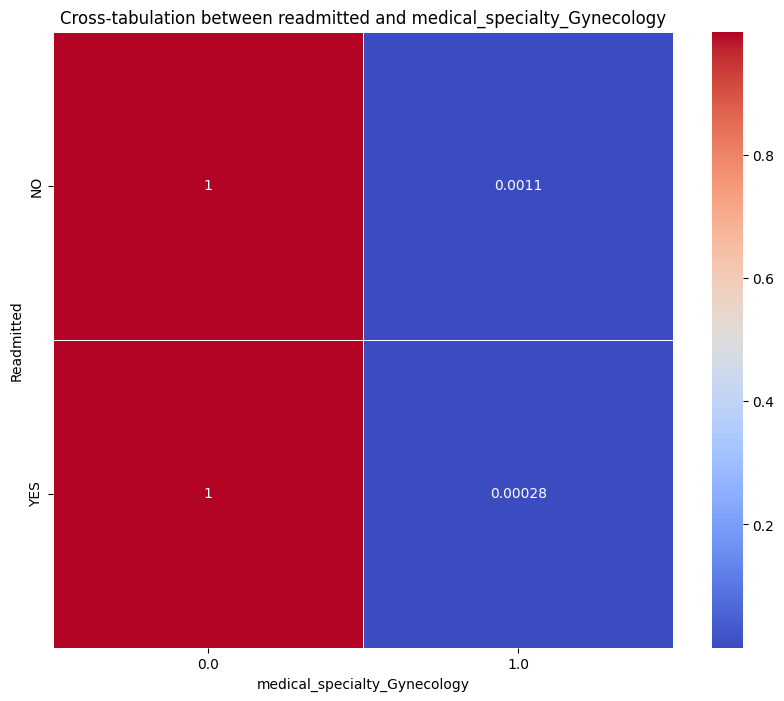

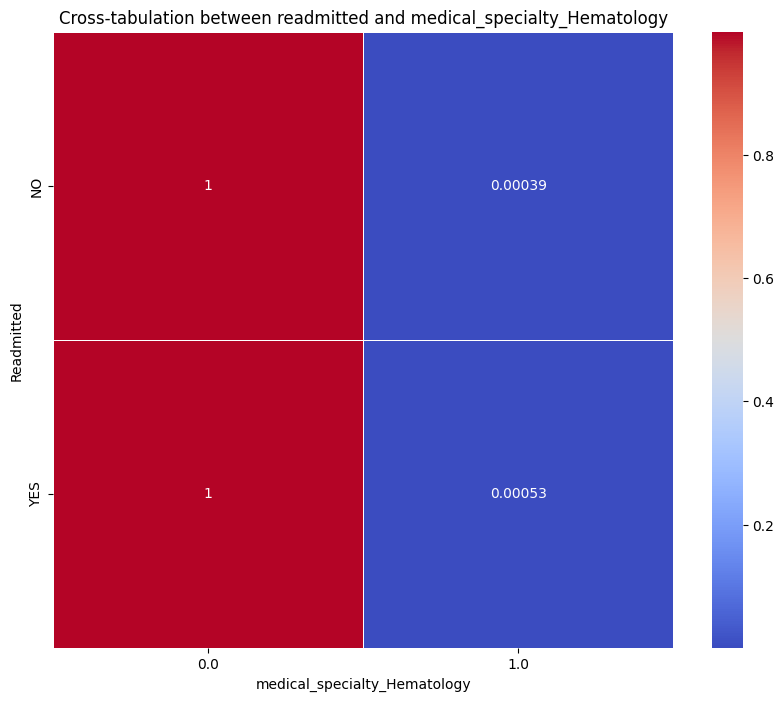

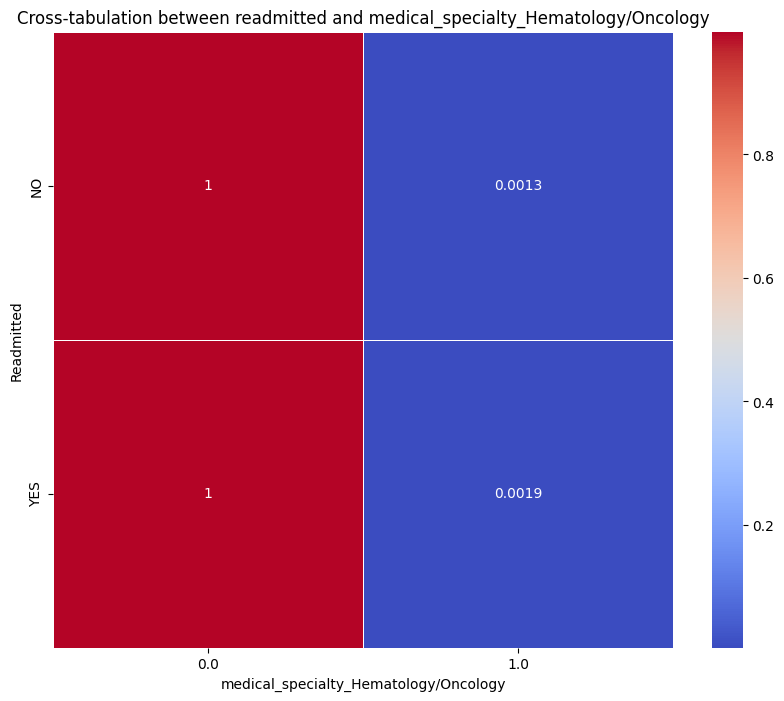

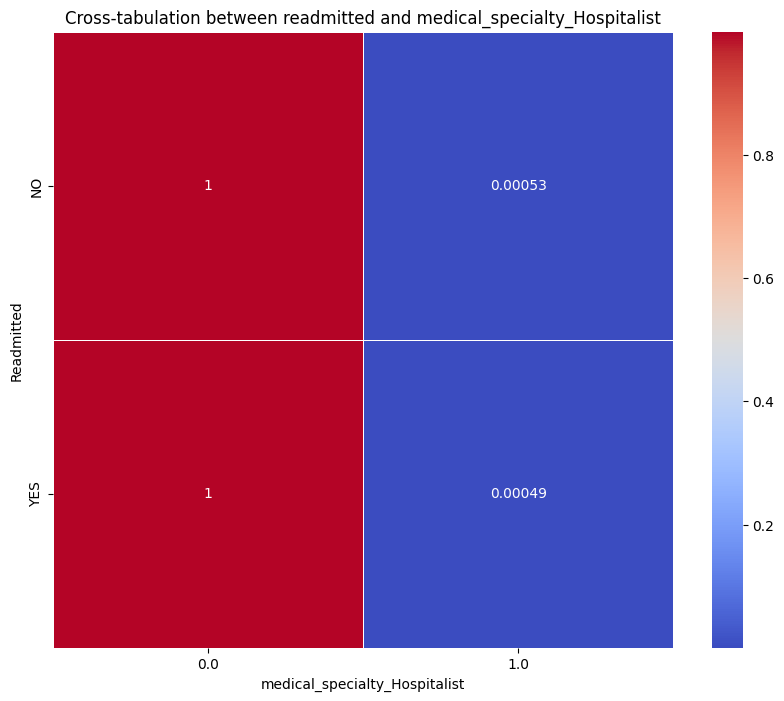

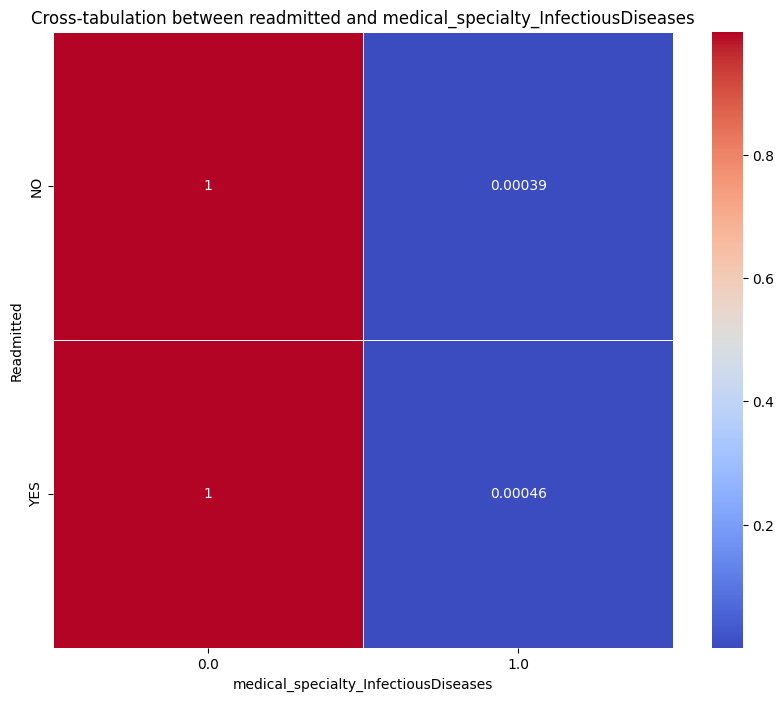

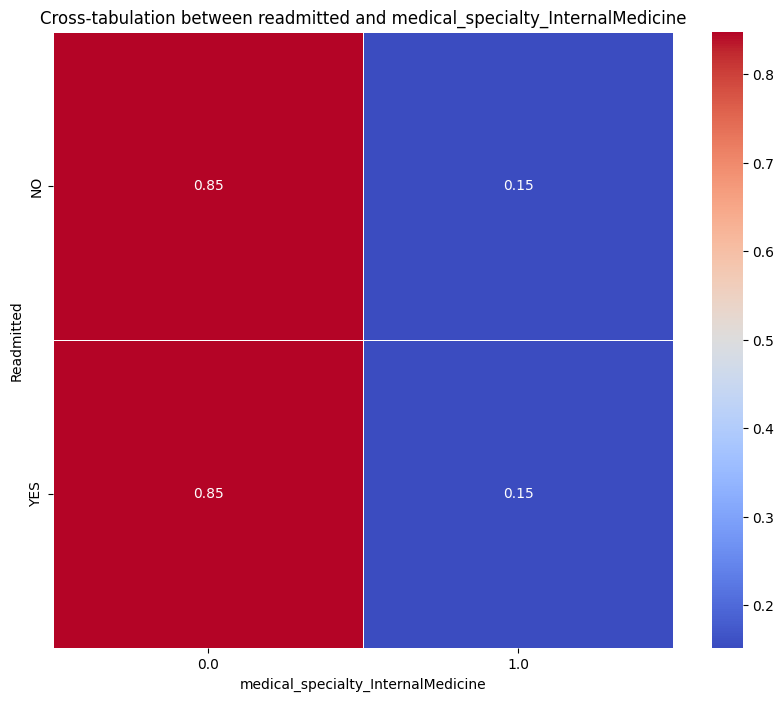

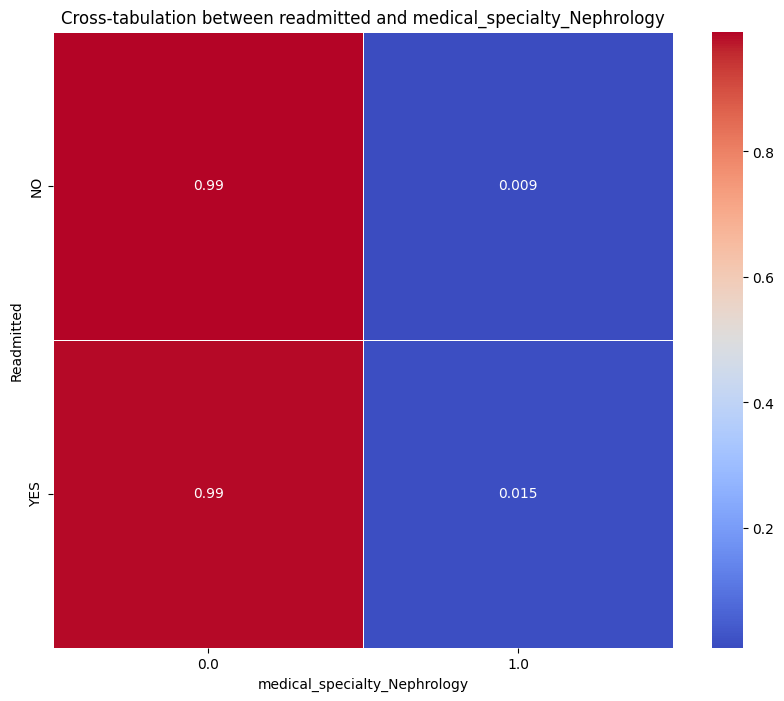

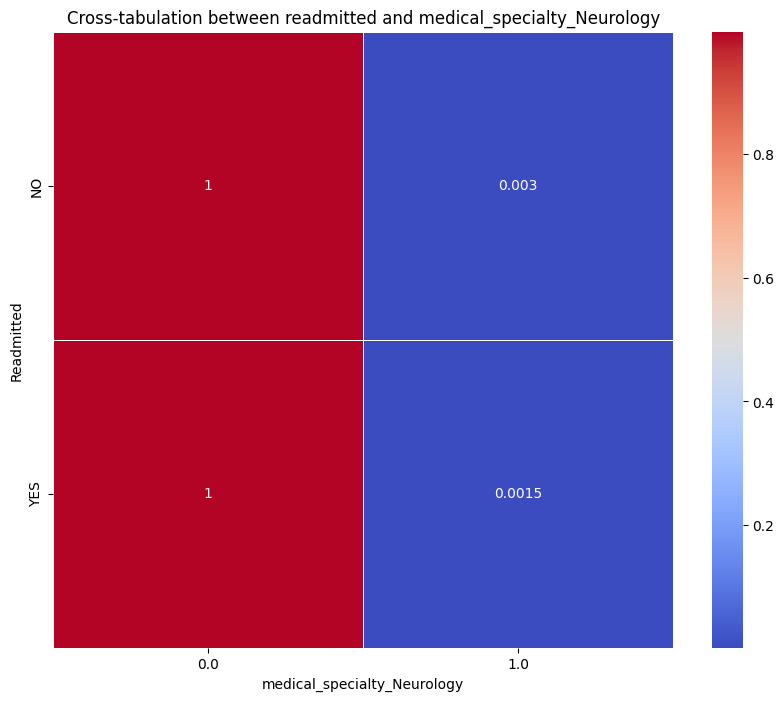

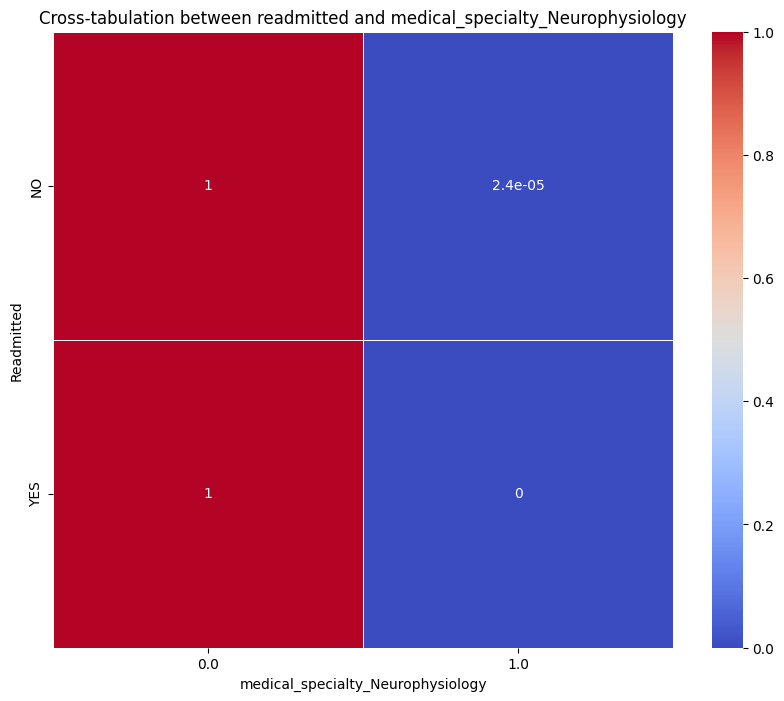

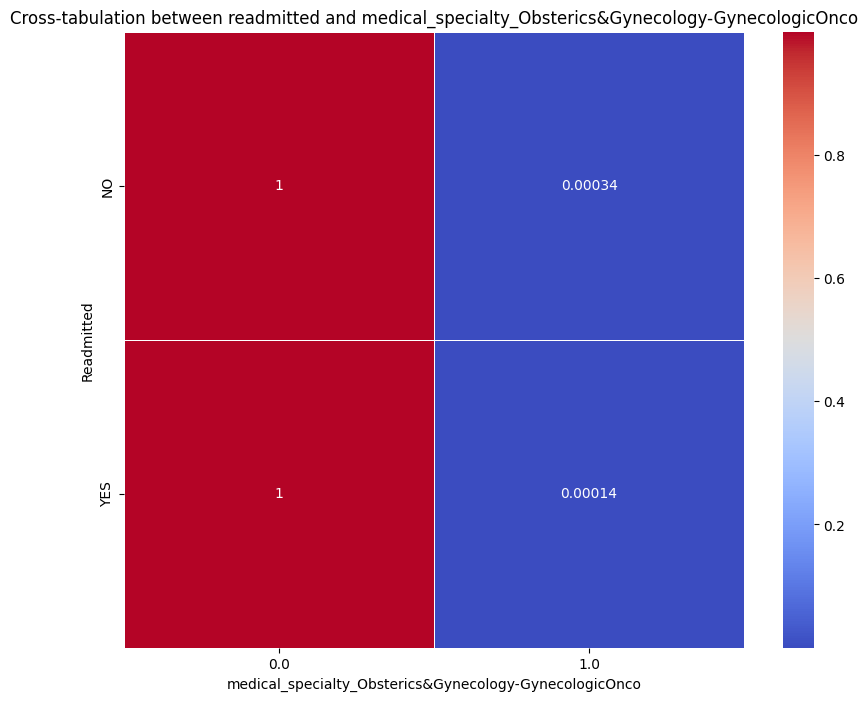

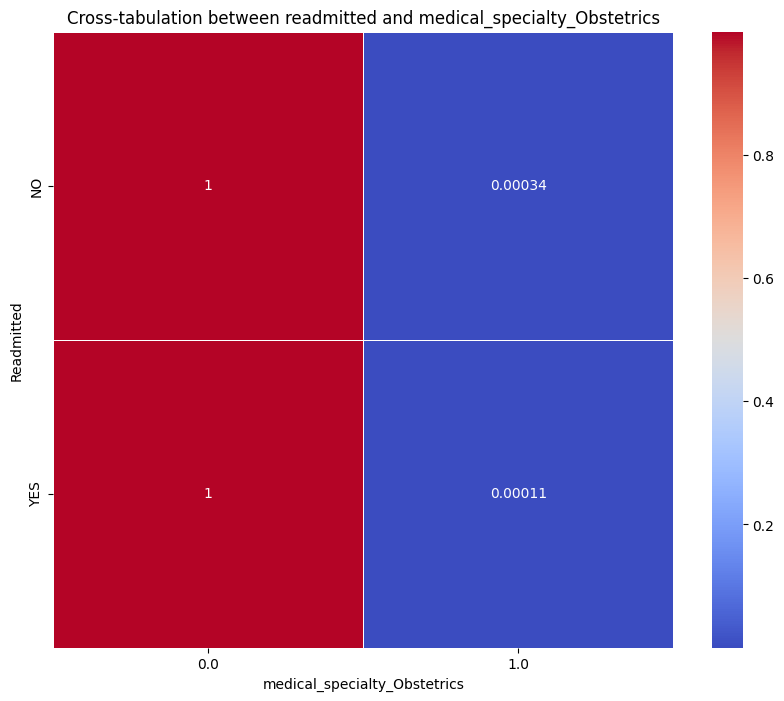

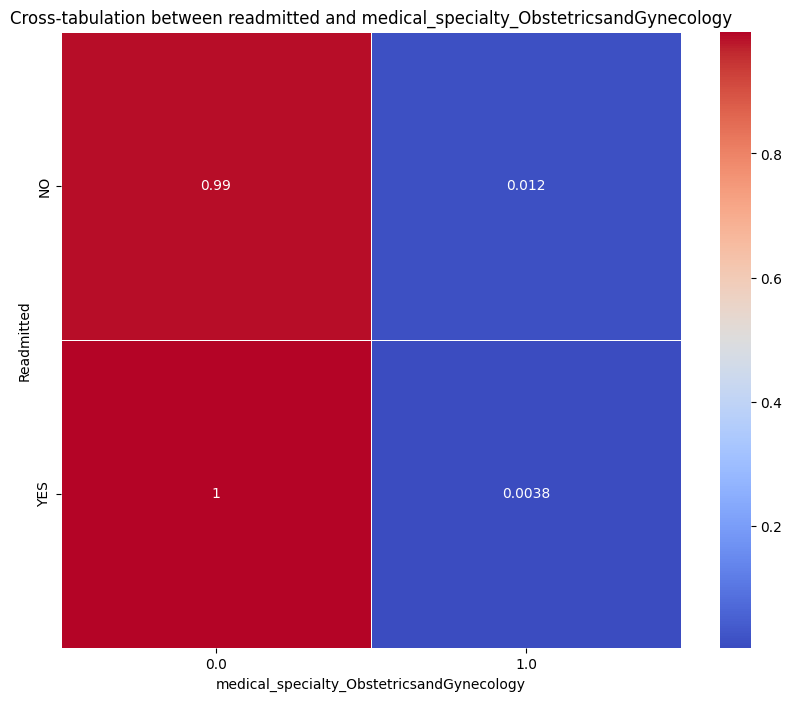

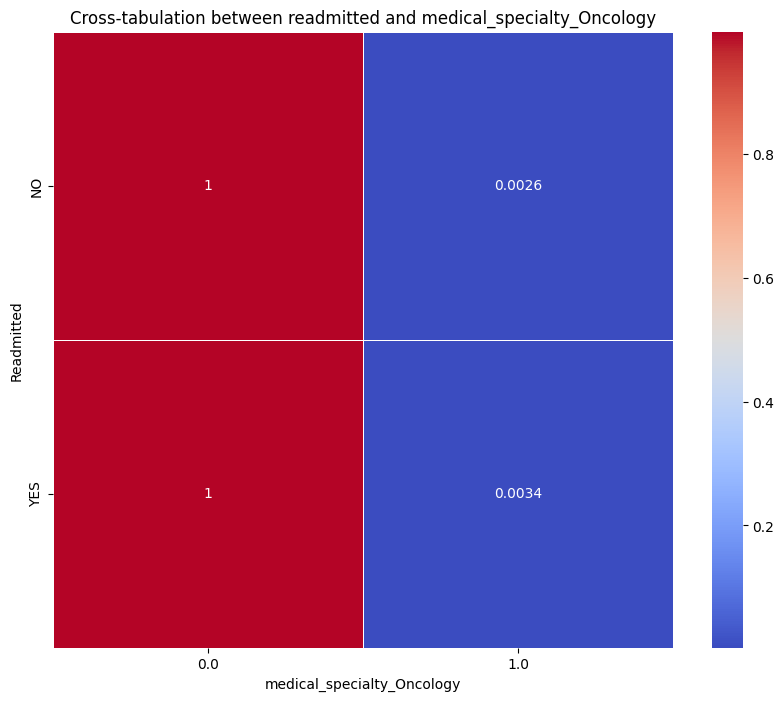

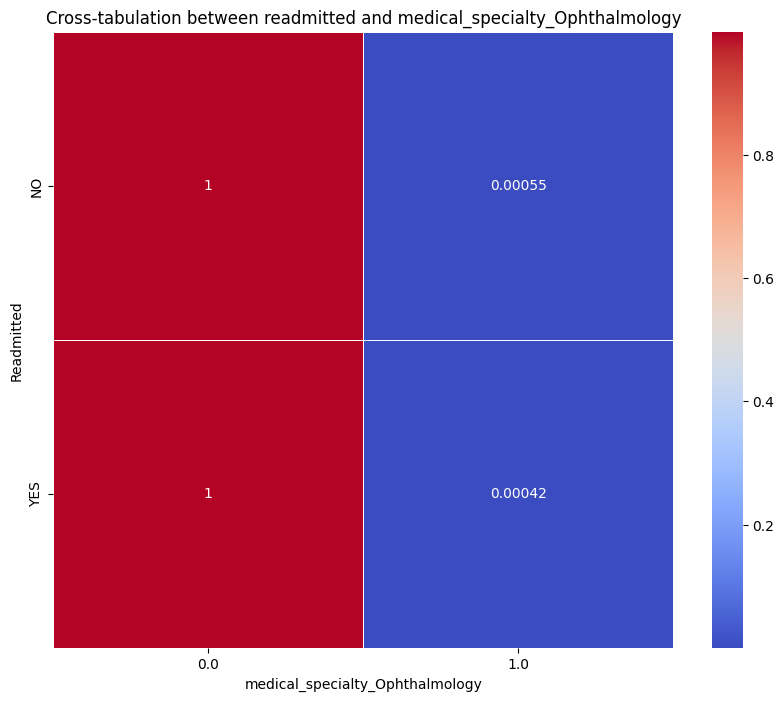

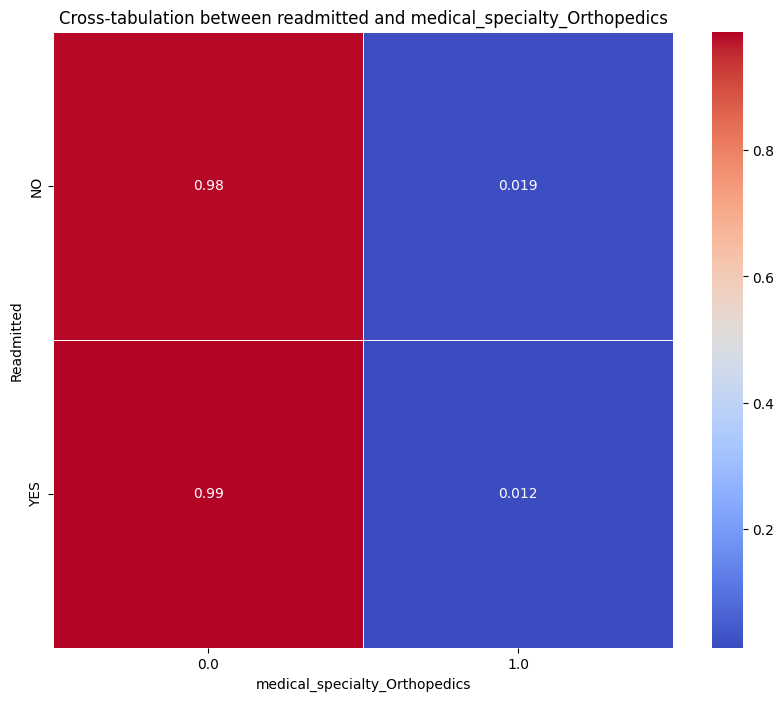

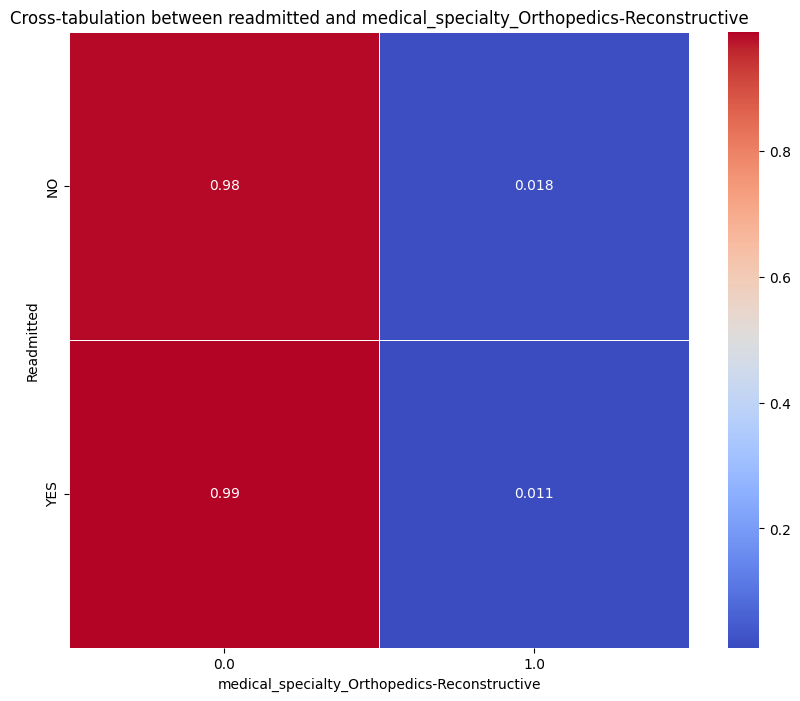

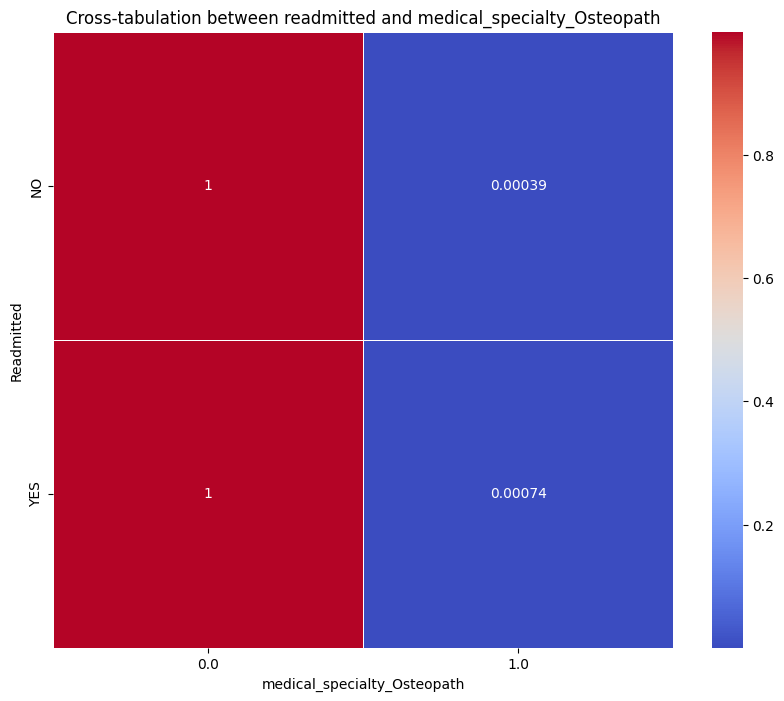

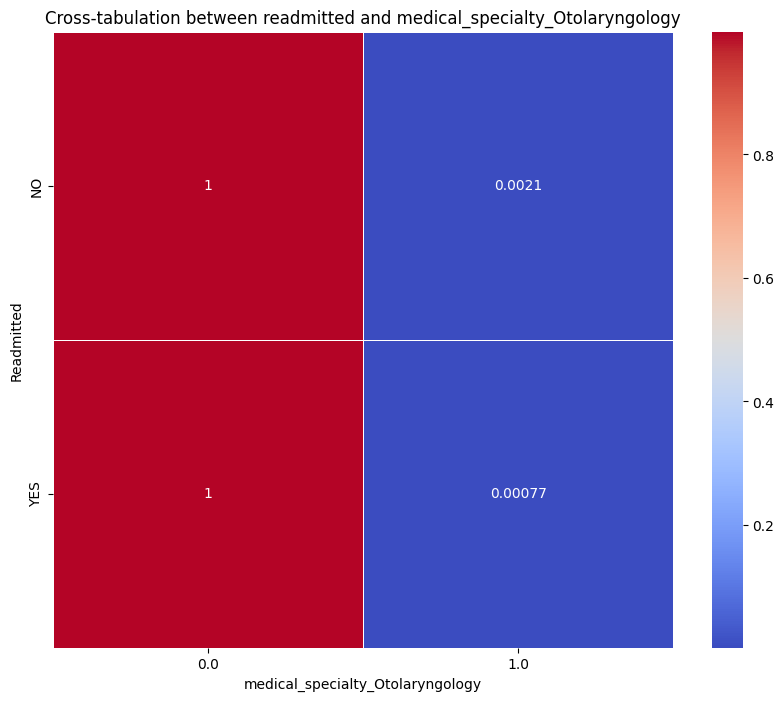

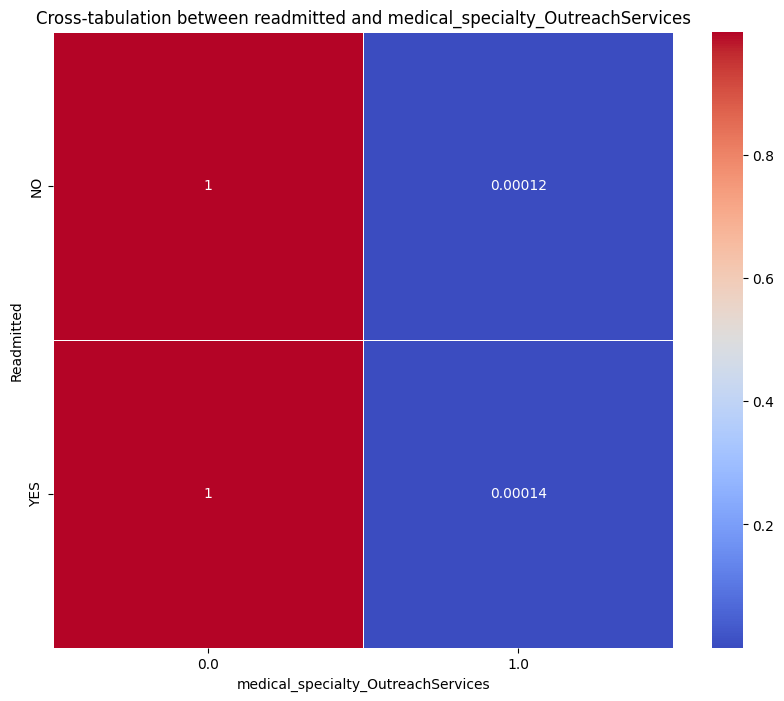

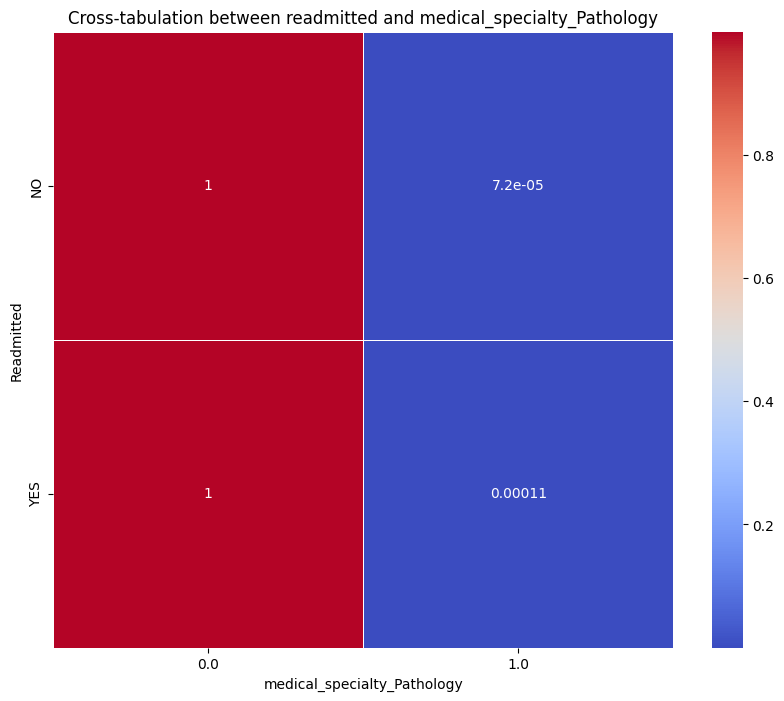

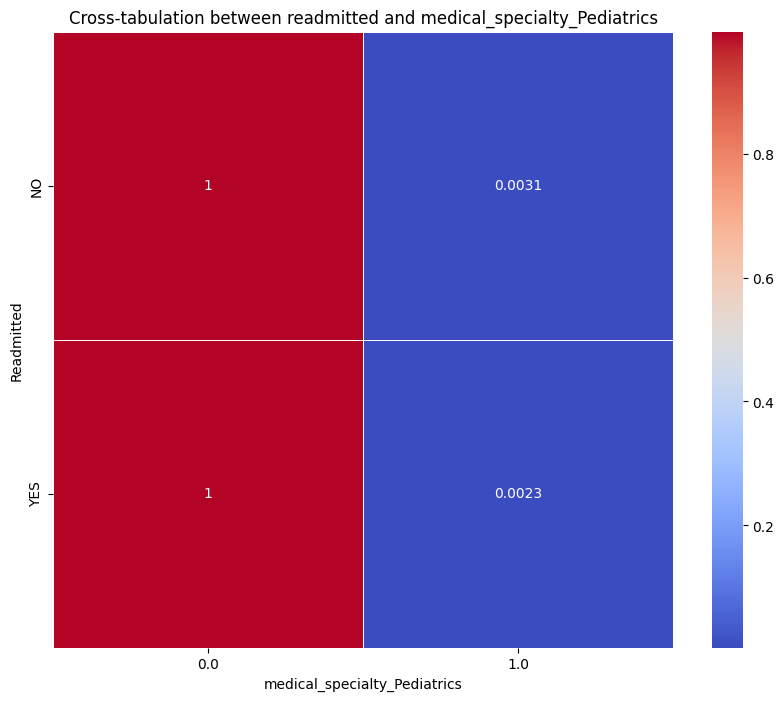

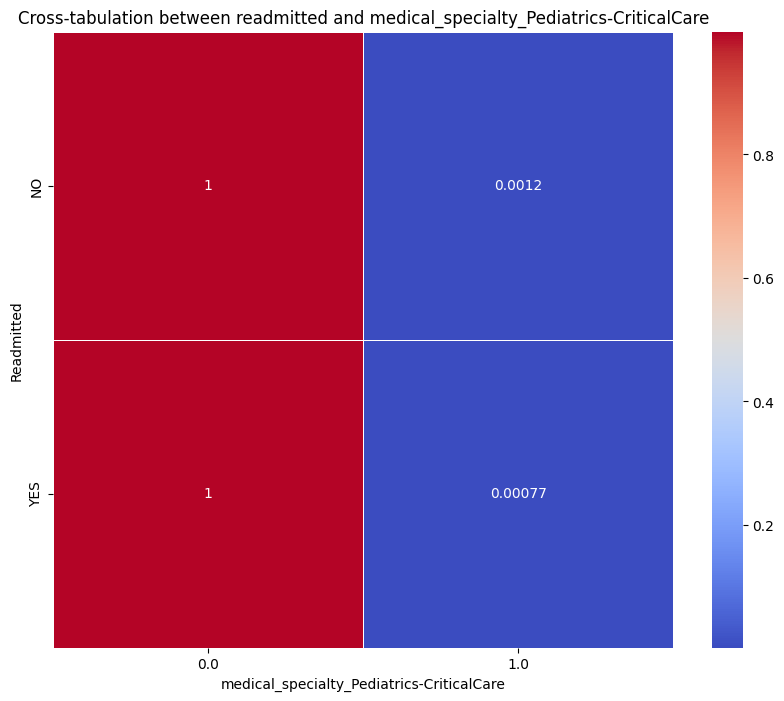

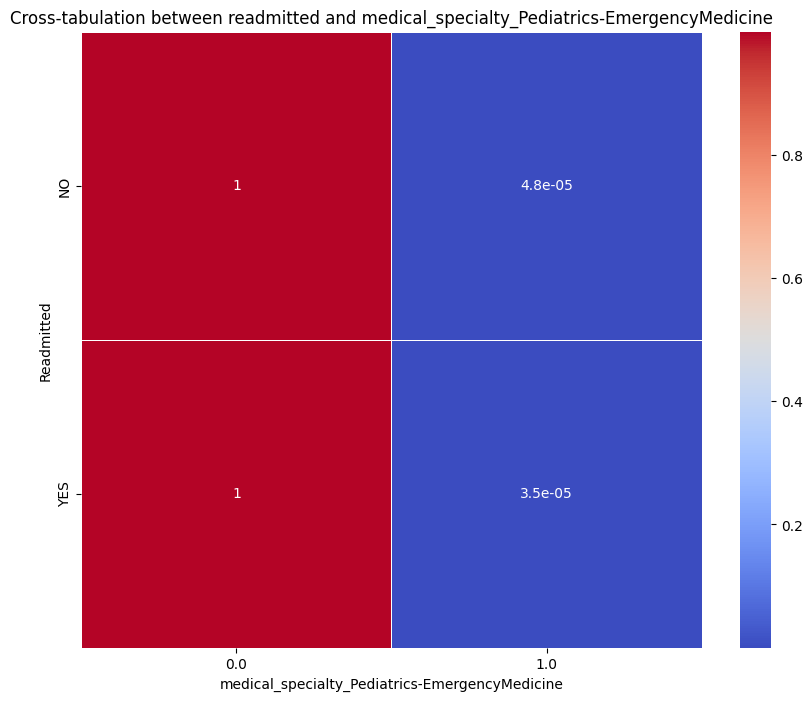

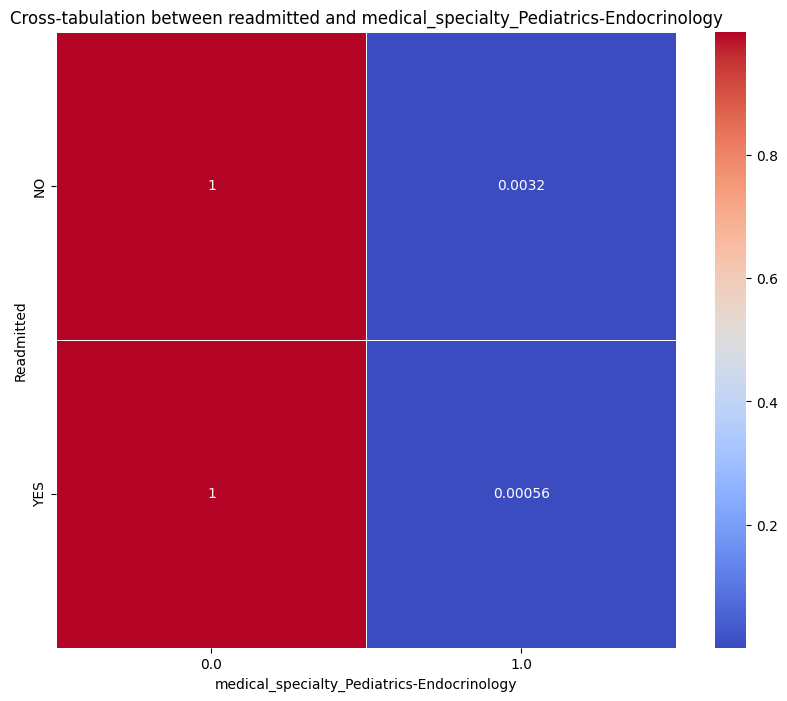

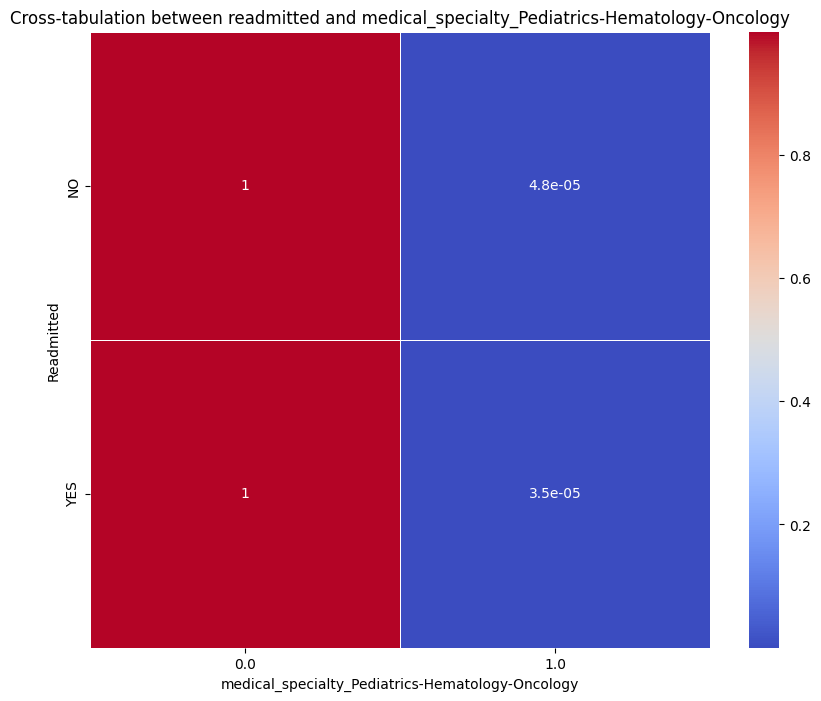

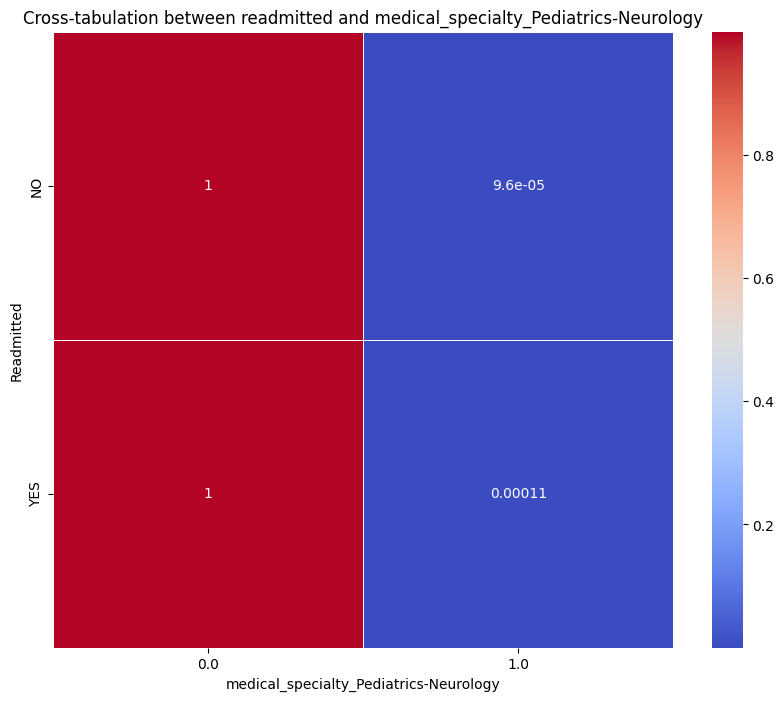

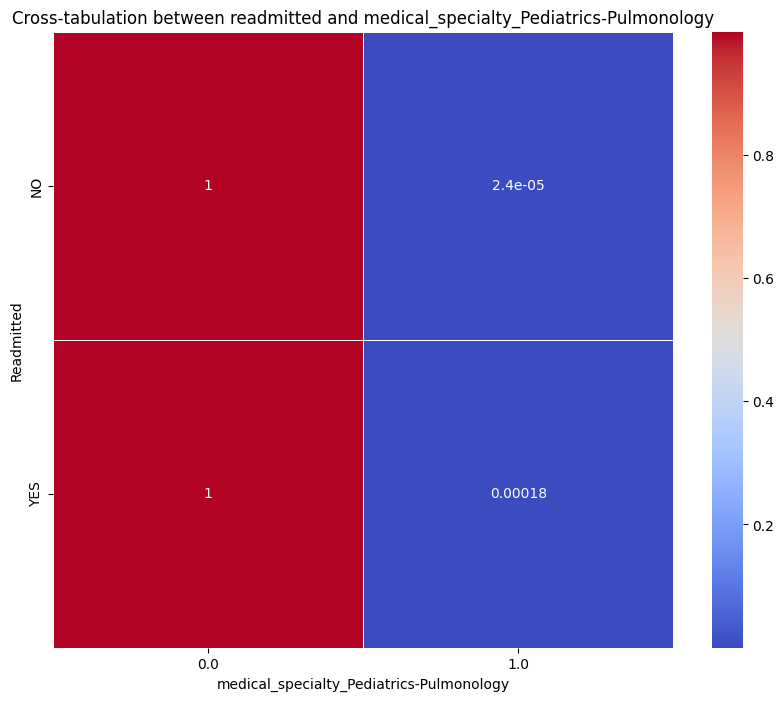

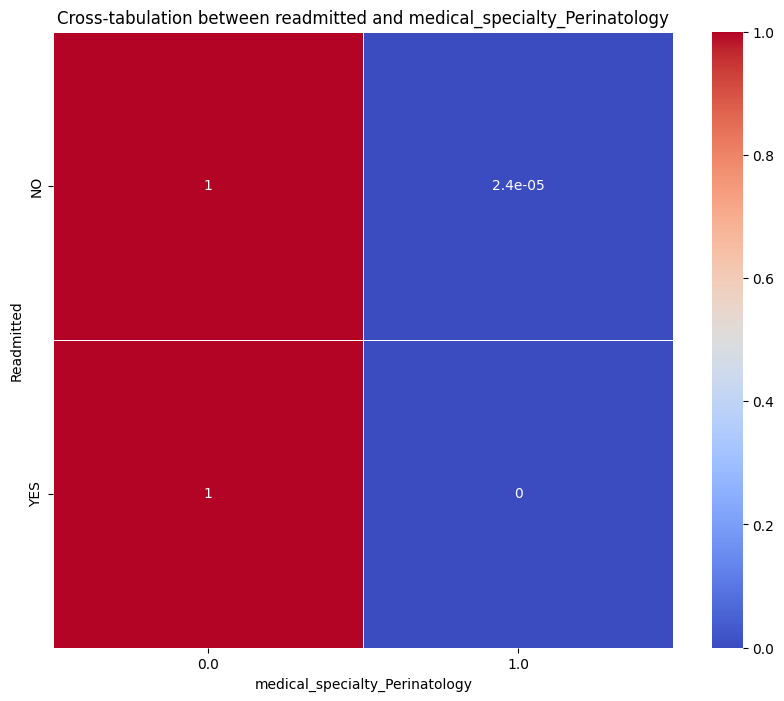

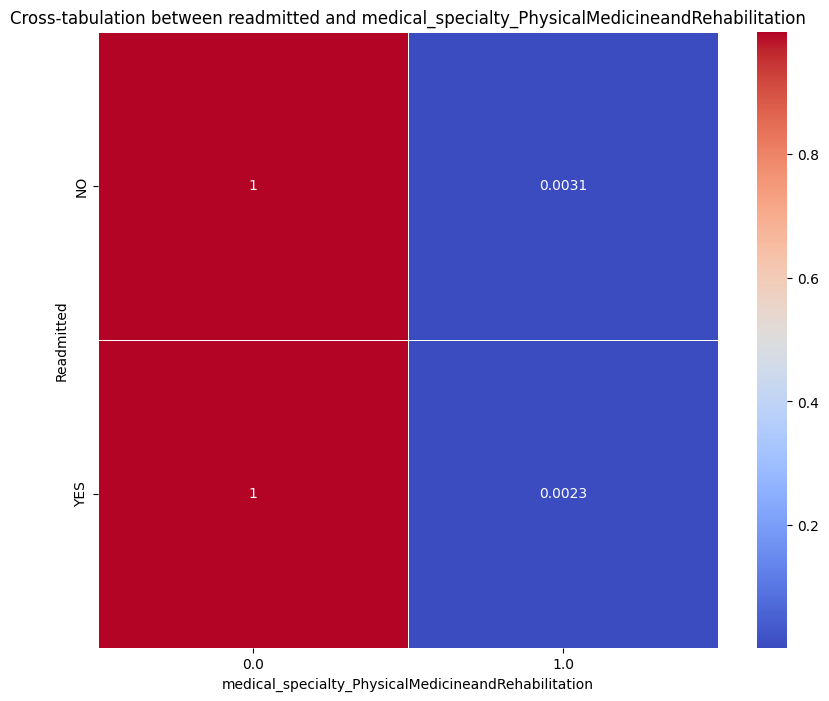

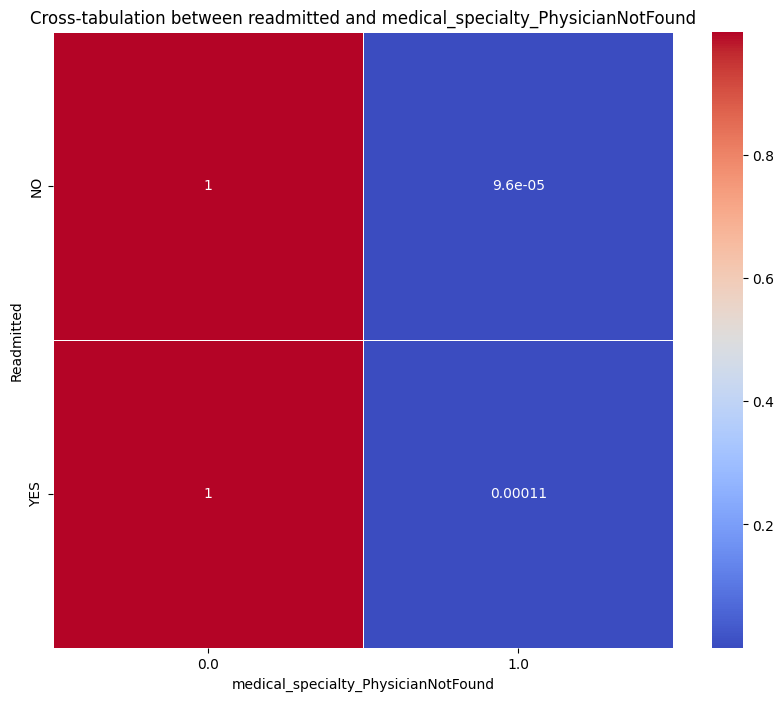

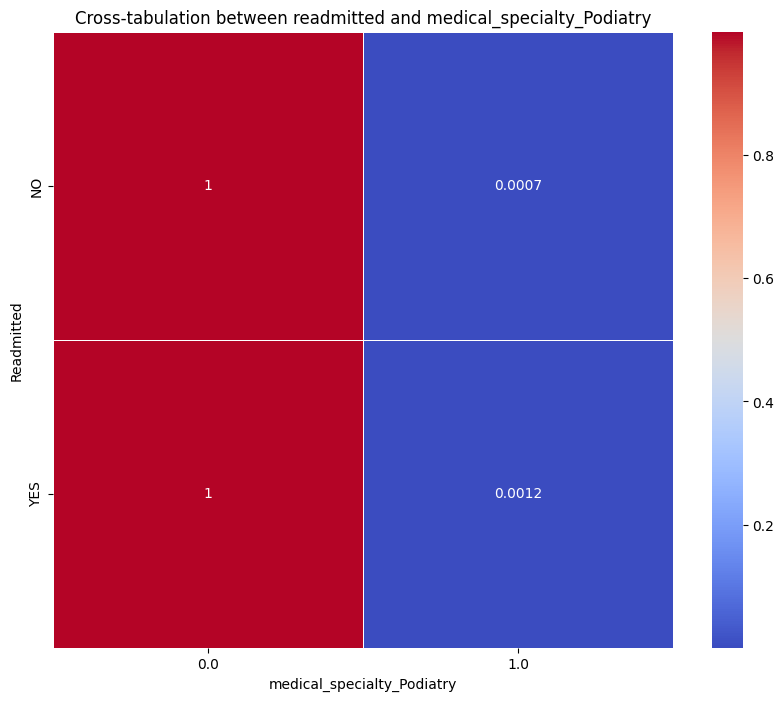

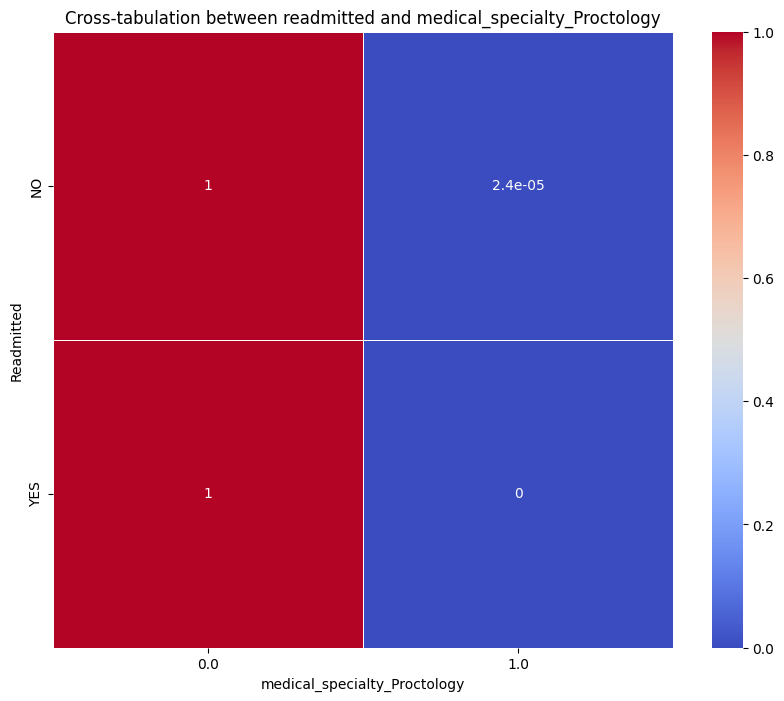

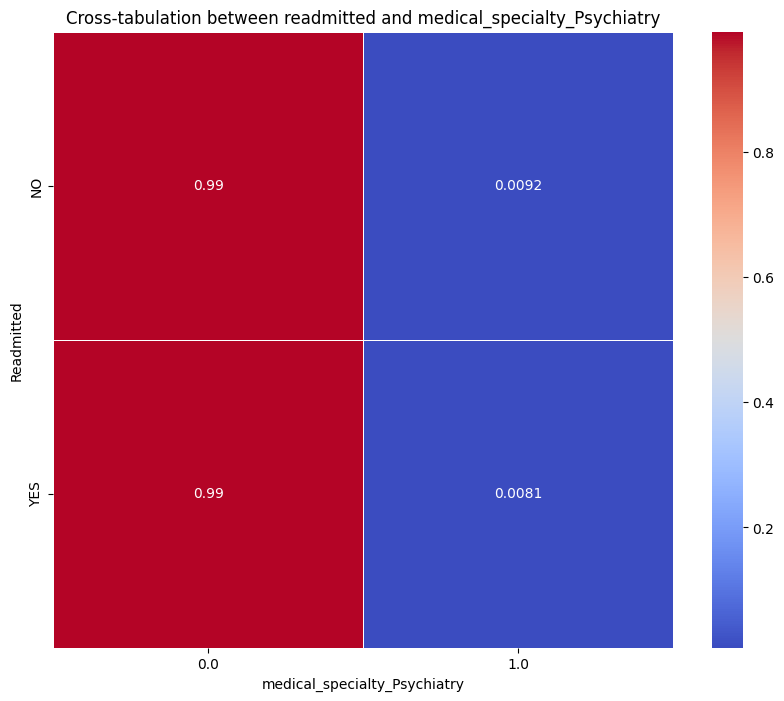

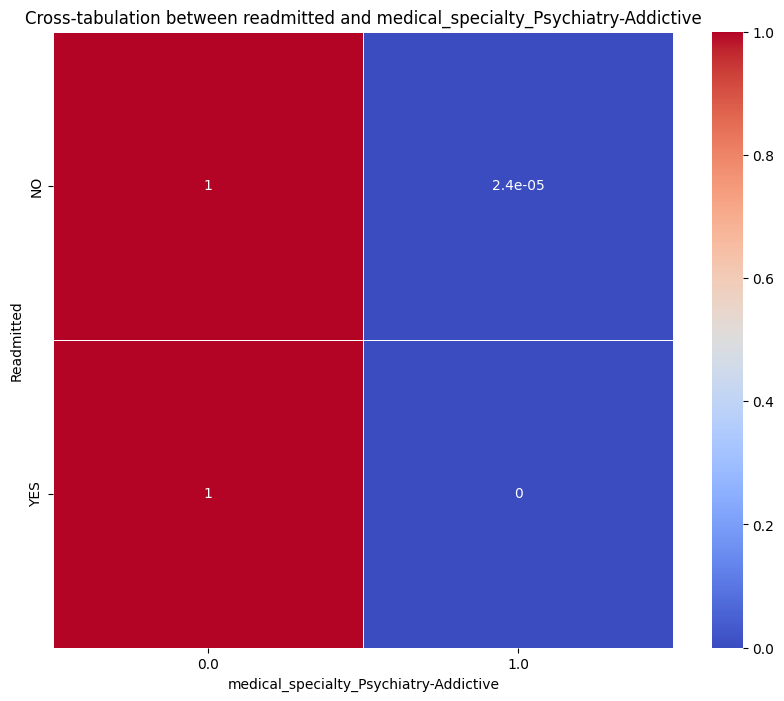

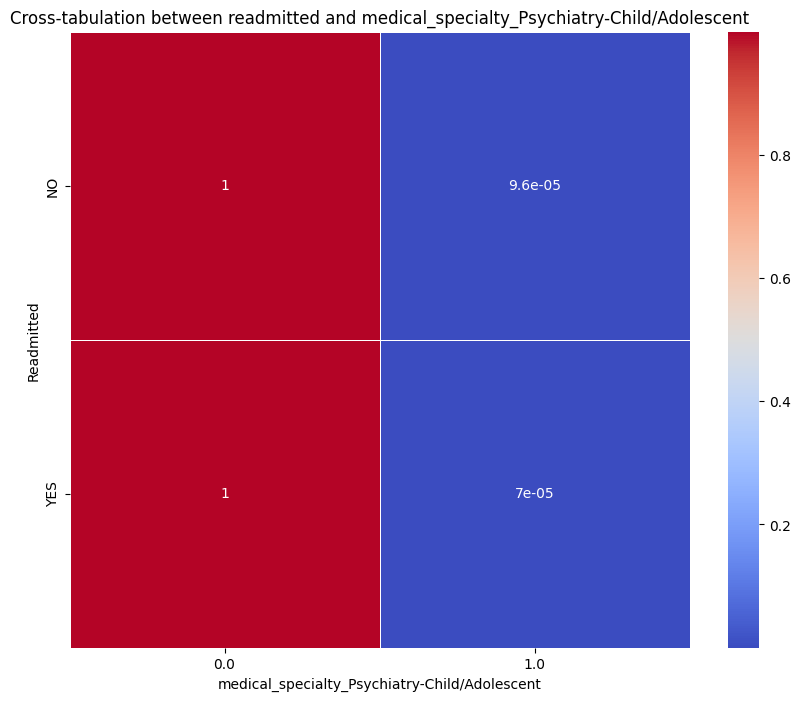

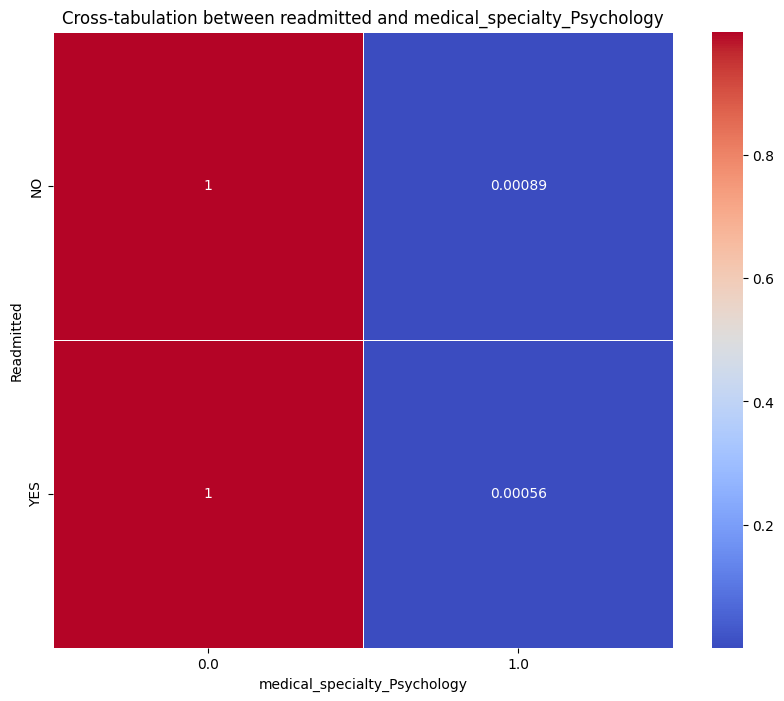

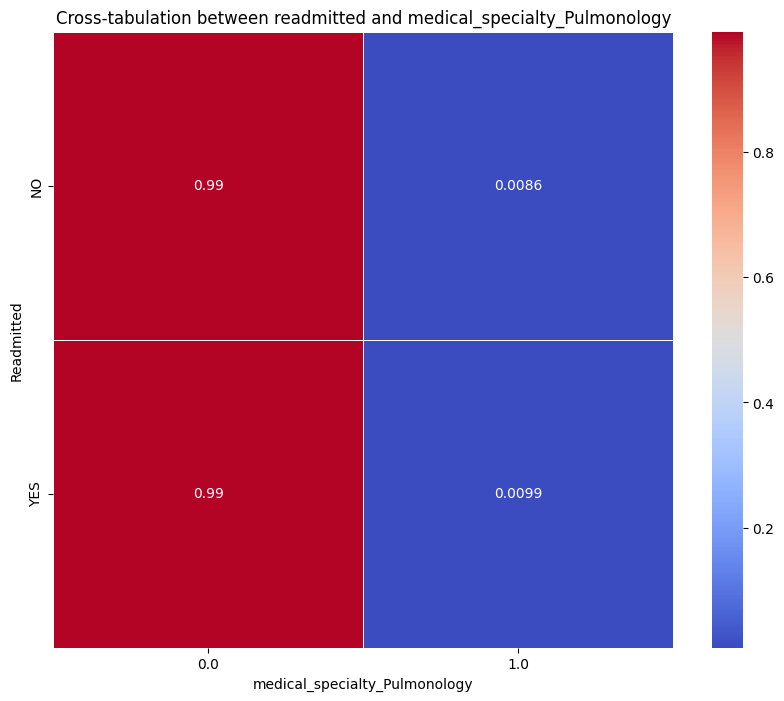

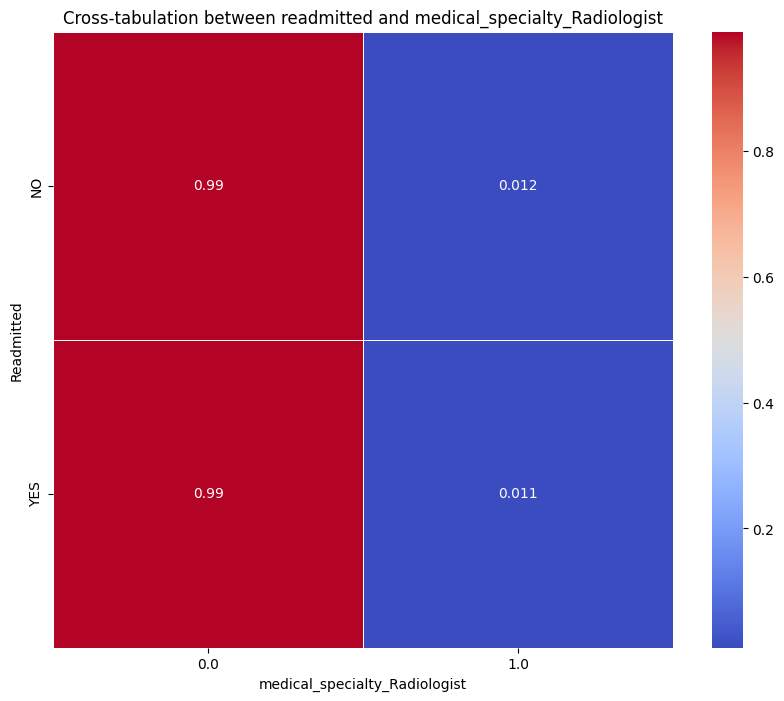

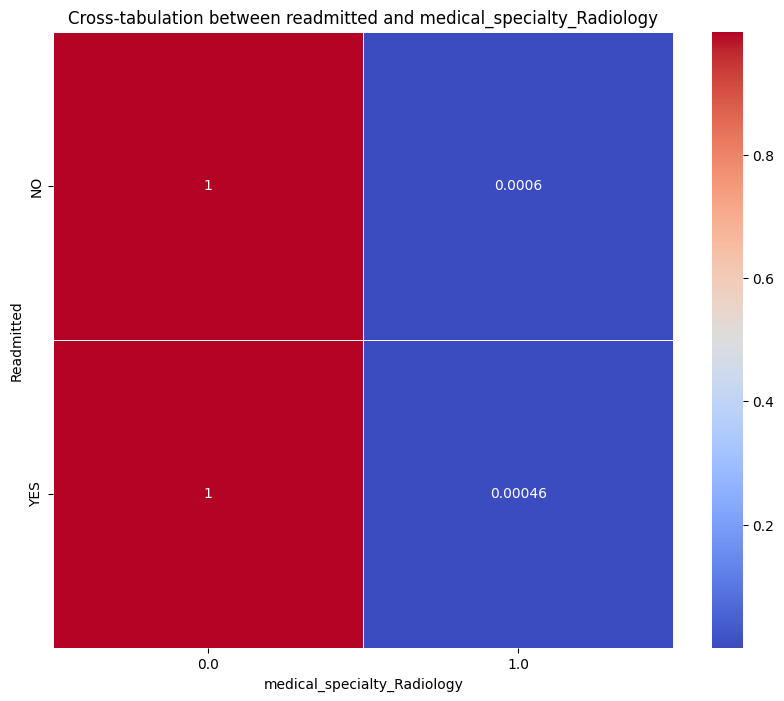

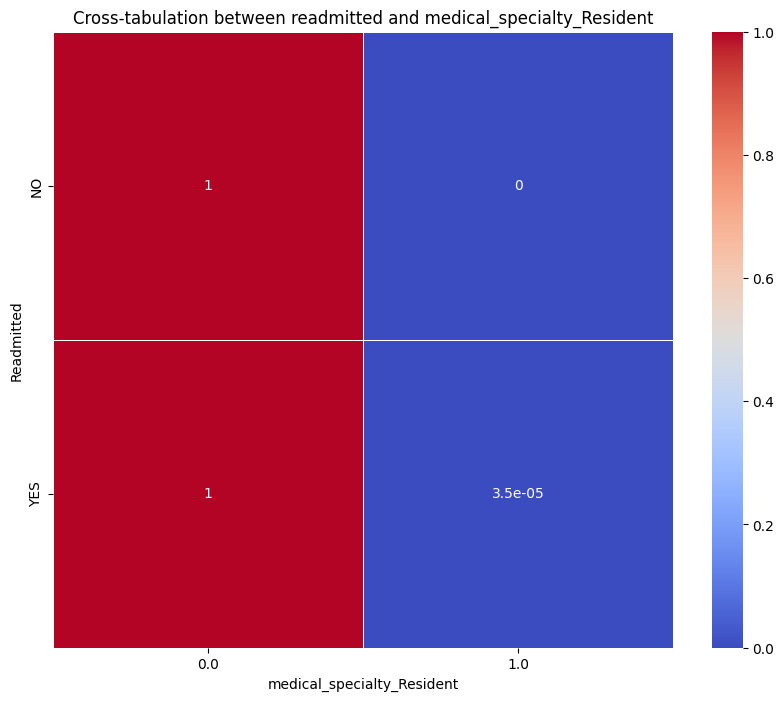

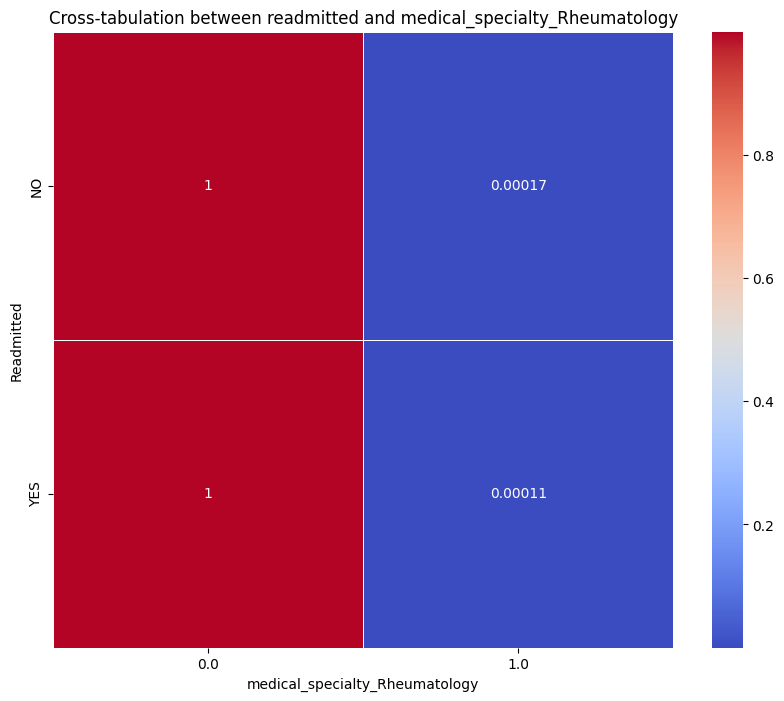

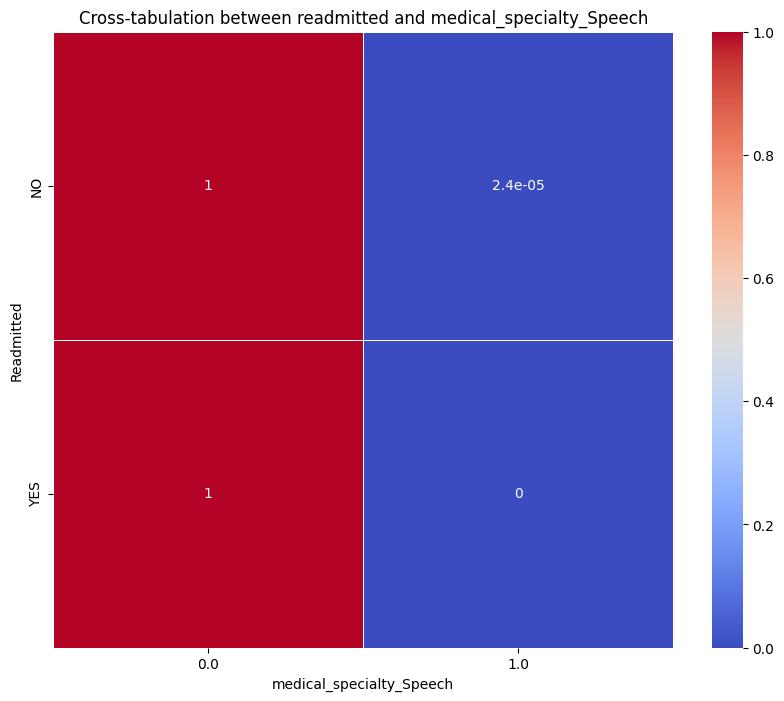

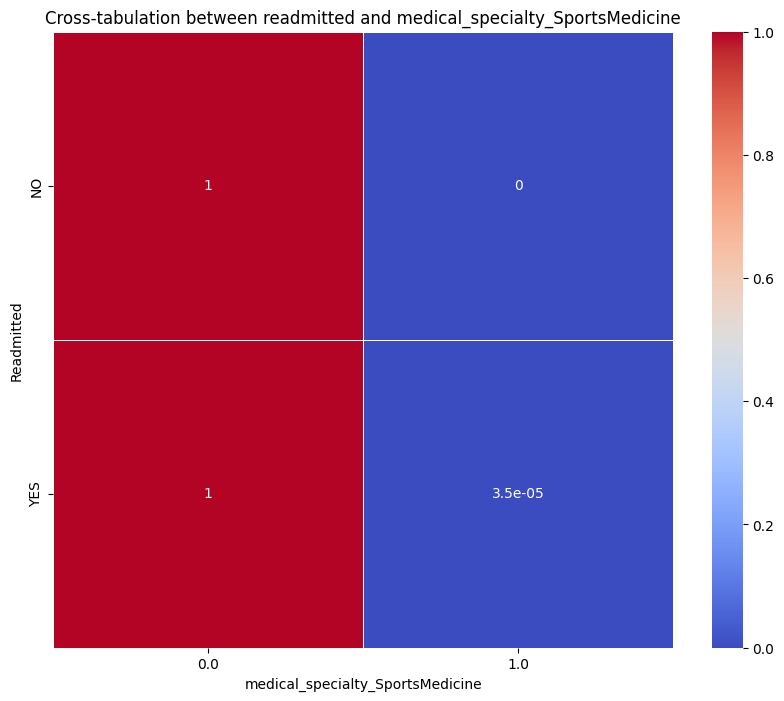

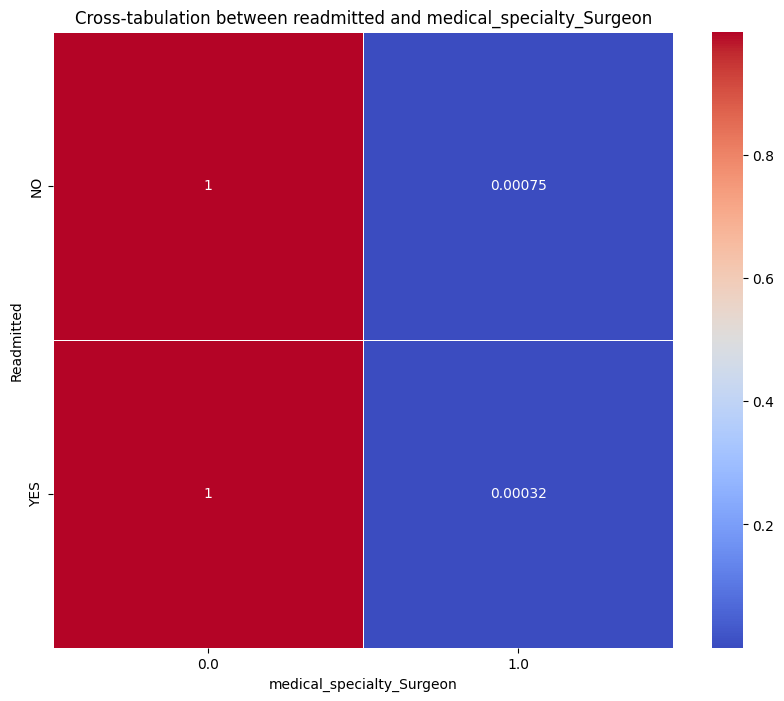

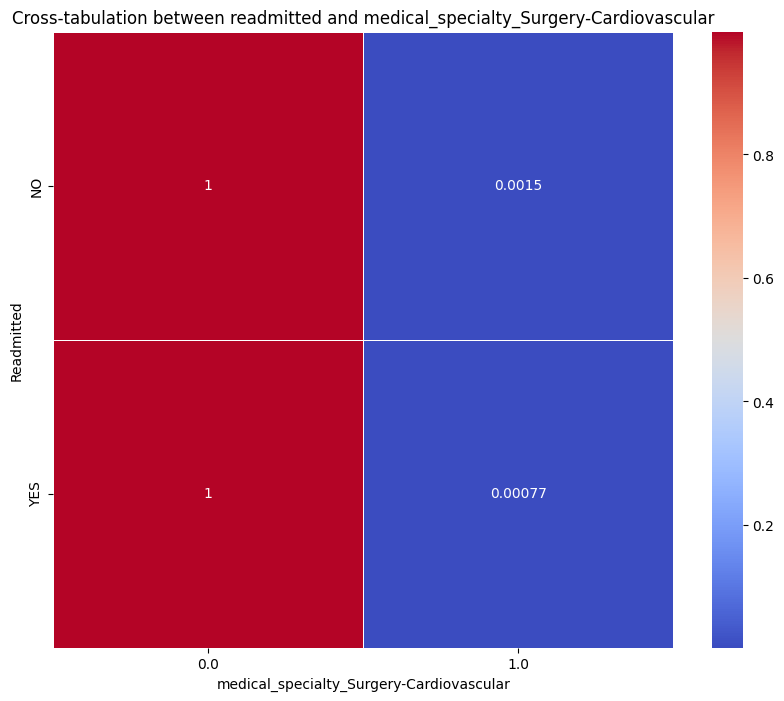

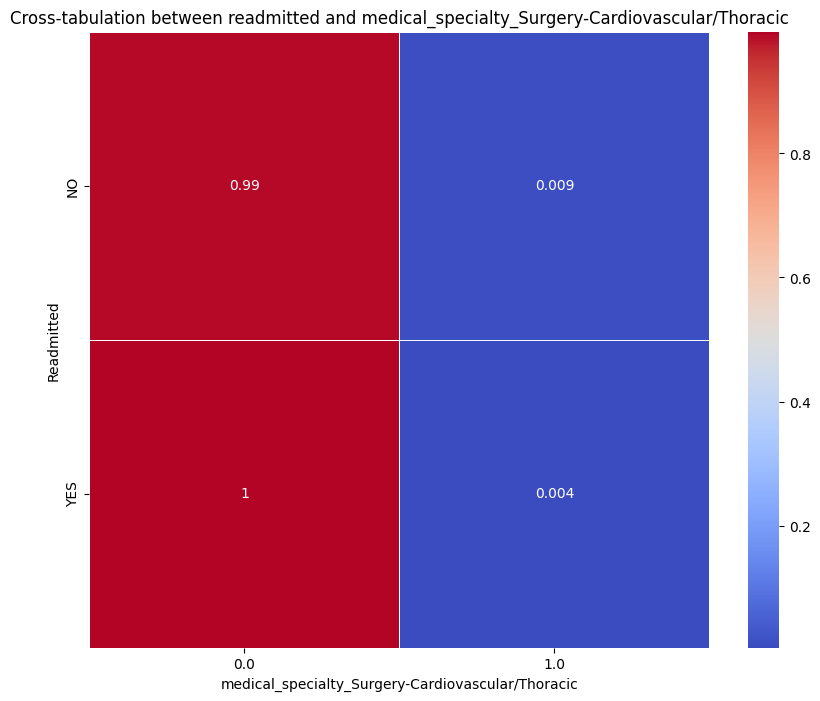

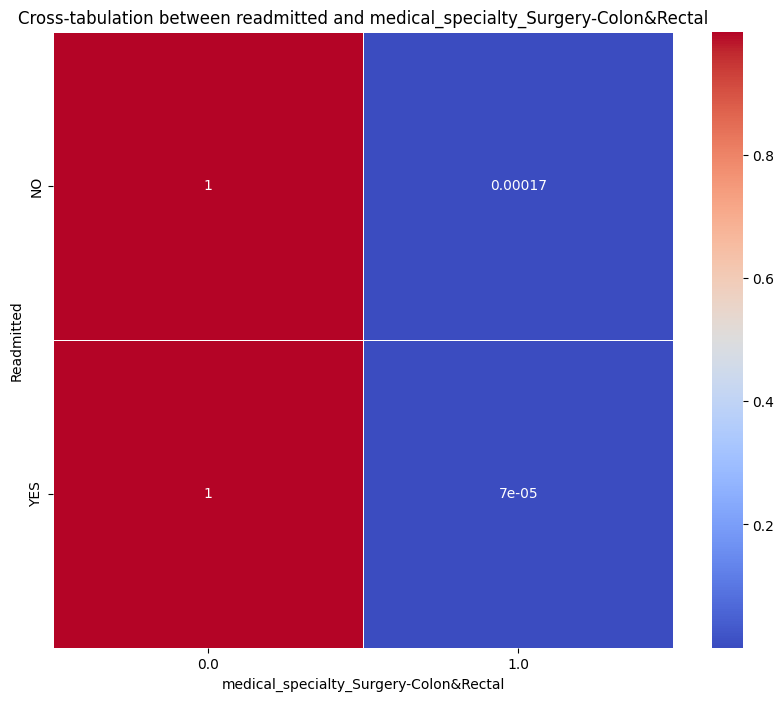

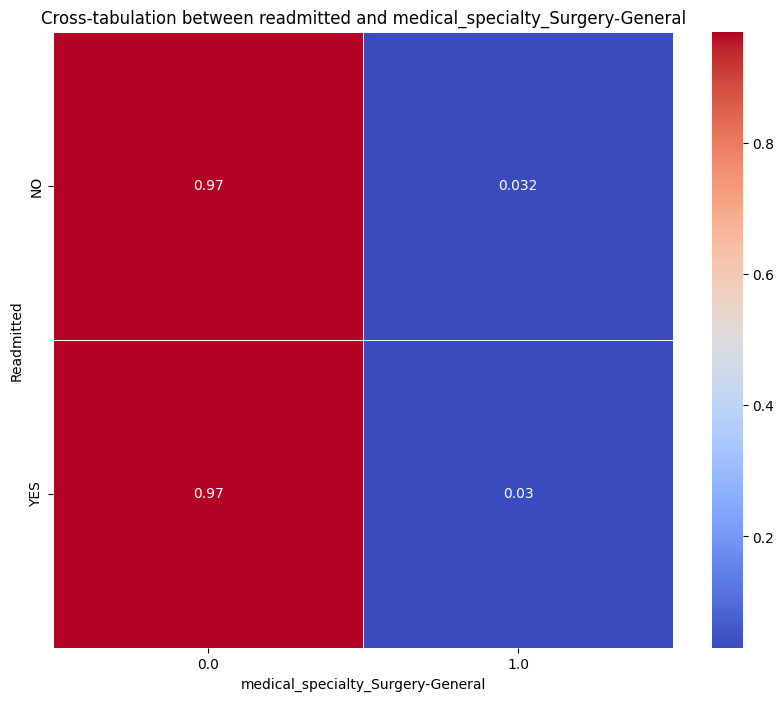

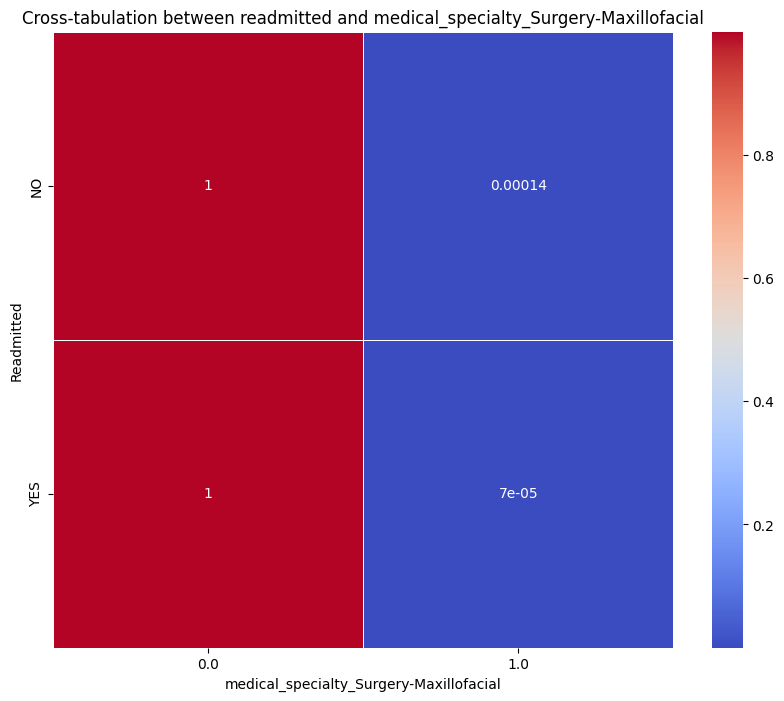

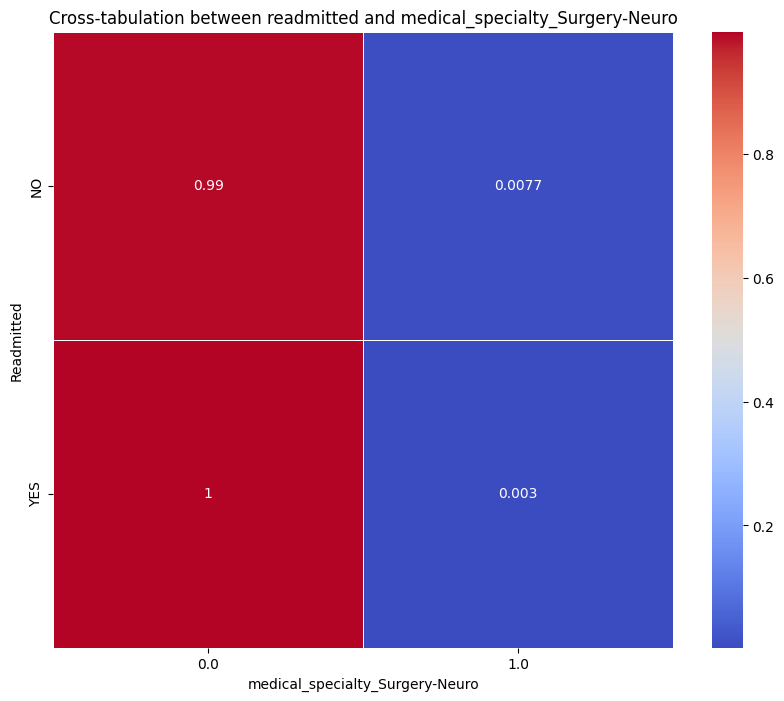

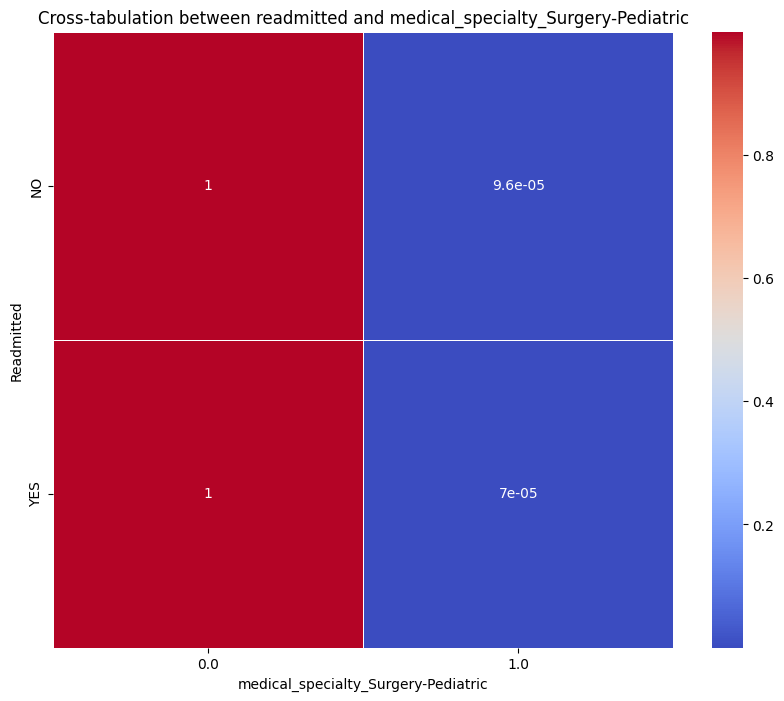

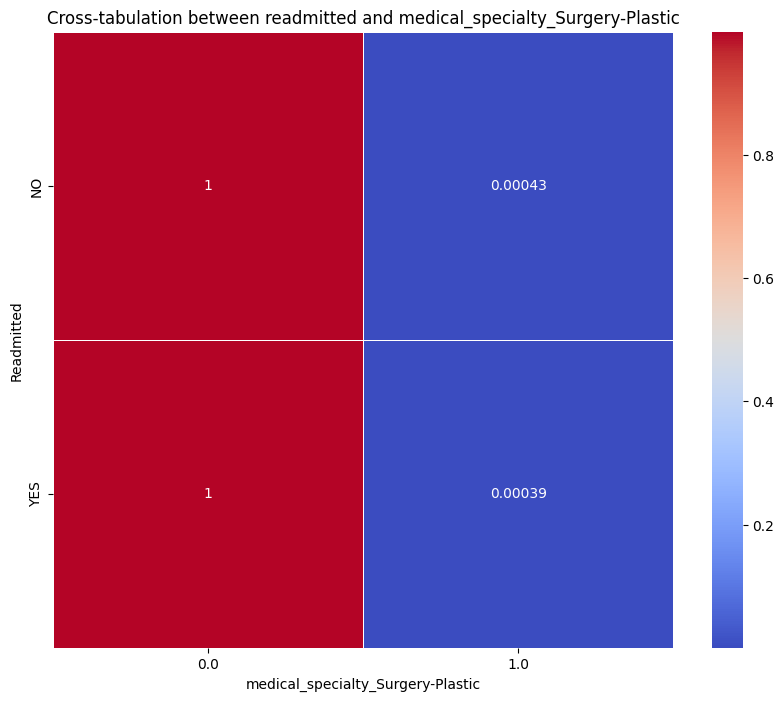

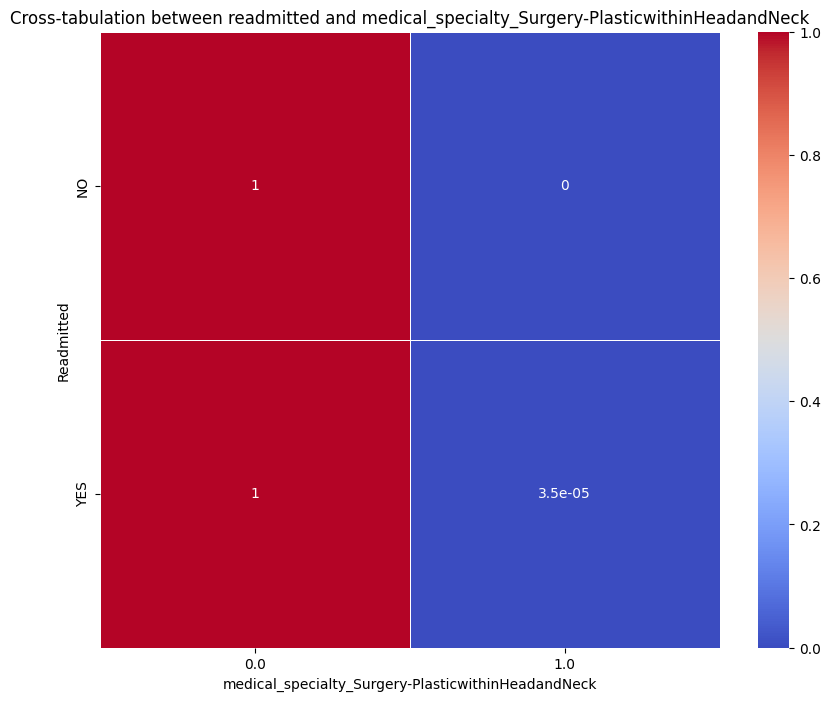

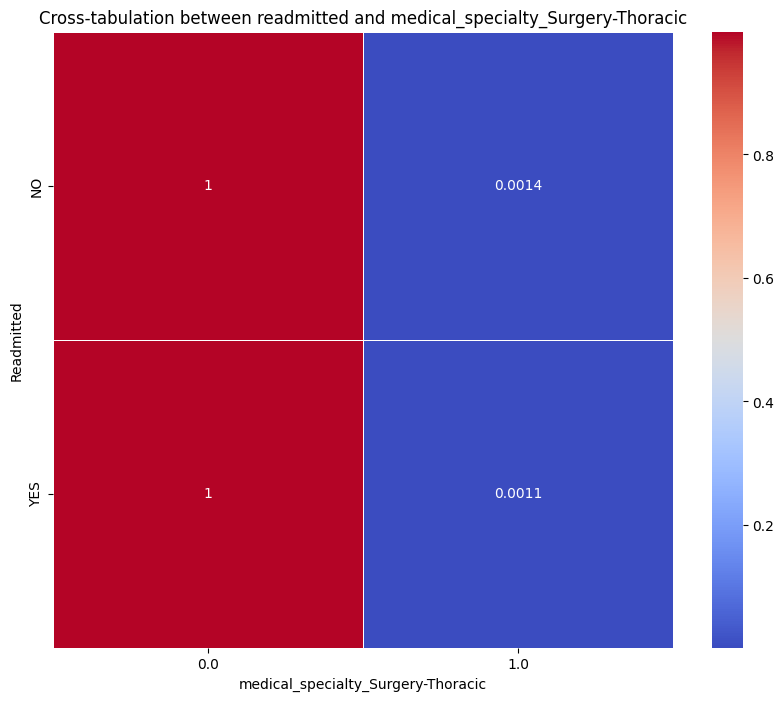

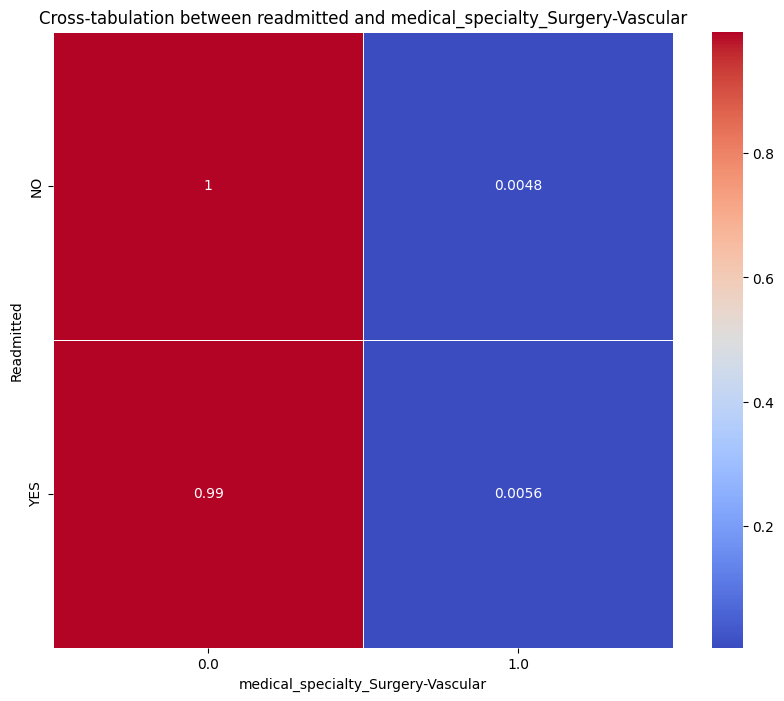

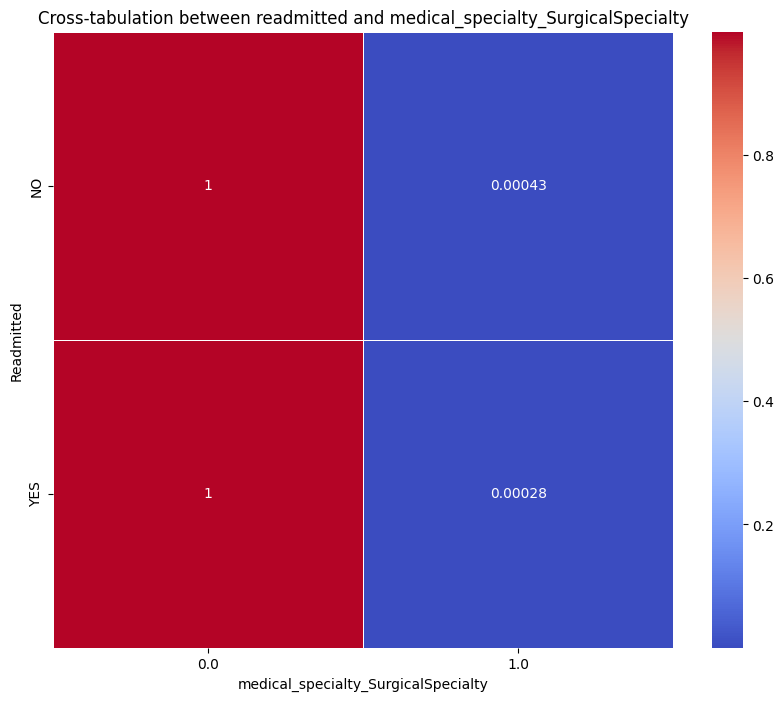

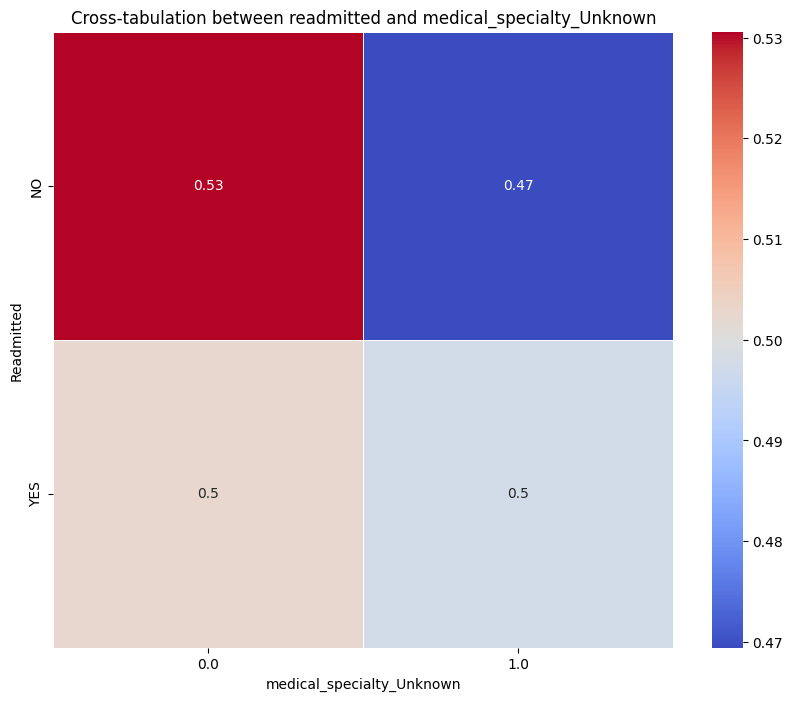

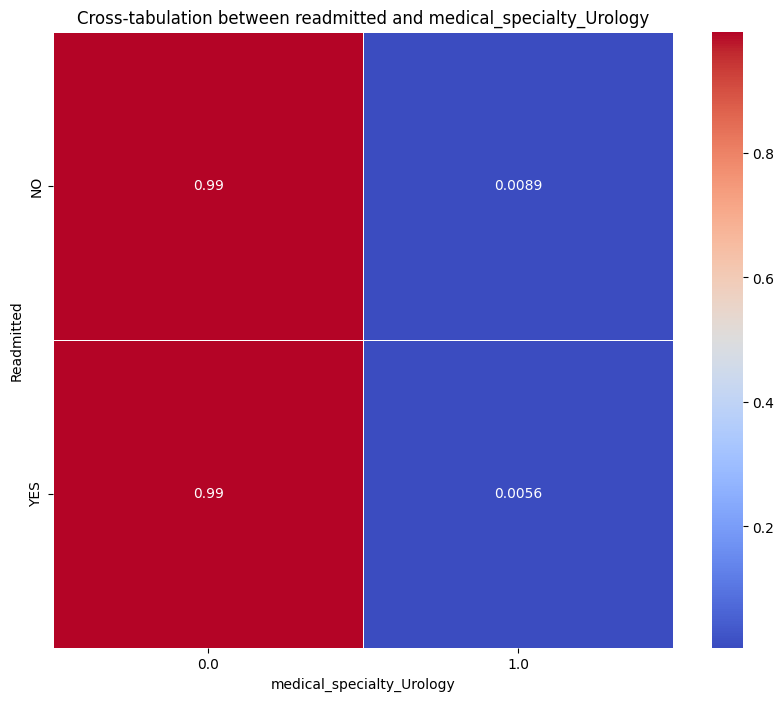

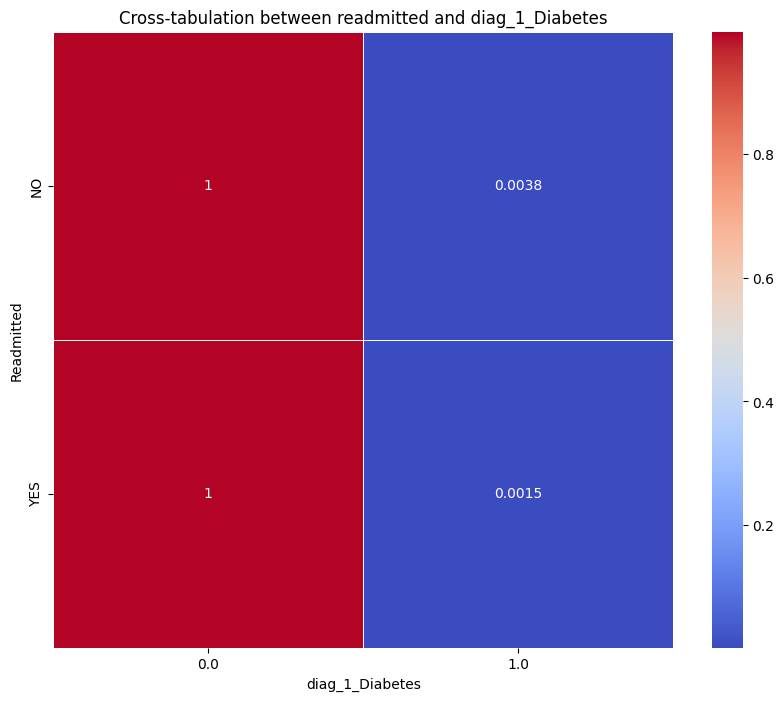

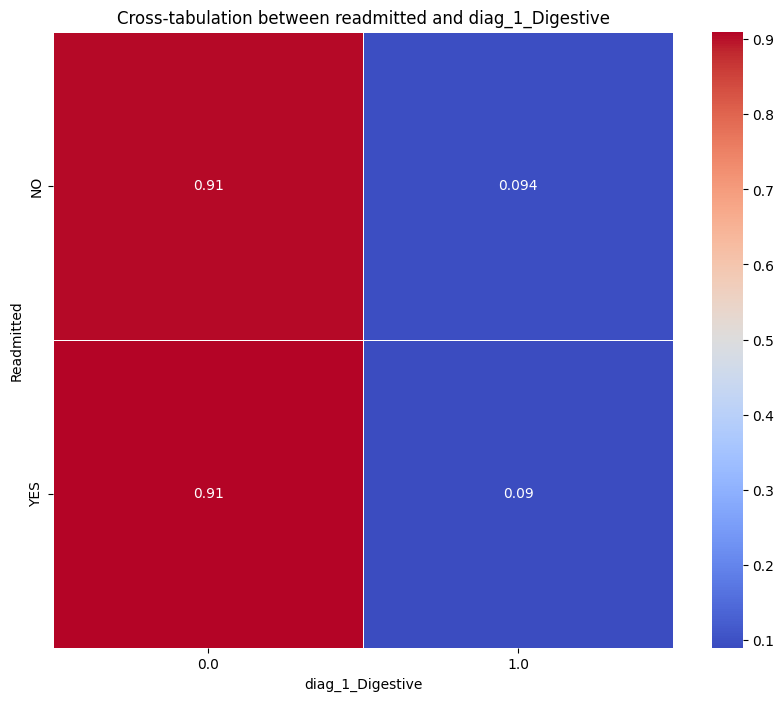

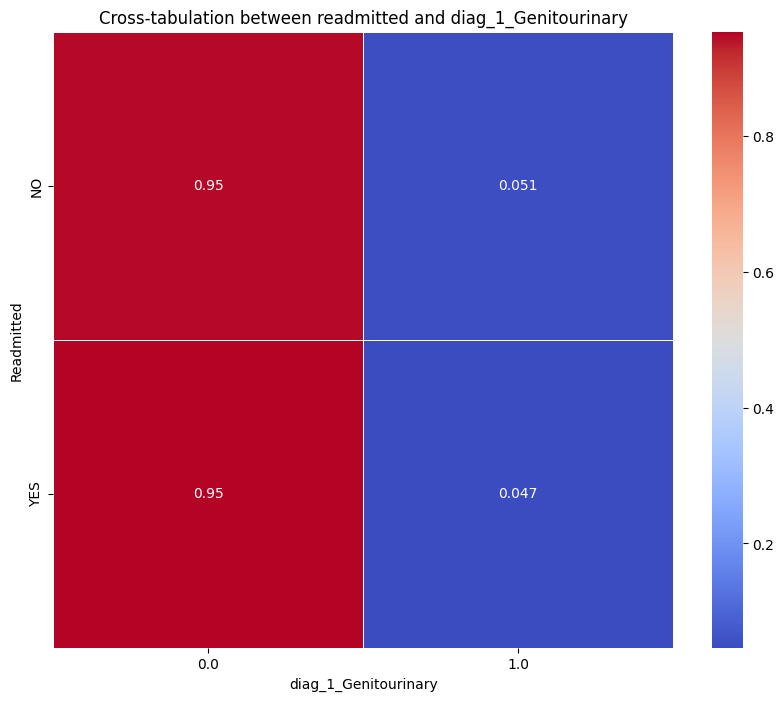

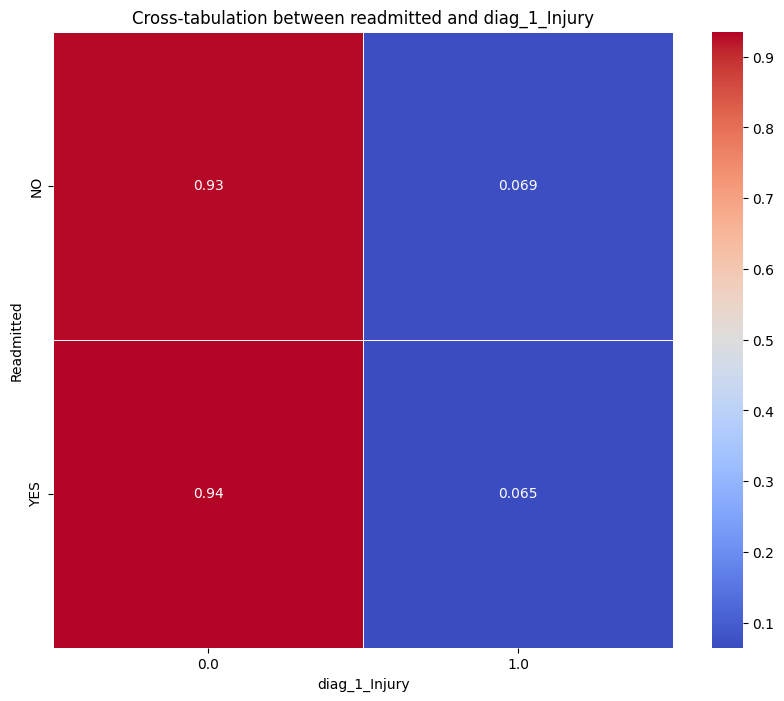

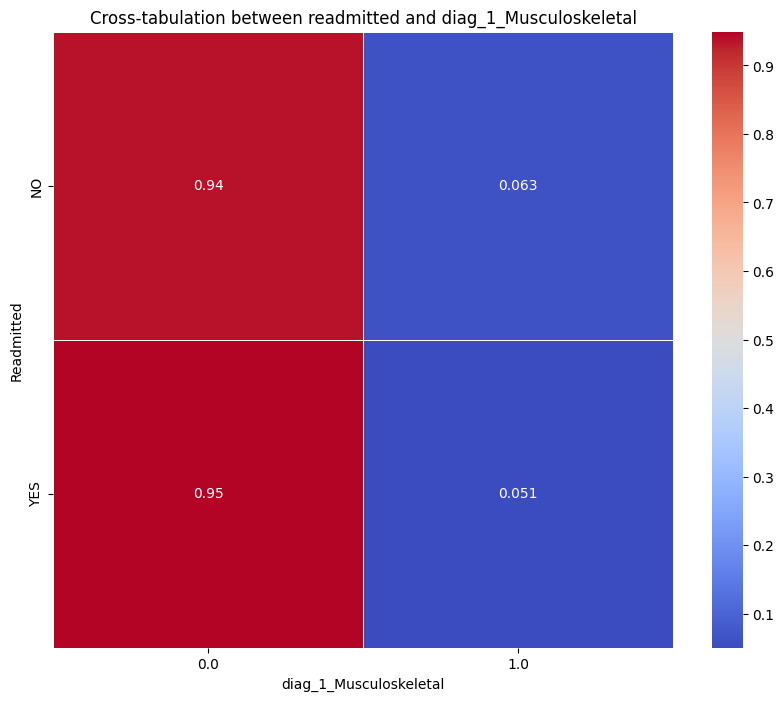

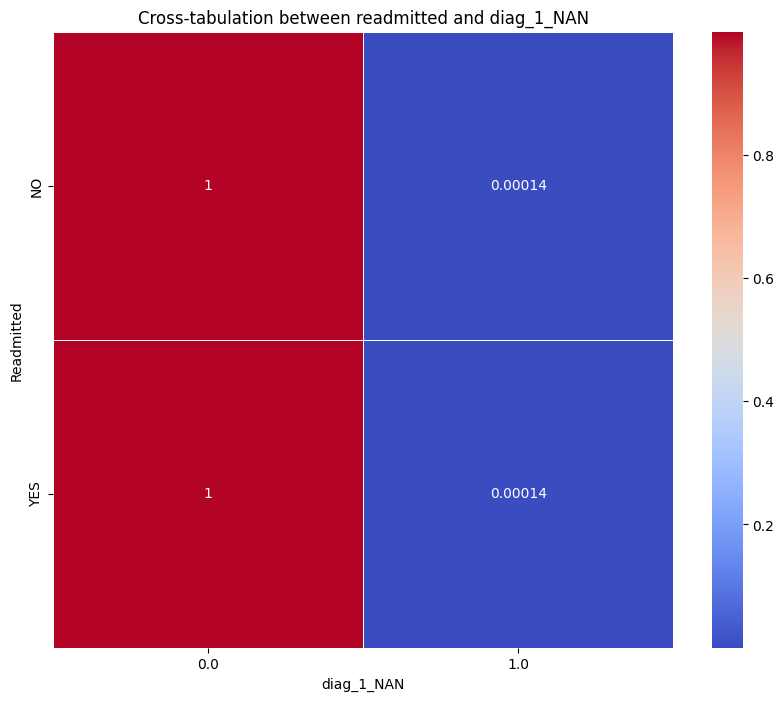

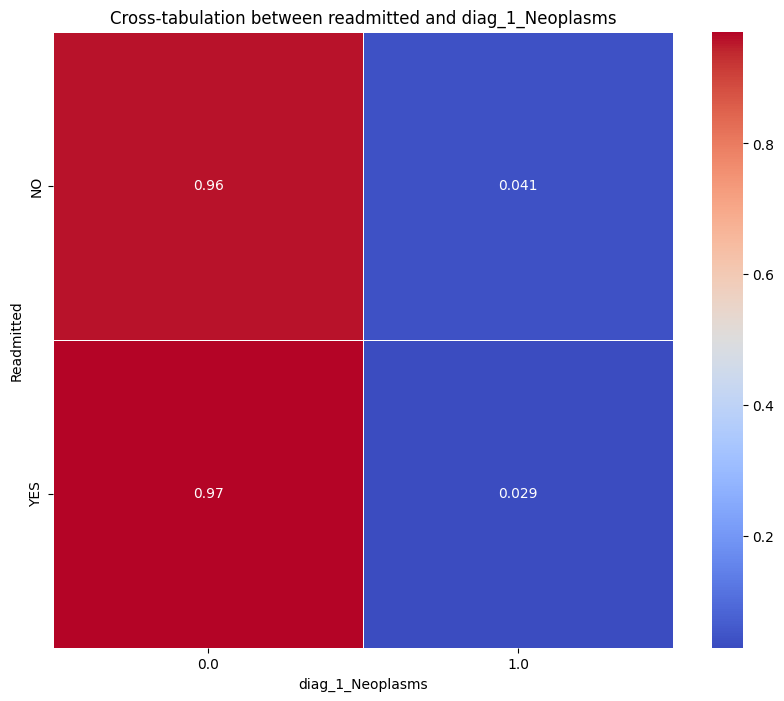

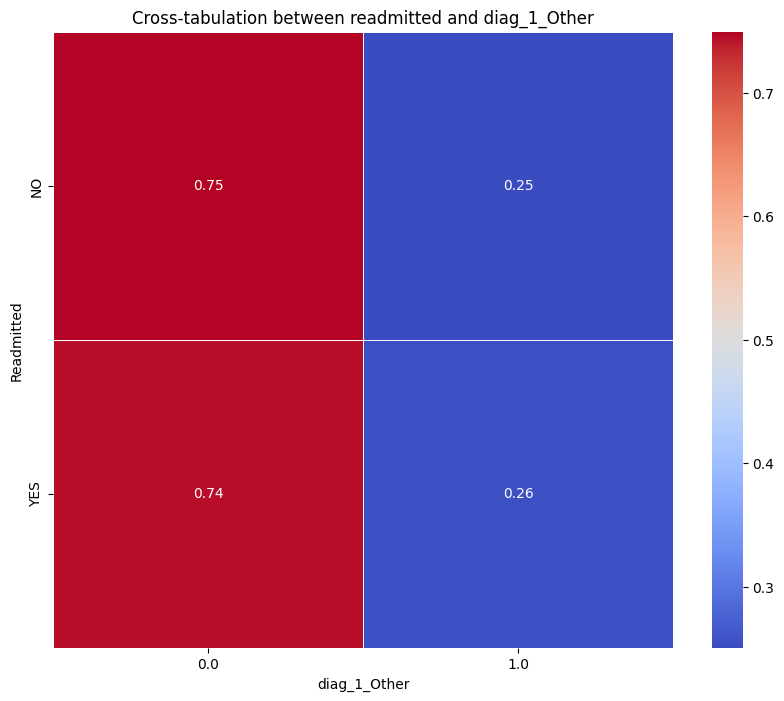

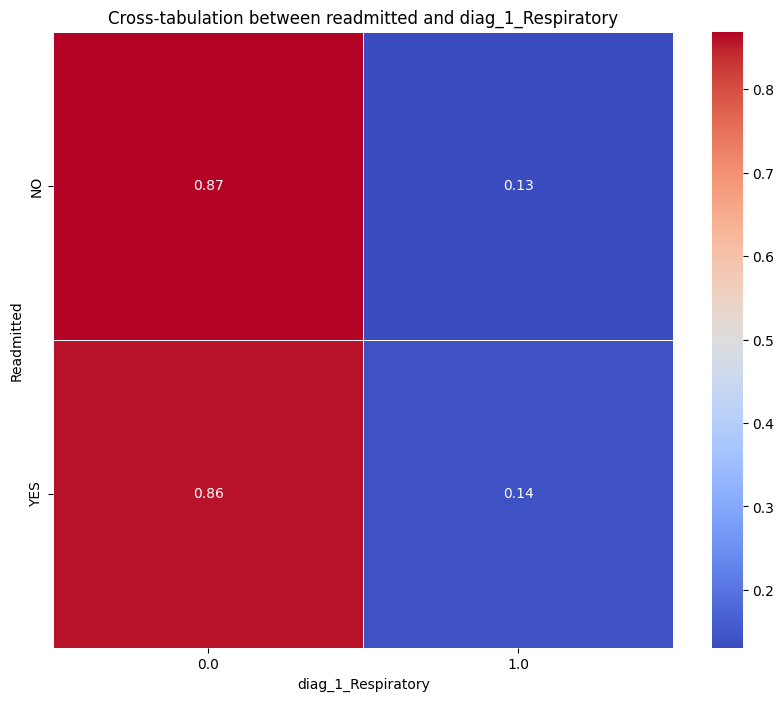

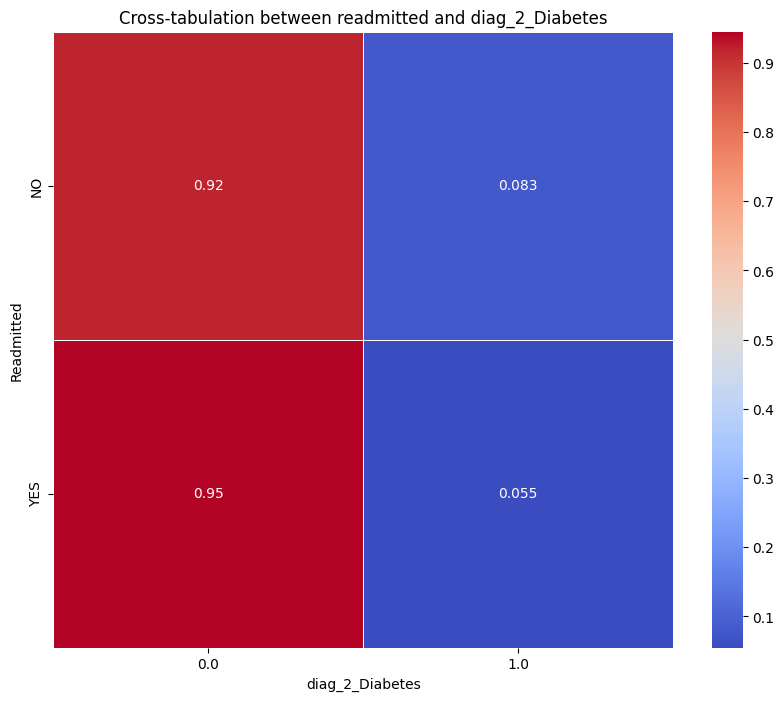

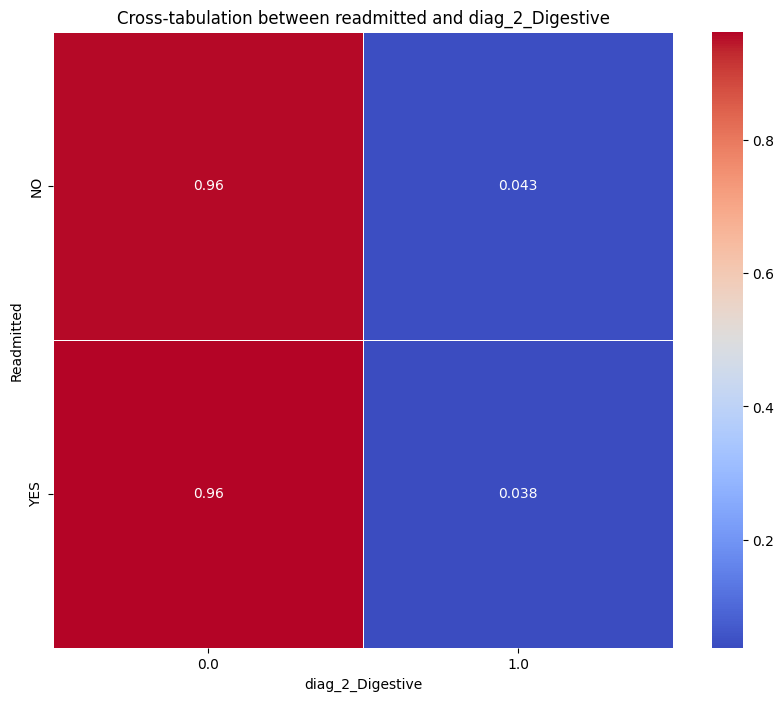

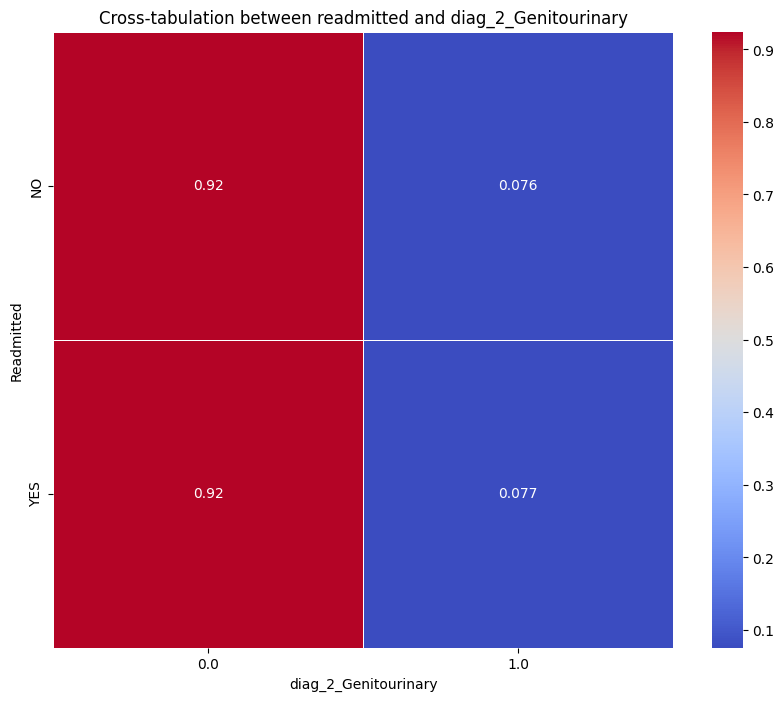

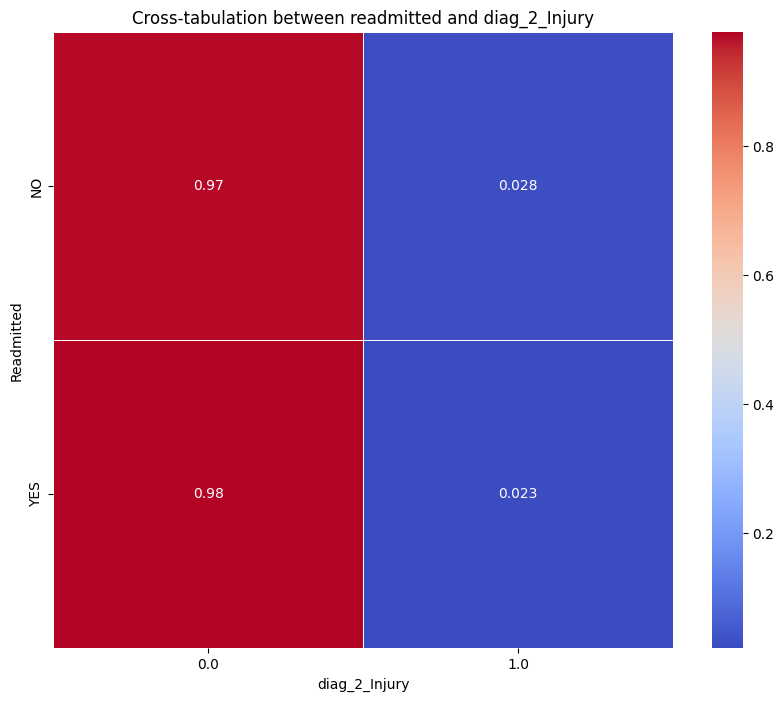

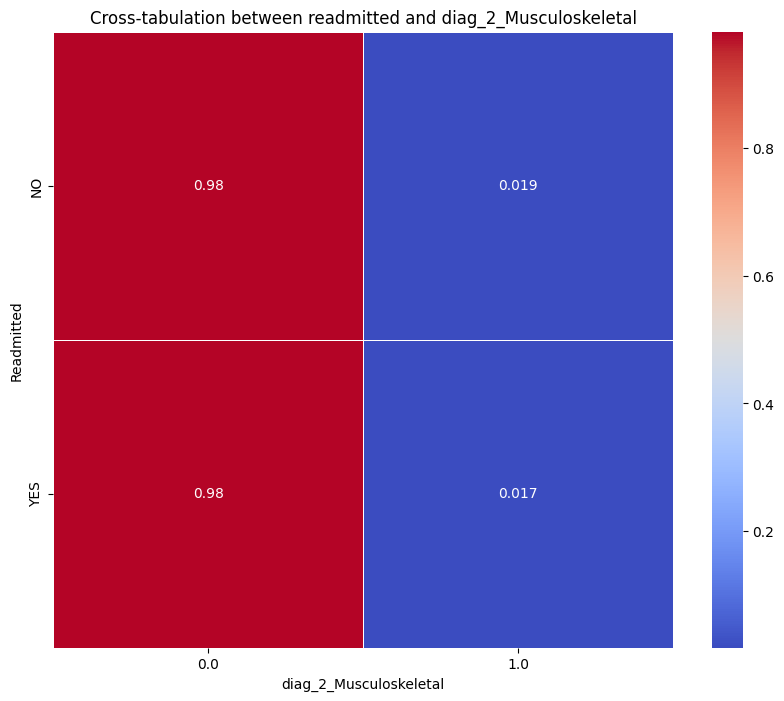

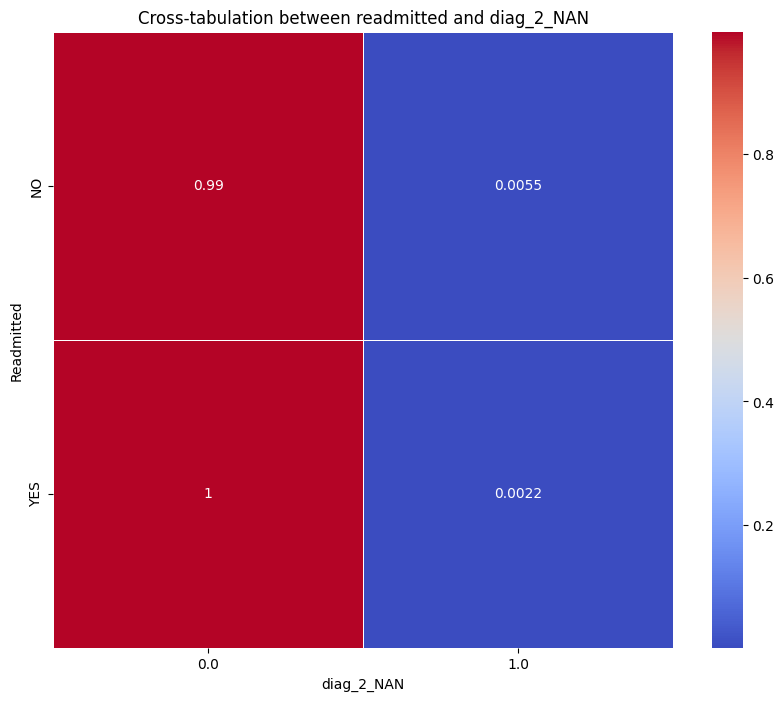

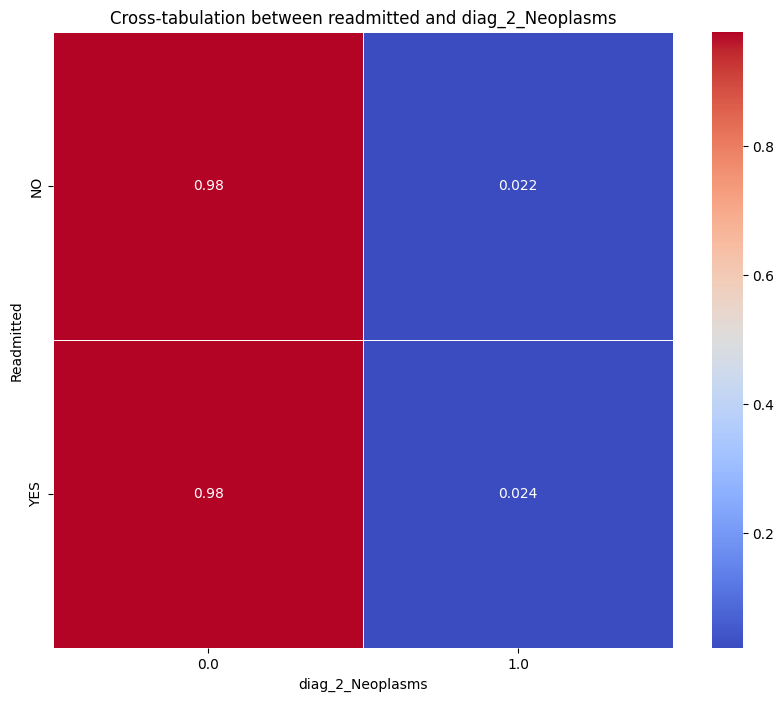

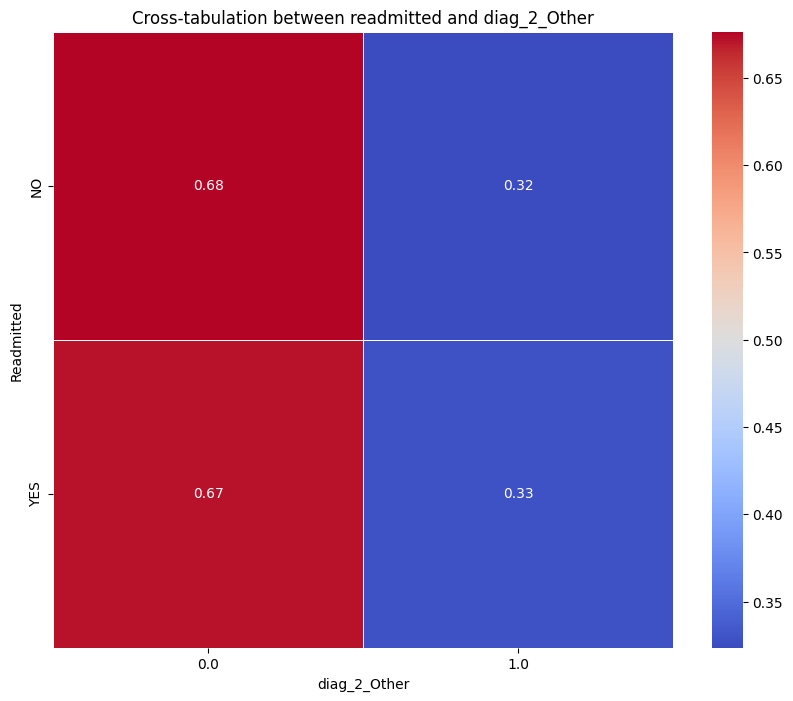

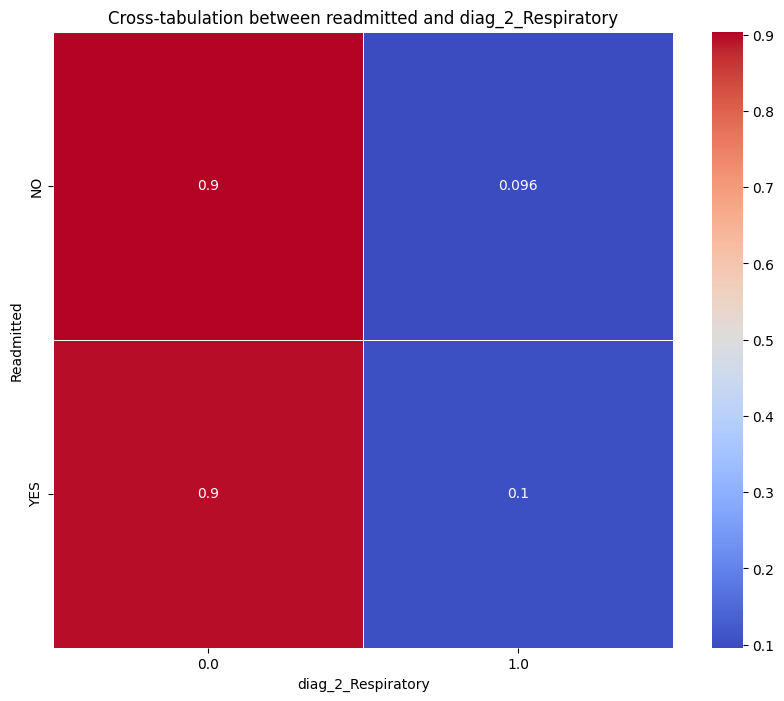

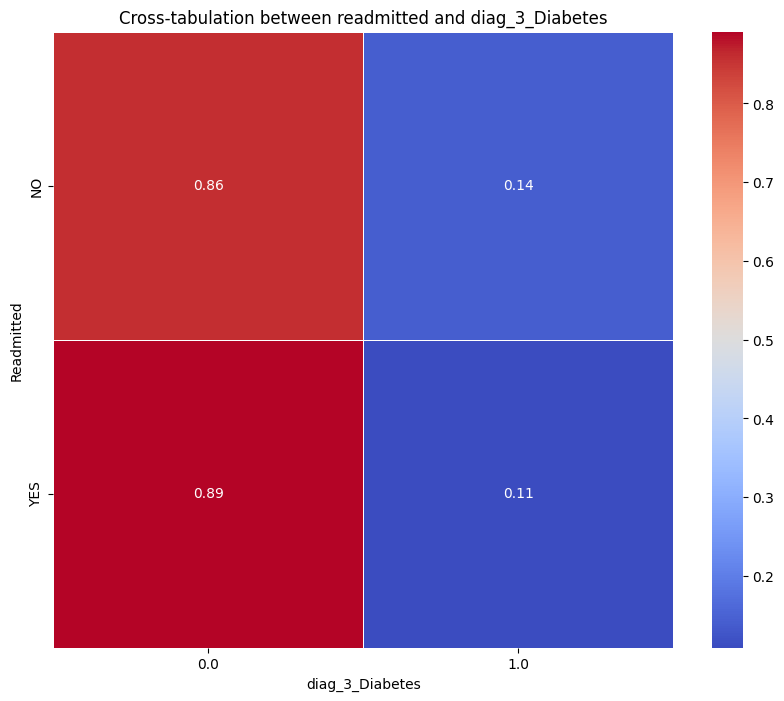

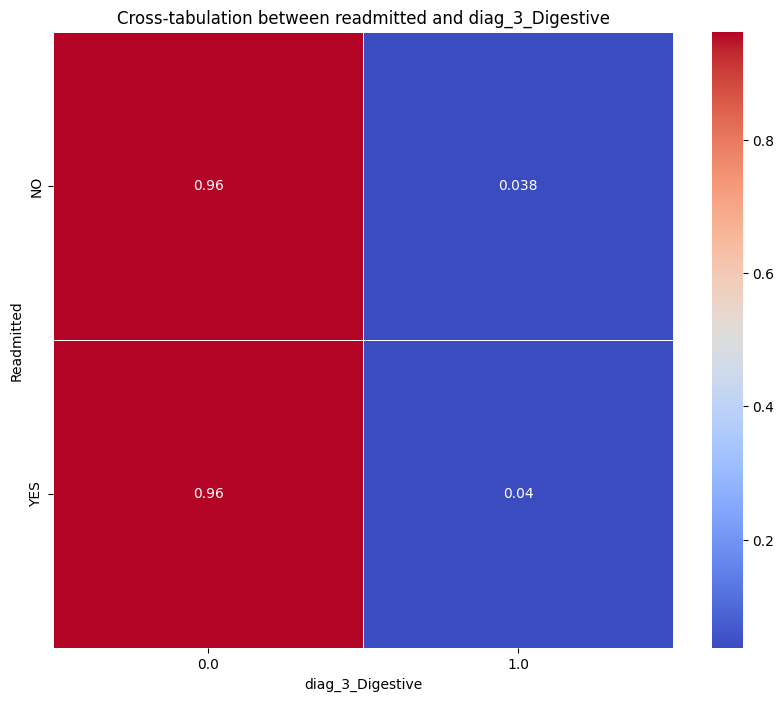

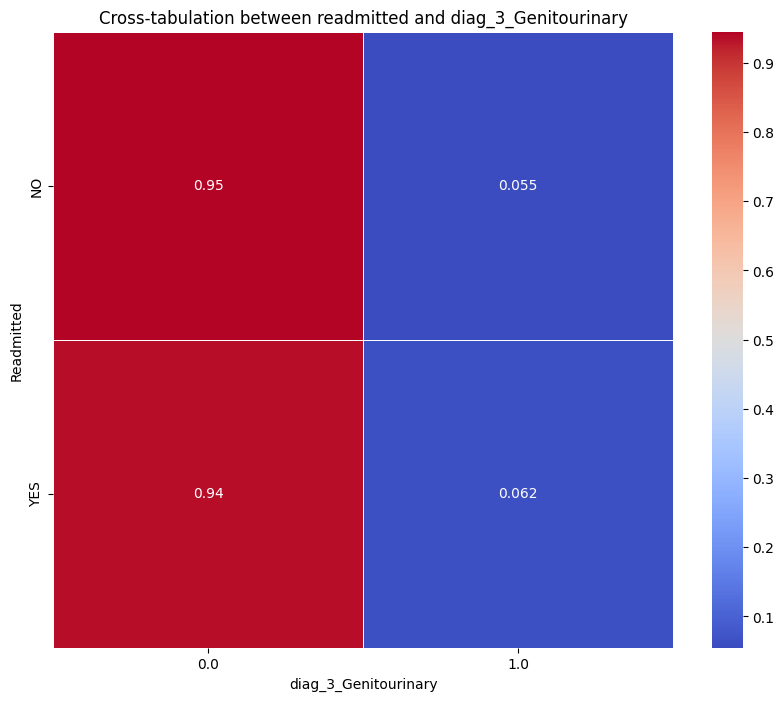

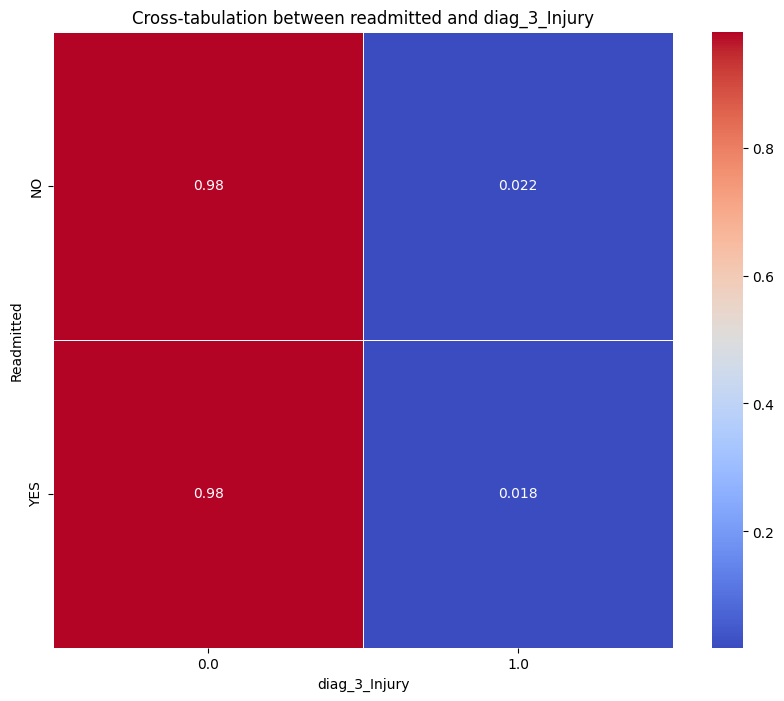

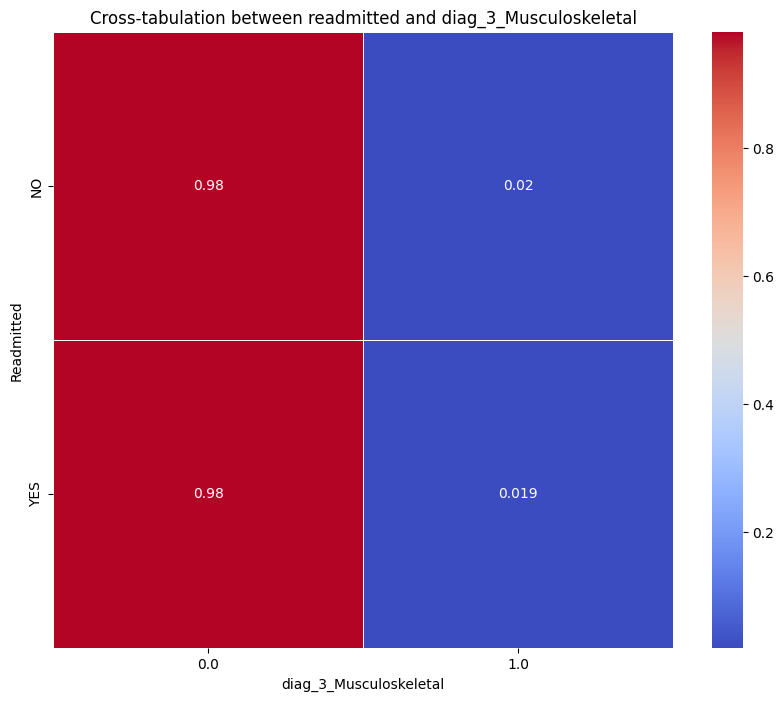

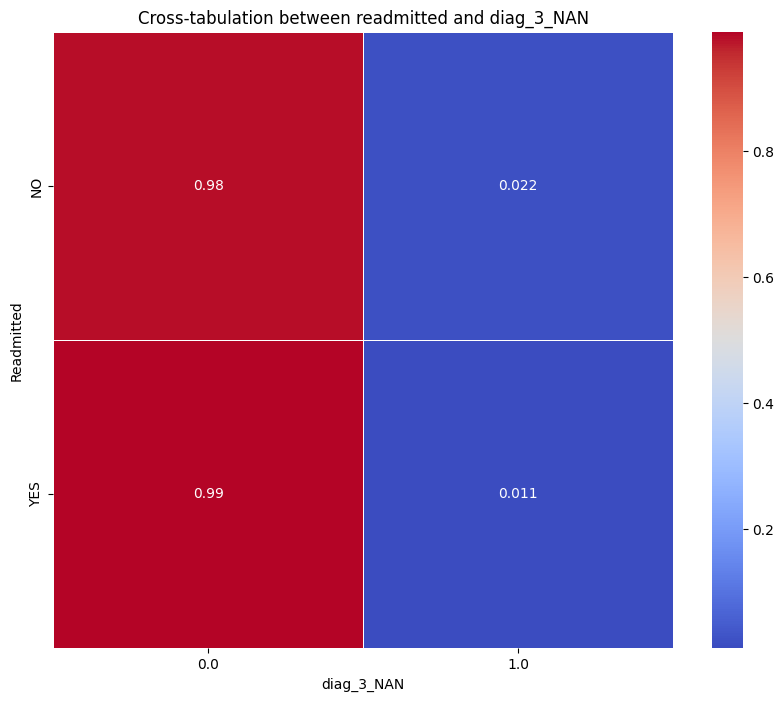

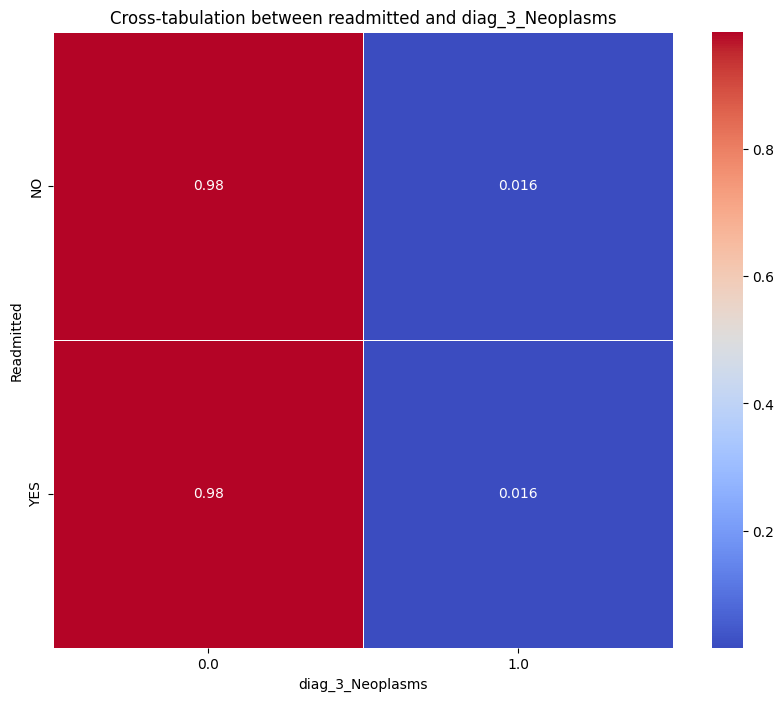

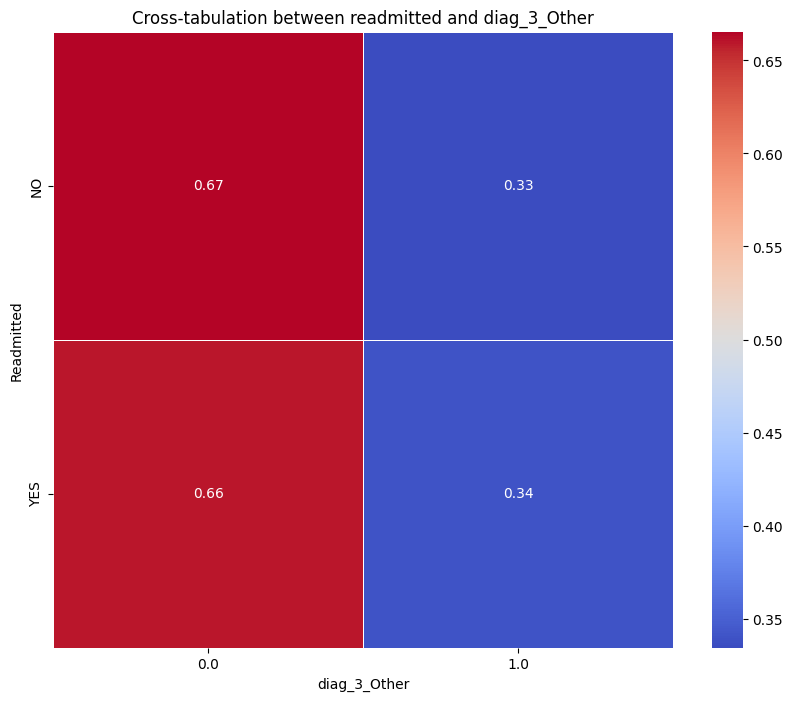

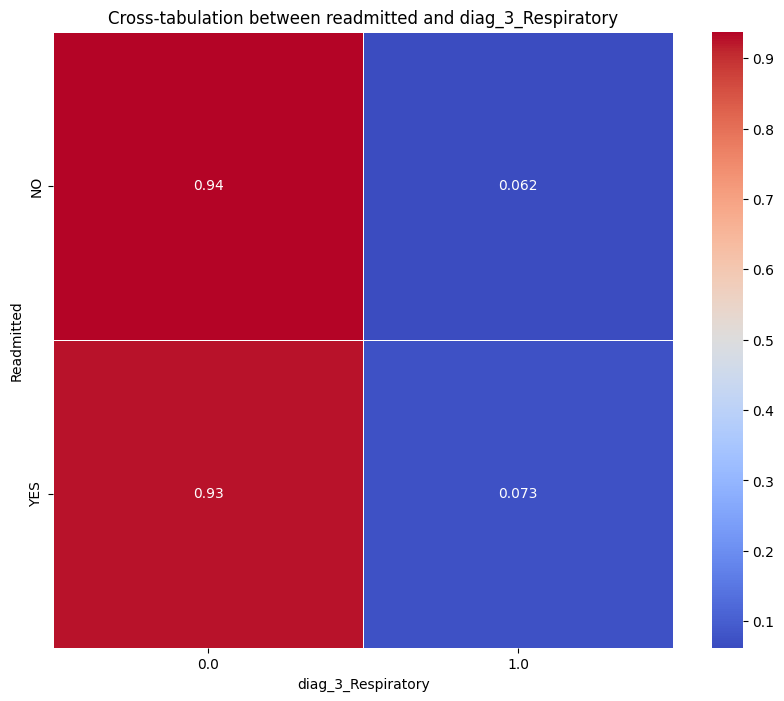

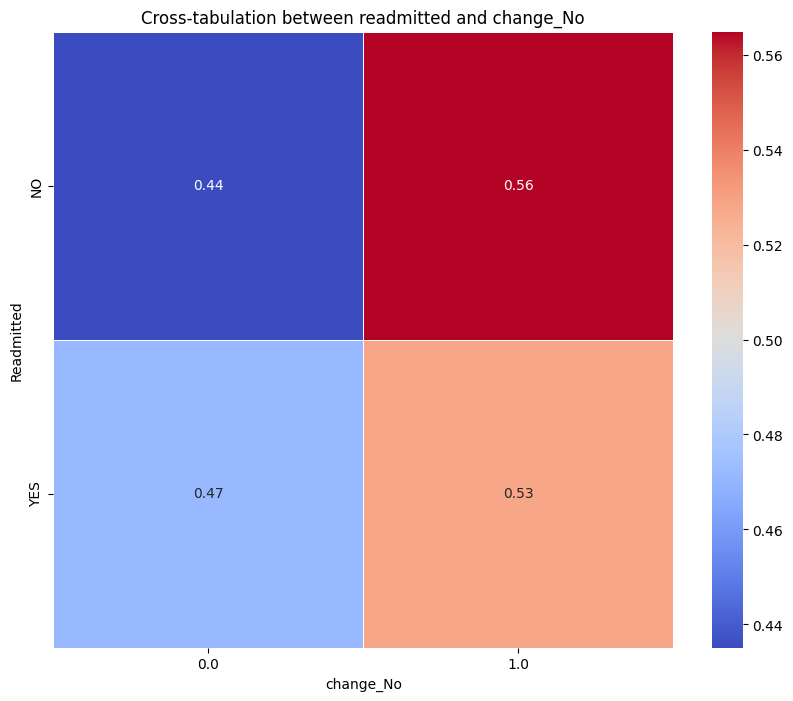

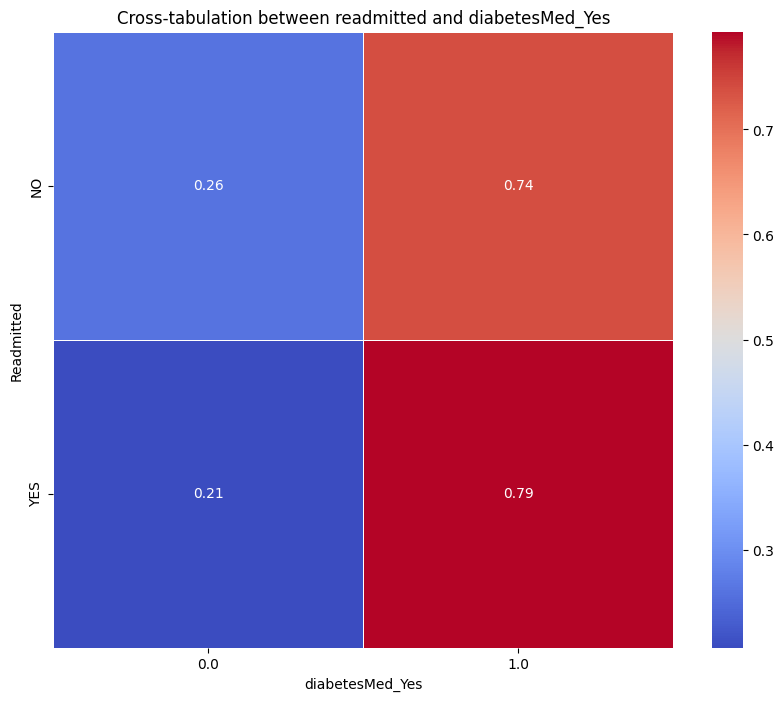

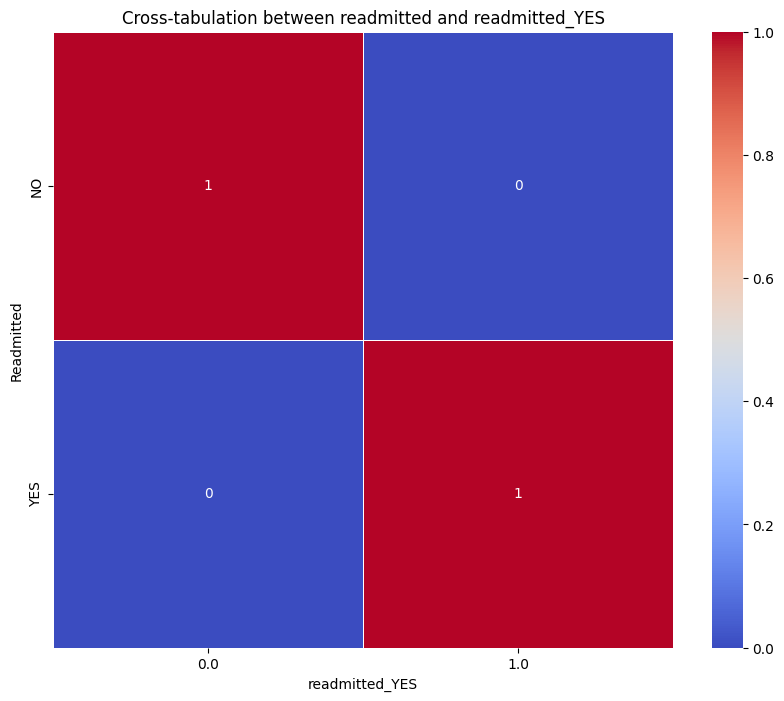

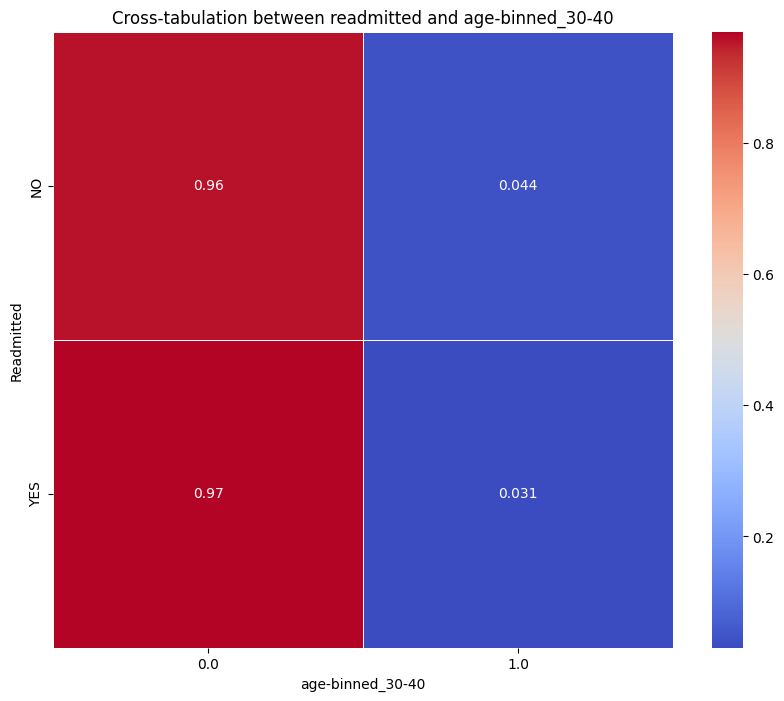

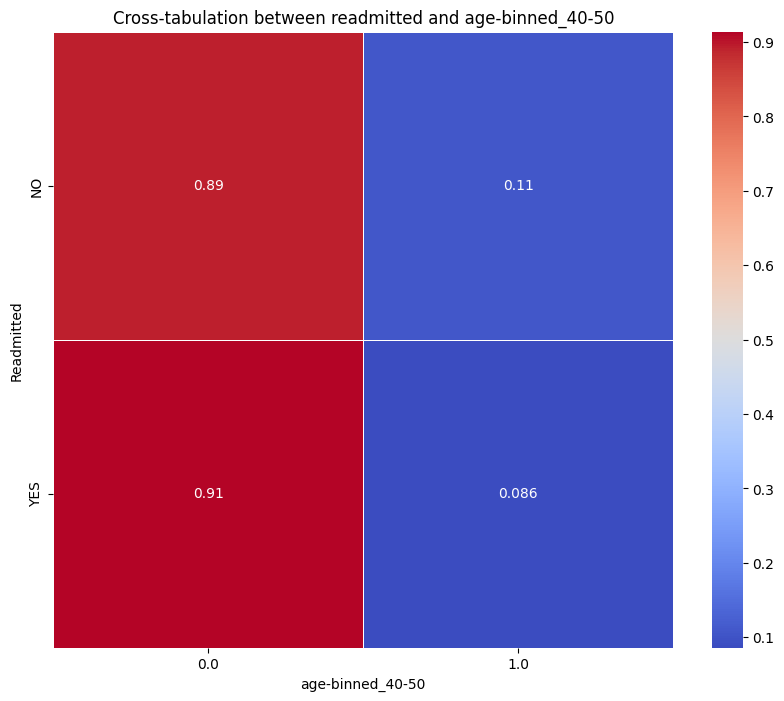

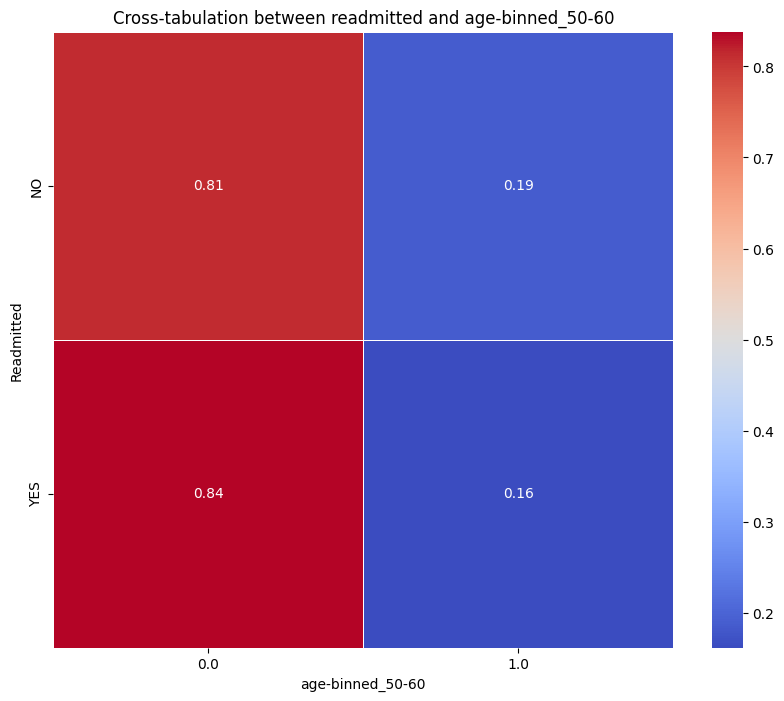

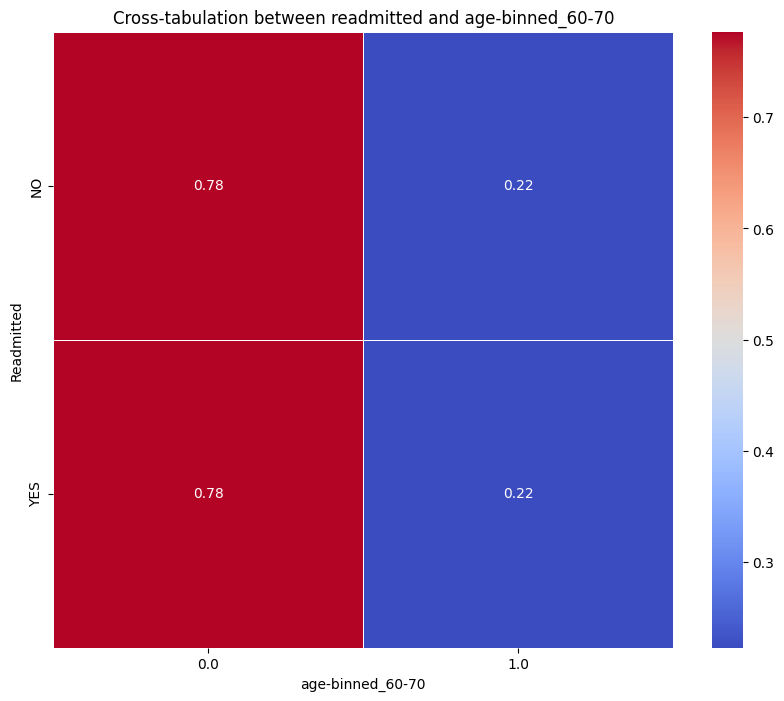

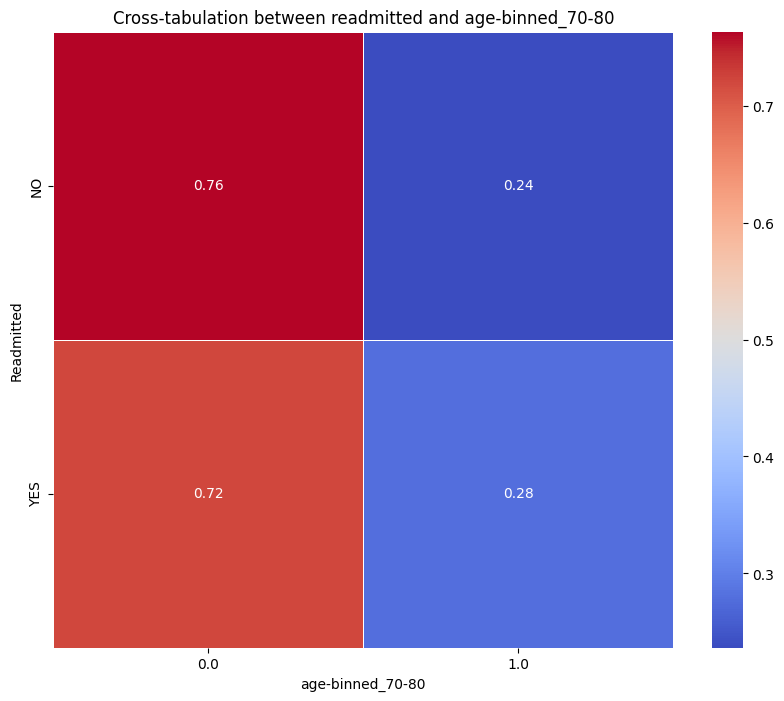

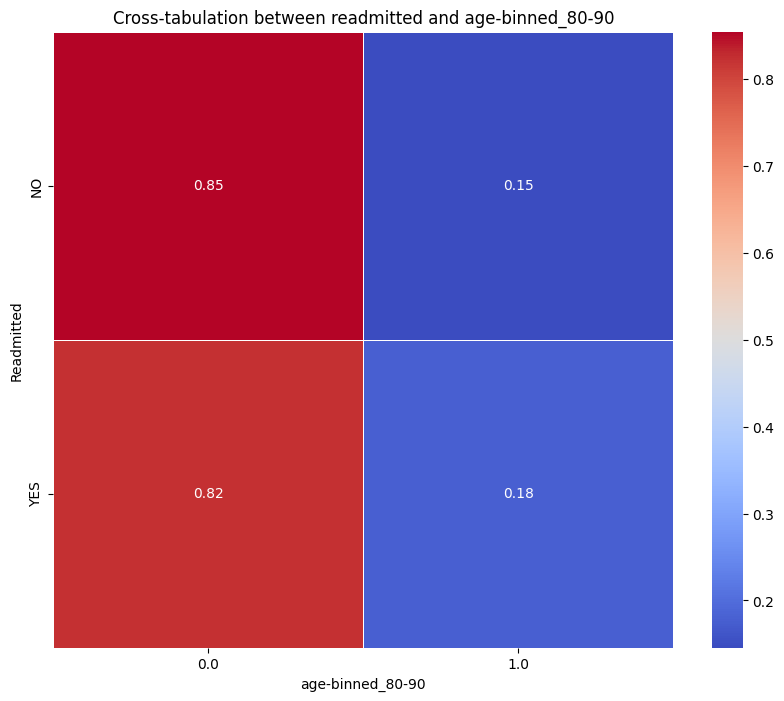

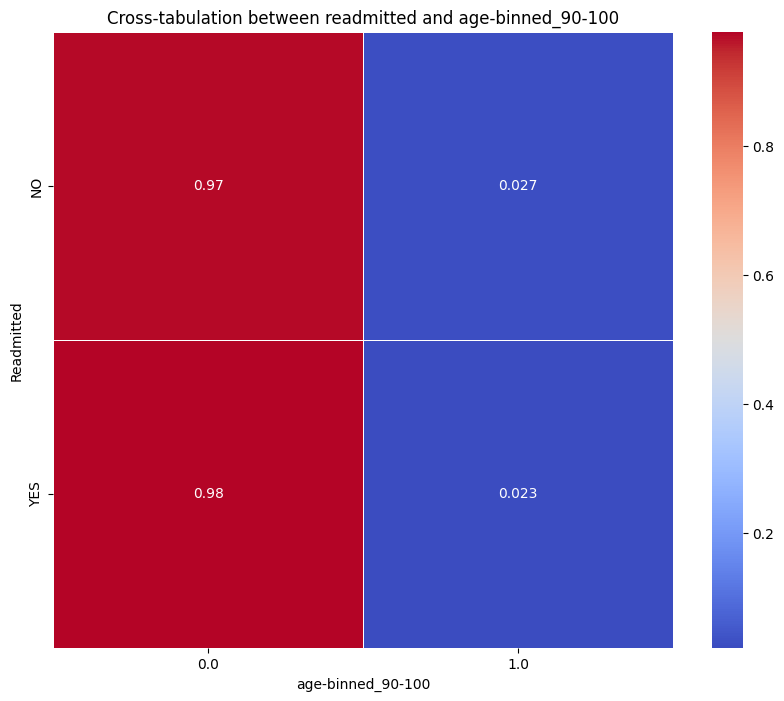

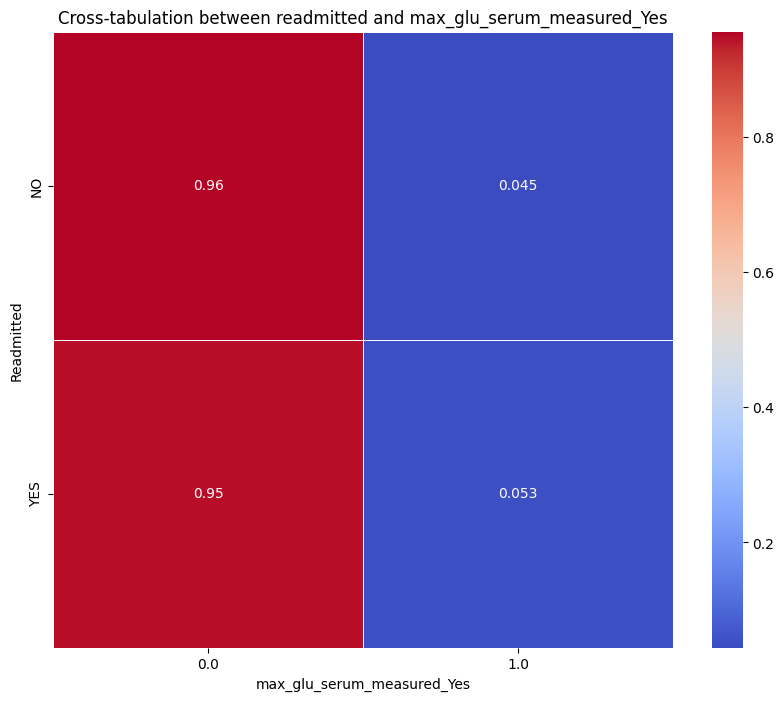

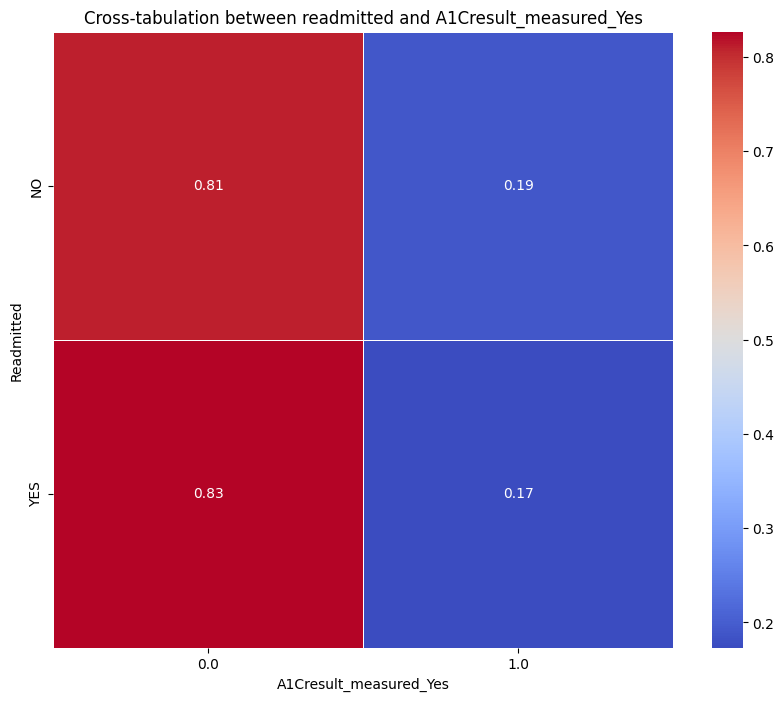

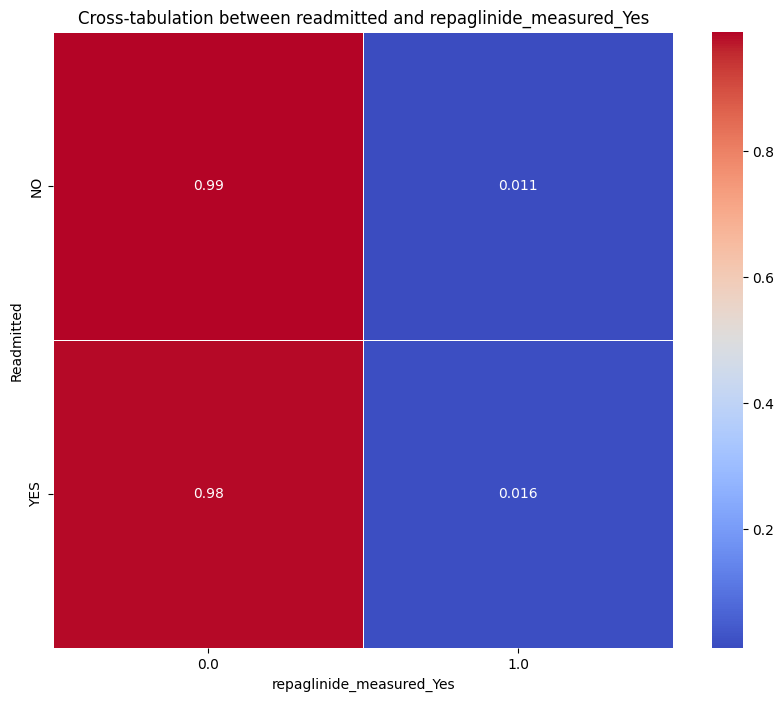

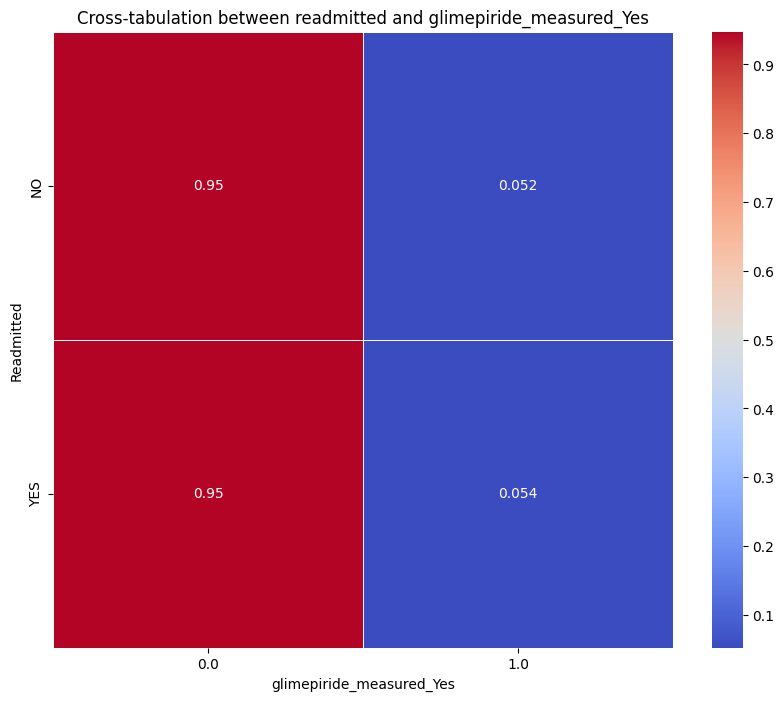

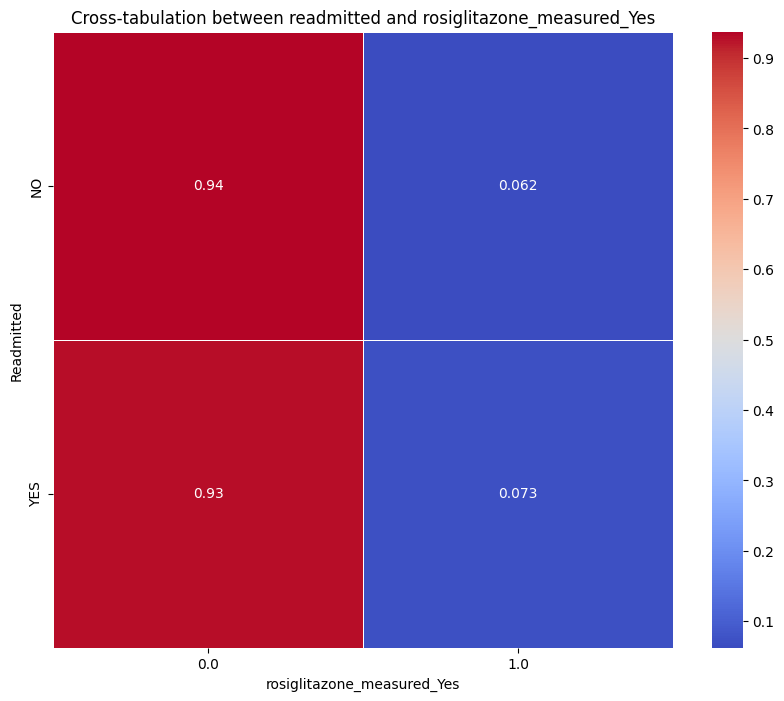

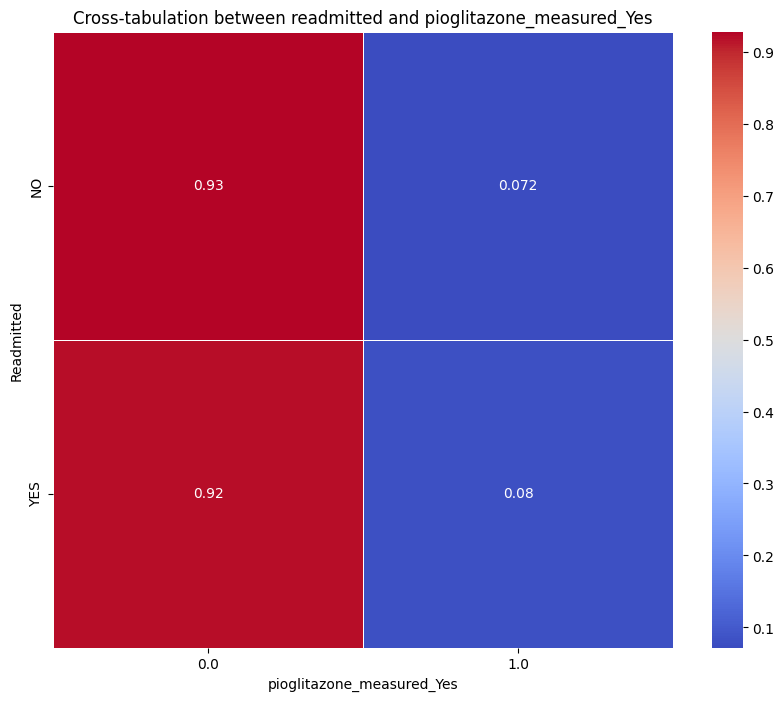

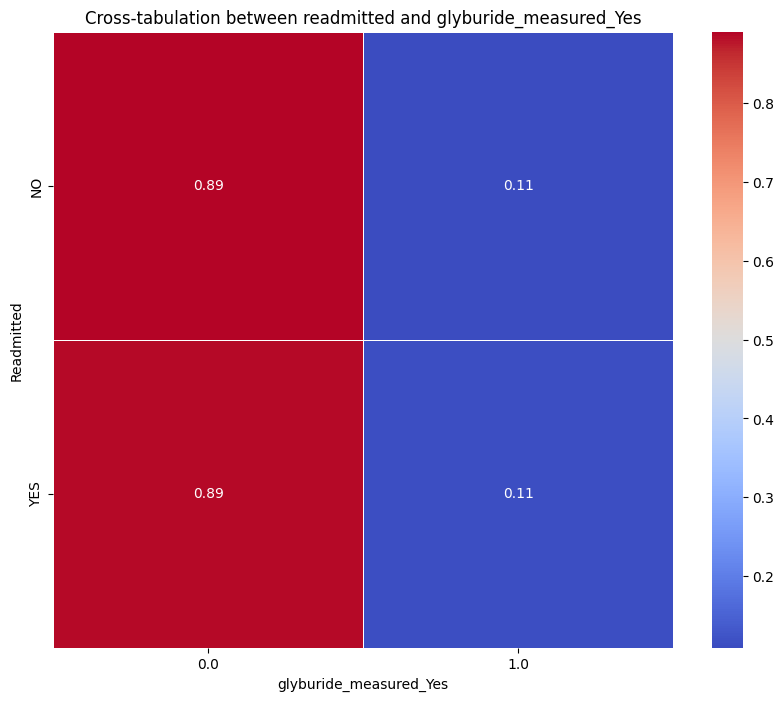

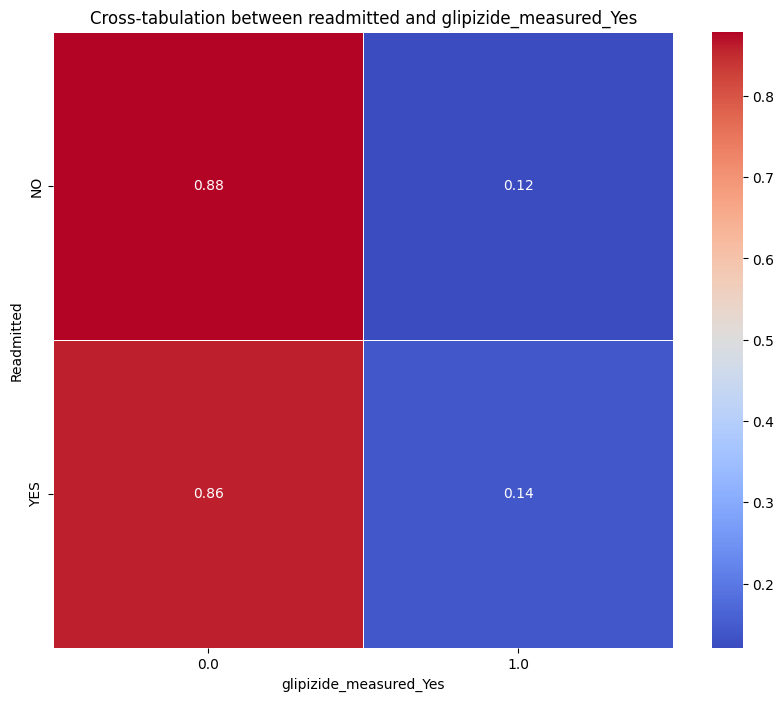

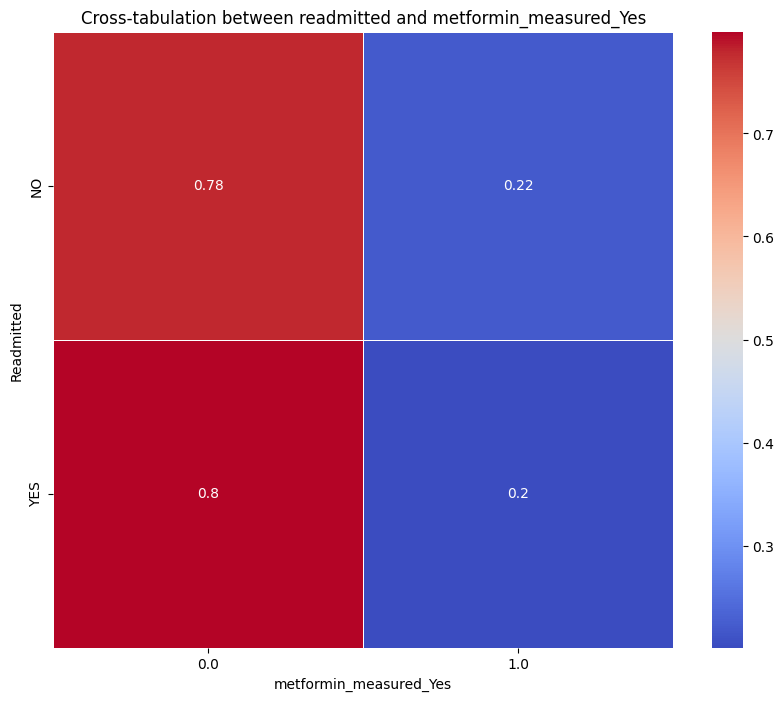

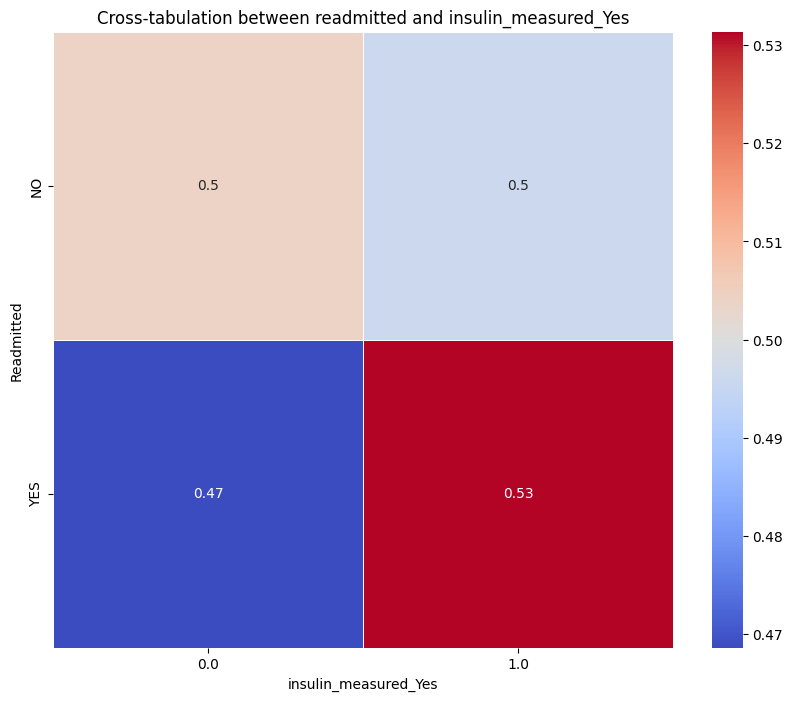

In [80]:
# Define the paired analysis function
def pairedAnalysis(df, column1, column2):
    df_ct = pd.crosstab(df[column2], df[column1])
    df_pct = df_ct.div(df_ct.sum(axis=1), axis=0)
    return df_pct

# Ensure 'readmitted' is in df_transformed
df_transformed['readmitted'] = df['readmitted'].values

# Perform and visualize cross-tabulation for each one-hot encoded column
for col in new_columns:
    crosstab = pairedAnalysis(df_transformed, col, 'readmitted')
    plt.figure(figsize=(10, 8))
    sns.heatmap(crosstab, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Cross-tabulation between readmitted and {col}')
    plt.xlabel(col)
    plt.ylabel('Readmitted')
    plt.show()